In [1]:
import h5py
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os
import datetime
import glob
from sklearn import preprocessing
import seaborn as sns 
import scipy
from scipy.stats import kstest
sns.set()

In [2]:
train_f = sorted(glob.glob('train_/*.hdf'))
# train_f.remove('../stock_price/train/20190425_20190510.hdf')
test_f = sorted(glob.glob('test_/*.hdf'))

In [3]:
train_f

['train_\\20190401_20190412.hdf',
 'train_\\20190412_20190424.hdf',
 'train_\\20190425_20190510.hdf',
 'train_\\20190510_20190522.hdf',
 'train_\\20190523_20190604.hdf',
 'train_\\20190604_20190617.hdf',
 'train_\\20190617_20190628.hdf',
 'train_\\20190628_20190710.hdf',
 'train_\\20190710_20190723.hdf',
 'train_\\20190723_20190731.hdf']

In [6]:
file = train_f[1]

In [4]:
def describe2(file):
    f = h5py.File(file, 'r')
    x = f['x'][:]
    y = f['y'][:]
    f.close()
#     pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
#     pt = preprocessing.StandardScaler()
#     y_s = pt.fit_transform(y[:,-1,:1])
#     re = kstest(y[:,-1,0],'norm')
#     print(re)
#     sns.distplot(y_s)
    n = y.shape[0]
#     dims = x.shape[-1]
    
    mean = np.mean(y[:,-1,0])
    std = np.std(y[:,-1,0])
    var = np.var(y[:,-1,0])
    ptp = np.ptp(y[:,-1,0])
    max1 = np.max(y[:,-1,0])
    min1 = np.min(y[:,-1,0])
    print(f'      mean:{mean:>6.3f} | std:{std:.3f} | var:{var:.3f} |ptp:{ptp:>4.1f} |max:{max1:.3f}|min:{min1:.3f}')
#     y_scale = y_s
#     mean = np.mean(y_scale)
#     std = np.std(y_scale)
#     var1 = np.var(y_scale)
#     ptp = np.ptp(y_scale)
#     max1 = np.max(y_scale)
#     min1 = np.min(y_scale)
#     print(f'scale mean:{mean:>6.3f} | std:{std:.3f} | var:{var1:.3f} |ptp:{ptp:.1f} |max:{max1:.3f} |min:{min1:.3f}')
    return var

KstestResult(statistic=0.13645382467647202, pvalue=0.0)


d:\Users\RuiSavior\anaconda3\envs\optiver_kaggle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean:0.012 | std:0.627 | ptp:7.6 |max:3.160|min:-4.480
scale mean:0.009 | std:0.627 | ptp:7.7 |max:3.112 |min:-4.566


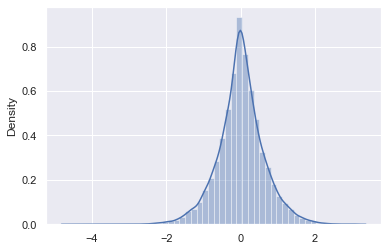

In [85]:
describe2(test_f[100])

d:\Users\RuiSavior\anaconda3\envs\optiver_kaggle\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


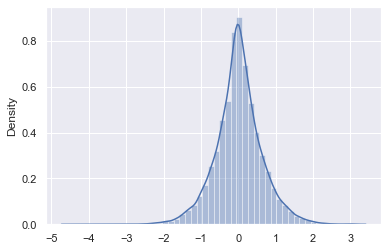

In [46]:
describe2(test_f[100])

In [5]:
var = []
for file in train_f:
    var.append(describe2(file))

      mean: 0.000 | std:1.000 | var:1.000 |ptp:19.6 |max:10.301|min:-9.281
      mean: 0.000 | std:1.000 | var:1.000 |ptp:21.6 |max:10.683|min:-10.940
      mean:-0.000 | std:1.000 | var:1.000 |ptp:35.3 |max:20.781|min:-14.471
      mean:-0.000 | std:1.000 | var:1.000 |ptp:27.1 |max:13.436|min:-13.665
      mean:-0.000 | std:1.000 | var:1.000 |ptp:28.6 |max:14.001|min:-14.583
      mean:-0.000 | std:1.000 | var:1.000 |ptp:18.7 |max:9.001|min:-9.686
      mean: 0.000 | std:1.000 | var:1.000 |ptp:29.8 |max:16.781|min:-13.002
      mean:-0.000 | std:1.000 | var:1.000 |ptp:21.5 |max:9.877|min:-11.604
      mean:-0.000 | std:1.000 | var:1.000 |ptp:30.9 |max:16.658|min:-14.259
      mean:-0.000 | std:1.000 | var:1.000 |ptp:22.6 |max:11.036|min:-11.548


In [36]:
np.mean(var)

0.92673665

In [6]:
var = []
for file in test_f:
    var.append(describe2(file))

      mean: 0.000 | std:1.000 | var:1.000 |ptp:11.9 |max:5.624|min:-6.239
      mean: 0.000 | std:1.000 | var:1.000 |ptp:13.4 |max:6.361|min:-7.080
      mean: 0.000 | std:1.000 | var:0.999 |ptp:10.1 |max:5.153|min:-4.982
      mean:-0.000 | std:1.000 | var:1.000 |ptp:14.7 |max:6.798|min:-7.882
      mean: 0.000 | std:1.000 | var:1.000 |ptp:11.2 |max:6.316|min:-4.930
      mean:-0.001 | std:0.998 | var:0.997 |ptp:12.5 |max:7.034|min:-5.416
      mean:-0.001 | std:1.000 | var:1.000 |ptp:13.0 |max:6.636|min:-6.350
      mean:-0.001 | std:0.998 | var:0.996 |ptp:12.4 |max:7.441|min:-4.999
      mean: 0.000 | std:1.000 | var:1.000 |ptp:11.6 |max:5.143|min:-6.460
      mean:-0.001 | std:1.000 | var:0.999 |ptp:17.2 |max:9.234|min:-7.972
      mean: 0.000 | std:1.000 | var:0.999 |ptp:14.5 |max:6.629|min:-7.823
      mean: 0.000 | std:1.000 | var:1.001 |ptp:16.2 |max:8.856|min:-7.299
      mean:-0.001 | std:1.000 | var:0.999 |ptp:16.1 |max:8.254|min:-7.825
      mean: 0.001 | std:1.000 | var:1.

      mean:-0.001 | std:1.000 | var:1.001 |ptp:15.7 |max:10.427|min:-5.255
      mean: 0.001 | std:1.000 | var:1.000 |ptp:15.8 |max:8.767|min:-7.016
      mean: 0.000 | std:1.001 | var:1.001 |ptp:13.8 |max:6.460|min:-7.291
      mean: 0.000 | std:1.000 | var:1.000 |ptp:14.1 |max:8.059|min:-6.016
      mean: 0.001 | std:0.999 | var:0.998 |ptp:12.7 |max:6.273|min:-6.415
      mean: 0.001 | std:1.000 | var:1.001 |ptp:13.8 |max:5.895|min:-7.884
      mean:-0.000 | std:1.000 | var:0.999 |ptp:13.0 |max:5.616|min:-7.367
      mean: 0.000 | std:1.001 | var:1.001 |ptp:12.5 |max:5.899|min:-6.581
      mean: 0.001 | std:1.000 | var:0.999 |ptp:12.3 |max:5.660|min:-6.614
      mean: 0.000 | std:1.000 | var:1.001 |ptp:12.9 |max:8.260|min:-4.664
      mean: 0.000 | std:1.001 | var:1.001 |ptp:16.5 |max:7.437|min:-9.047
      mean:-0.000 | std:1.000 | var:1.001 |ptp:13.5 |max:6.509|min:-7.013
      mean:-0.000 | std:1.000 | var:1.000 |ptp:13.4 |max:6.482|min:-6.957
      mean:-0.000 | std:0.999 | var:0

In [7]:
np.mean(var)

0.9985869

In [56]:
def describe(file):
    f = h5py.File(file, 'r')
    x = f['x'][:]
    y = f['y'][:]
    f.close()
    n = y.shape[0]
    dims = x.shape[-1]
    corr = np.corrcoef(x[:, -1,:].T)
    corr = np.abs(corr)
    plt.imshow(corr)
    plt.show()

    corr = np.corrcoef(np.concatenate([x[:, -1, :], y[:,-1:,0]], 1).T)
    plt.bar(range(len(corr[-1,:-1])), corr[-1,:-1])
    plt.show()
    print(corr[-1, :-1].shape)
    
    ax = plt.subplot()
    ax.boxplot([x[:, -1, i] for i in range(dims)], showfliers=False)
    plt.show()
    
    perc = []
    for i in range(dims):
        xx = x[:, -1, i]
        q1, m, q3 = np.percentile(xx, [25, 50, 75])
        n = np.sum((xx > q3 + 1.5 * (q3-q1)) | (xx < q1 - 1.5 * (q3 - q1)))
        perc.append(n / len(xx))
    plt.bar(range(len(perc)), perc)
    plt.show()
    
    for i in range(dims):
        mean = np.mean(x[:, -1, i])
        std = np.std(x[:, -1, i])
        ptp = np.ptp(x[:, -1, i])
        print(f'mean:{mean:0.3f} | std:{std:0.3f} | ptp:{ptp:0.1f}')

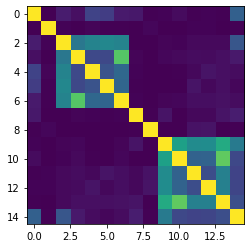

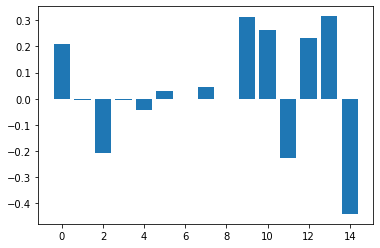

(15,)


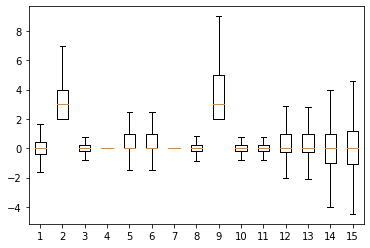

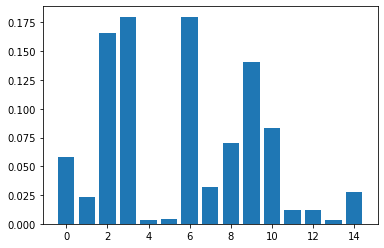

mean:0.014 | std:0.849 | ptp:28.4
mean:3.147 | std:1.865 | ptp:44.0
mean:-0.000 | std:0.826 | ptp:28.4
mean:-0.001 | std:0.520 | ptp:29.2
mean:0.294 | std:0.662 | ptp:32.5
mean:0.275 | std:0.670 | ptp:33.5
mean:0.000 | std:0.503 | ptp:12.3
mean:0.004 | std:0.373 | ptp:8.0
mean:4.373 | std:3.386 | ptp:70.0
mean:0.000 | std:0.593 | ptp:13.5
mean:-0.002 | std:0.461 | ptp:10.0
mean:0.240 | std:0.832 | ptp:28.8
mean:0.245 | std:0.828 | ptp:30.0
mean:-0.000 | std:1.223 | ptp:12.9
mean:0.038 | std:1.912 | ptp:43.4


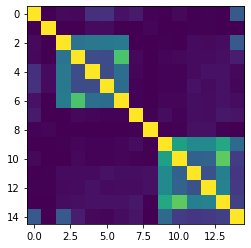

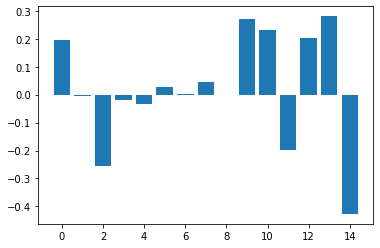

(15,)


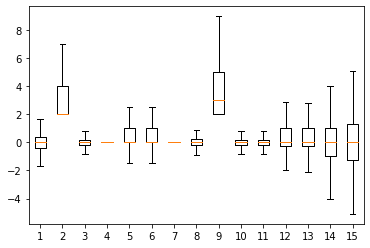

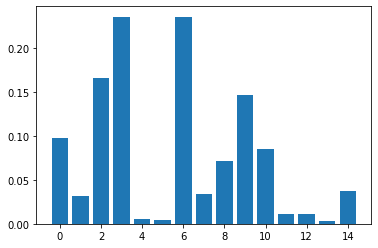

mean:-0.018 | std:1.084 | ptp:24.9
mean:3.138 | std:2.050 | ptp:52.0
mean:-0.001 | std:0.931 | ptp:32.1
mean:0.003 | std:0.558 | ptp:31.6
mean:0.283 | std:0.665 | ptp:40.0
mean:0.277 | std:0.665 | ptp:39.5
mean:0.003 | std:0.586 | ptp:14.3
mean:0.017 | std:0.387 | ptp:8.7
mean:4.397 | std:3.525 | ptp:108.0
mean:-0.001 | std:0.615 | ptp:15.6
mean:-0.005 | std:0.468 | ptp:12.3
mean:0.240 | std:0.830 | ptp:43.5
mean:0.232 | std:0.821 | ptp:42.5
mean:-0.014 | std:1.195 | ptp:15.0
mean:-0.006 | std:2.315 | ptp:52.6


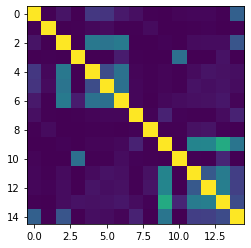

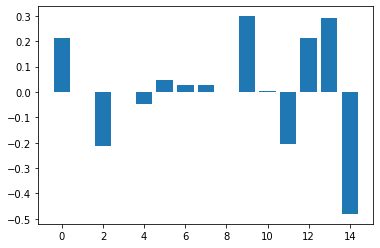

(15,)


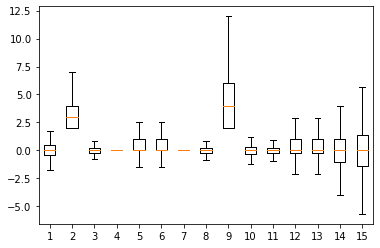

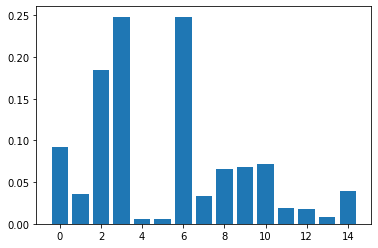

mean:-0.003 | std:1.114 | ptp:38.7
mean:3.273 | std:2.387 | ptp:154.0
mean:-0.004 | std:0.970 | ptp:55.5
mean:-5.631 | std:164.870 | ptp:5568.1
mean:0.286 | std:0.693 | ptp:35.8
mean:0.271 | std:0.698 | ptp:88.0
mean:-0.004 | std:0.624 | ptp:13.9
mean:0.020 | std:0.376 | ptp:10.0
mean:5.307 | std:4.955 | ptp:250.0
mean:-0.000 | std:0.660 | ptp:21.4
mean:-18.551 | std:270.145 | ptp:5581.0
mean:0.249 | std:0.962 | ptp:91.5
mean:0.239 | std:0.943 | ptp:49.5
mean:-0.027 | std:1.466 | ptp:15.5
mean:-0.029 | std:2.583 | ptp:75.5


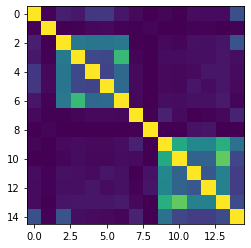

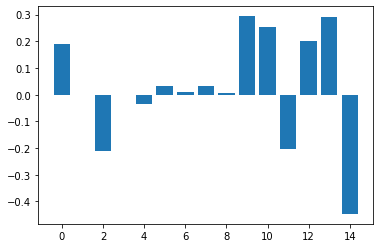

(15,)


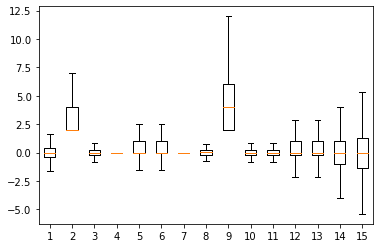

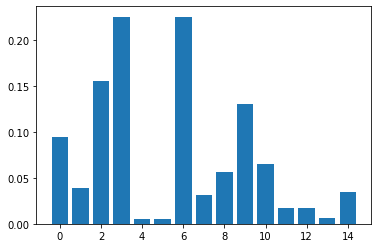

mean:-0.033 | std:1.049 | ptp:29.7
mean:3.249 | std:2.598 | ptp:123.0
mean:-0.000 | std:0.845 | ptp:35.2
mean:0.005 | std:0.505 | ptp:33.7
mean:0.268 | std:0.686 | ptp:71.0
mean:0.260 | std:0.673 | ptp:30.0
mean:0.002 | std:0.596 | ptp:14.1
mean:0.012 | std:0.332 | ptp:10.0
mean:5.054 | std:4.354 | ptp:101.0
mean:0.001 | std:0.580 | ptp:19.8
mean:-0.005 | std:0.439 | ptp:14.4
mean:0.235 | std:0.904 | ptp:40.5
mean:0.241 | std:0.916 | ptp:73.5
mean:-0.011 | std:1.384 | ptp:15.2
mean:-0.040 | std:2.397 | ptp:64.3


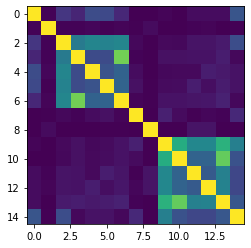

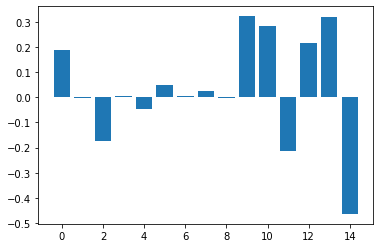

(15,)


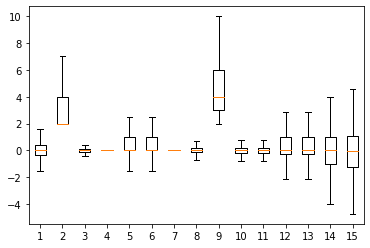

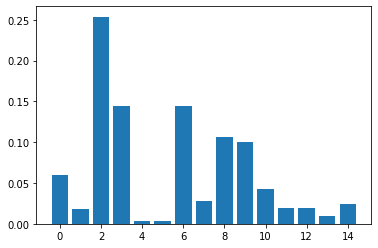

mean:0.019 | std:0.830 | ptp:26.4
mean:3.084 | std:1.746 | ptp:64.0
mean:-0.001 | std:0.716 | ptp:29.3
mean:0.002 | std:0.420 | ptp:19.3
mean:0.295 | std:0.664 | ptp:50.5
mean:0.286 | std:0.654 | ptp:50.5
mean:0.002 | std:0.438 | ptp:13.6
mean:0.021 | std:0.299 | ptp:5.7
mean:5.458 | std:4.900 | ptp:120.0
mean:0.001 | std:0.511 | ptp:10.2
mean:-0.004 | std:0.392 | ptp:9.0
mean:0.243 | std:0.943 | ptp:44.5
mean:0.235 | std:0.937 | ptp:39.3
mean:-0.016 | std:1.466 | ptp:16.0
mean:-0.082 | std:1.936 | ptp:59.2


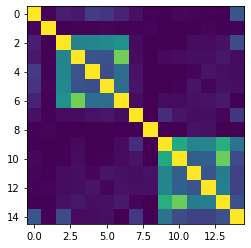

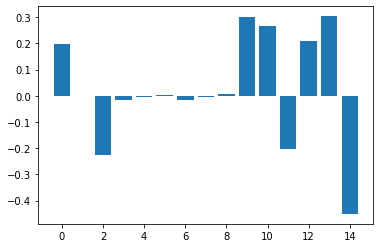

(15,)


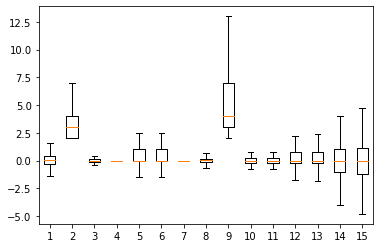

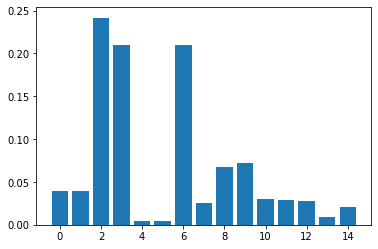

mean:0.059 | std:0.672 | ptp:13.7
mean:3.511 | std:2.314 | ptp:63.0
mean:-0.001 | std:0.635 | ptp:17.5
mean:0.005 | std:0.445 | ptp:14.1
mean:0.251 | std:0.652 | ptp:30.5
mean:0.237 | std:0.650 | ptp:29.5
mean:0.004 | std:0.551 | ptp:11.6
mean:0.007 | std:0.268 | ptp:5.5
mean:5.805 | std:5.166 | ptp:235.0
mean:0.001 | std:0.450 | ptp:10.1
mean:-0.002 | std:0.360 | ptp:9.8
mean:0.213 | std:0.910 | ptp:48.8
mean:0.212 | std:0.910 | ptp:40.5
mean:-0.007 | std:1.446 | ptp:16.0
mean:-0.042 | std:1.936 | ptp:38.6


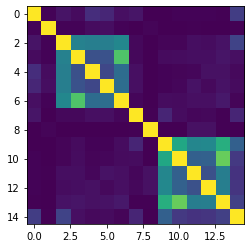

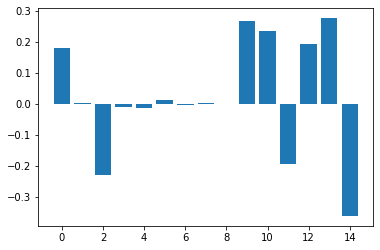

(15,)


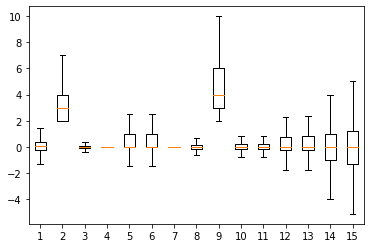

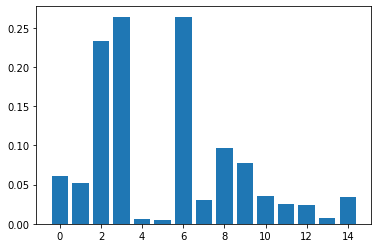

mean:0.086 | std:0.776 | ptp:25.9
mean:3.516 | std:2.691 | ptp:67.0
mean:0.000 | std:0.638 | ptp:23.9
mean:-0.001 | std:0.446 | ptp:19.5
mean:0.249 | std:0.666 | ptp:41.5
mean:0.237 | std:0.656 | ptp:30.5
mean:-0.002 | std:0.660 | ptp:12.2
mean:0.004 | std:0.284 | ptp:5.5
mean:5.275 | std:4.471 | ptp:148.0
mean:0.002 | std:0.461 | ptp:10.5
mean:0.000 | std:0.372 | ptp:7.8
mean:0.206 | std:0.862 | ptp:42.5
mean:0.208 | std:0.859 | ptp:48.2
mean:-0.000 | std:1.357 | ptp:16.4
mean:-0.067 | std:2.288 | ptp:52.6


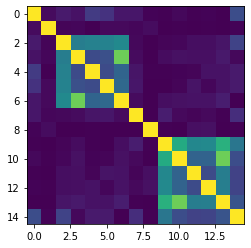

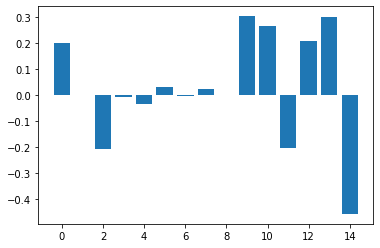

(15,)


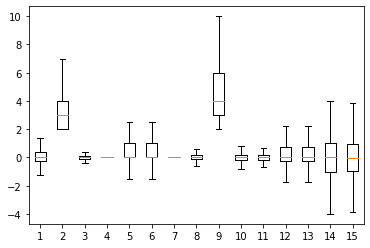

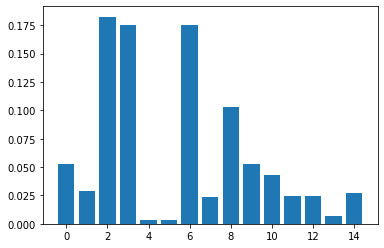

mean:0.079 | std:0.638 | ptp:31.3
mean:3.147 | std:1.976 | ptp:49.0
mean:-0.002 | std:0.544 | ptp:17.3
mean:-0.007 | std:0.369 | ptp:17.0
mean:0.263 | std:0.629 | ptp:30.0
mean:0.243 | std:0.620 | ptp:30.0
mean:-0.007 | std:0.493 | ptp:10.9
mean:0.011 | std:0.249 | ptp:4.4
mean:5.458 | std:4.643 | ptp:90.0
mean:-0.001 | std:0.404 | ptp:7.4
mean:-0.002 | std:0.325 | ptp:6.5
mean:0.202 | std:0.852 | ptp:39.0
mean:0.197 | std:0.844 | ptp:35.0
mean:-0.011 | std:1.347 | ptp:18.5
mean:-0.023 | std:1.631 | ptp:33.2


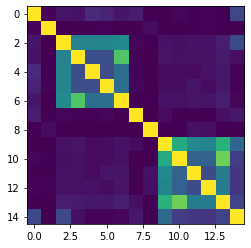

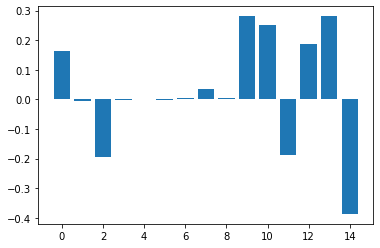

(15,)


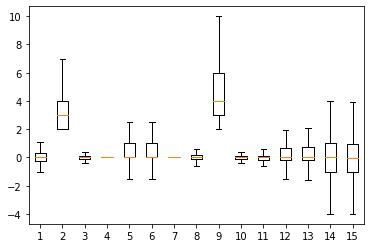

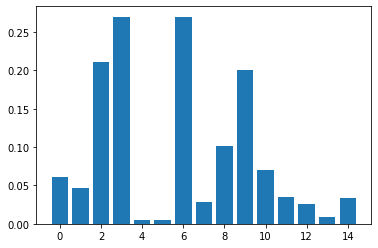

mean:0.040 | std:0.634 | ptp:31.2
mean:3.572 | std:2.515 | ptp:110.0
mean:0.000 | std:0.555 | ptp:27.7
mean:0.003 | std:0.392 | ptp:33.7
mean:0.234 | std:0.673 | ptp:30.4
mean:0.223 | std:0.670 | ptp:29.3
mean:0.004 | std:0.643 | ptp:13.7
mean:0.010 | std:0.256 | ptp:17.8
mean:5.427 | std:4.703 | ptp:171.0
mean:0.001 | std:0.405 | ptp:19.2
mean:-0.004 | std:0.322 | ptp:11.9
mean:0.197 | std:0.831 | ptp:42.0
mean:0.199 | std:0.857 | ptp:96.0
mean:-0.014 | std:1.325 | ptp:15.4
mean:-0.028 | std:1.769 | ptp:60.9


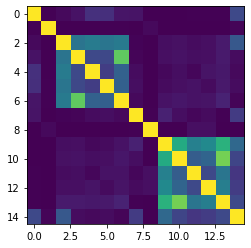

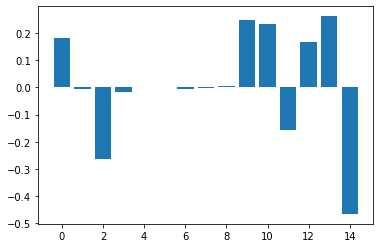

(15,)


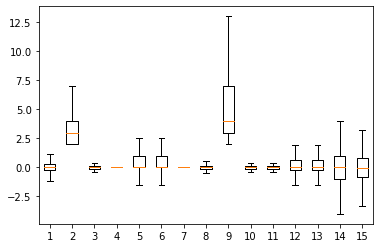

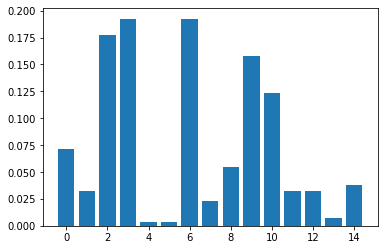

mean:0.036 | std:0.642 | ptp:25.1
mean:3.220 | std:2.164 | ptp:63.0
mean:0.001 | std:0.531 | ptp:16.0
mean:0.001 | std:0.310 | ptp:19.0
mean:0.236 | std:0.641 | ptp:22.0
mean:0.231 | std:0.641 | ptp:32.5
mean:0.002 | std:0.514 | ptp:11.1
mean:0.005 | std:0.217 | ptp:3.6
mean:5.473 | std:5.031 | ptp:367.0
mean:0.002 | std:0.342 | ptp:8.7
mean:0.001 | std:0.281 | ptp:6.9
mean:0.185 | std:0.879 | ptp:104.0
mean:0.188 | std:0.810 | ptp:34.7
mean:0.007 | std:1.287 | ptp:16.3
mean:-0.027 | std:1.489 | ptp:30.0


In [58]:
for file in train_f:
    describe(file)

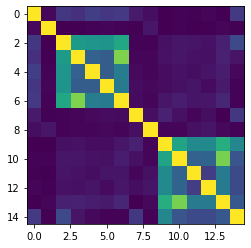

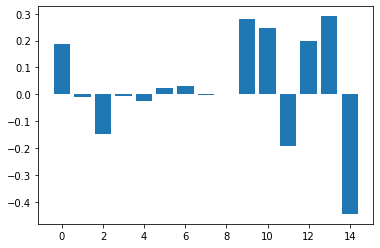

(15,)


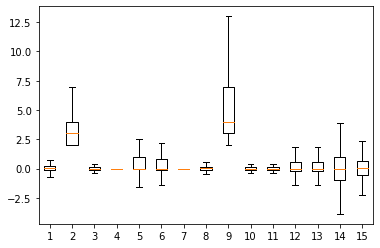

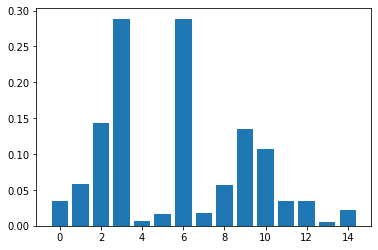

mean:0.039 | std:0.322 | ptp:4.1
mean:3.645 | std:2.611 | ptp:28.0
mean:-0.000 | std:0.354 | ptp:6.5
mean:0.003 | std:0.254 | ptp:4.0
mean:0.201 | std:0.664 | ptp:16.3
mean:0.192 | std:0.675 | ptp:16.0
mean:0.006 | std:0.676 | ptp:10.9
mean:0.018 | std:0.207 | ptp:2.7
mean:5.527 | std:4.558 | ptp:52.0
mean:-0.000 | std:0.310 | ptp:4.7
mean:0.002 | std:0.264 | ptp:3.5
mean:0.180 | std:0.768 | ptp:19.0
mean:0.173 | std:0.761 | ptp:19.5
mean:-0.001 | std:1.233 | ptp:17.0
mean:0.034 | std:0.950 | ptp:14.4


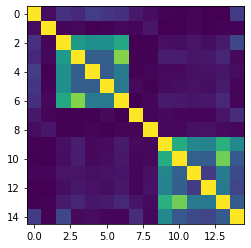

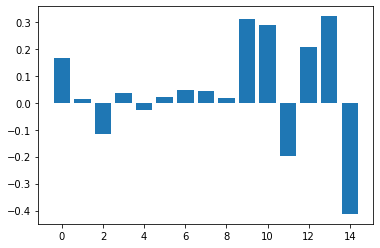

(15,)


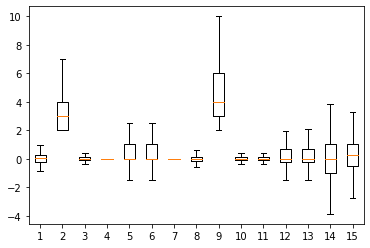

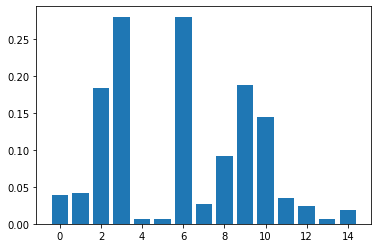

mean:0.037 | std:0.409 | ptp:4.2
mean:3.367 | std:2.269 | ptp:45.0
mean:0.003 | std:0.444 | ptp:7.5
mean:0.006 | std:0.308 | ptp:4.7
mean:0.227 | std:0.680 | ptp:15.0
mean:0.229 | std:0.687 | ptp:18.2
mean:0.013 | std:0.652 | ptp:8.9
mean:0.010 | std:0.239 | ptp:3.5
mean:5.264 | std:4.559 | ptp:52.0
mean:0.003 | std:0.384 | ptp:7.4
mean:0.002 | std:0.305 | ptp:4.9
mean:0.195 | std:0.839 | ptp:29.5
mean:0.215 | std:0.853 | ptp:28.5
mean:0.009 | std:1.279 | ptp:13.6
mean:0.294 | std:1.213 | ptp:17.3


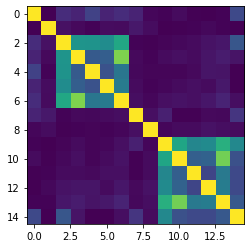

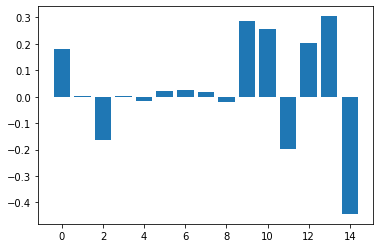

(15,)


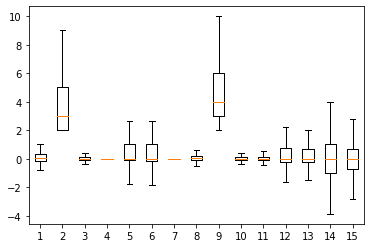

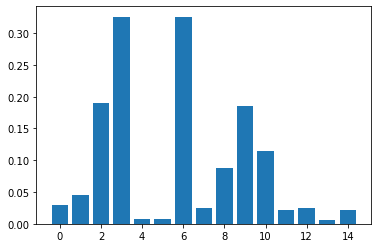

mean:0.098 | std:0.391 | ptp:5.3
mean:3.886 | std:2.771 | ptp:43.0
mean:-0.002 | std:0.434 | ptp:7.2
mean:-0.013 | std:0.319 | ptp:6.8
mean:0.238 | std:0.710 | ptp:16.0
mean:0.213 | std:0.707 | ptp:15.0
mean:-0.029 | std:0.710 | ptp:8.7
mean:0.017 | std:0.232 | ptp:3.9
mean:5.198 | std:4.375 | ptp:55.0
mean:0.001 | std:0.368 | ptp:4.6
mean:0.005 | std:0.307 | ptp:6.7
mean:0.198 | std:0.857 | ptp:28.0
mean:0.207 | std:0.803 | ptp:19.0
mean:0.012 | std:1.271 | ptp:13.9
mean:-0.021 | std:1.138 | ptp:14.4


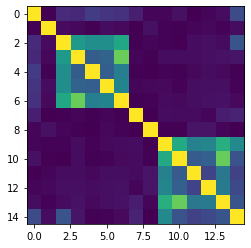

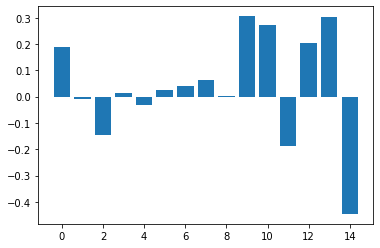

(15,)


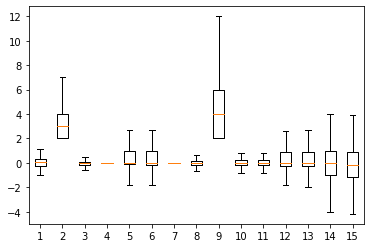

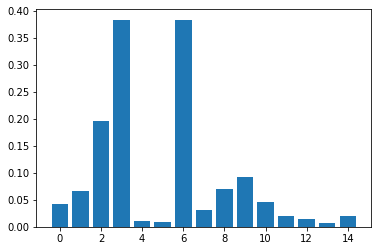

mean:0.054 | std:0.493 | ptp:6.3
mean:3.734 | std:2.747 | ptp:30.0
mean:-0.003 | std:0.594 | ptp:11.5
mean:-0.013 | std:0.444 | ptp:9.1
mean:0.249 | std:0.757 | ptp:20.5
mean:0.235 | std:0.738 | ptp:17.5
mean:-0.020 | std:0.795 | ptp:10.5
mean:0.008 | std:0.293 | ptp:5.3
mean:5.414 | std:4.993 | ptp:69.0
mean:-0.002 | std:0.505 | ptp:11.6
mean:0.000 | std:0.397 | ptp:6.5
mean:0.238 | std:0.913 | ptp:41.0
mean:0.227 | std:0.872 | ptp:28.0
mean:-0.018 | std:1.396 | ptp:13.8
mean:-0.121 | std:1.655 | ptp:27.8


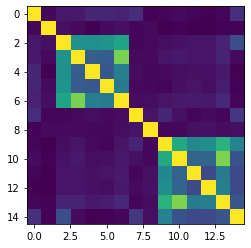

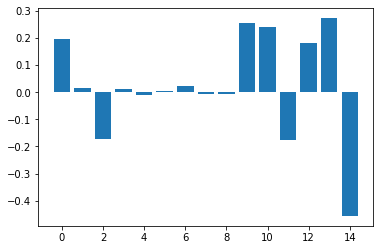

(15,)


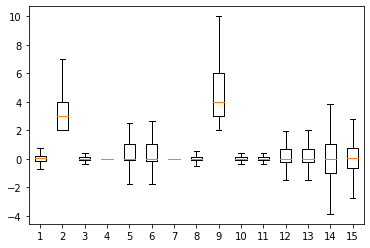

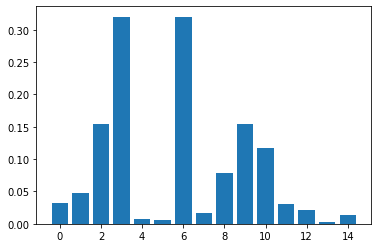

mean:0.031 | std:0.319 | ptp:3.5
mean:3.416 | std:2.173 | ptp:26.0
mean:-0.003 | std:0.378 | ptp:10.9
mean:-0.001 | std:0.290 | ptp:5.7
mean:0.213 | std:0.687 | ptp:18.5
mean:0.211 | std:0.688 | ptp:18.5
mean:0.001 | std:0.693 | ptp:9.4
mean:0.012 | std:0.207 | ptp:2.5
mean:5.019 | std:4.060 | ptp:54.0
mean:-0.004 | std:0.326 | ptp:4.6
mean:-0.005 | std:0.270 | ptp:3.1
mean:0.194 | std:0.823 | ptp:27.2
mean:0.174 | std:0.776 | ptp:22.0
mean:-0.017 | std:1.210 | ptp:12.3
mean:0.031 | std:1.075 | ptp:17.2


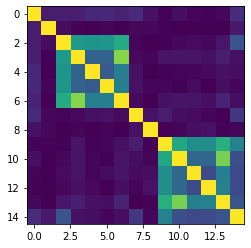

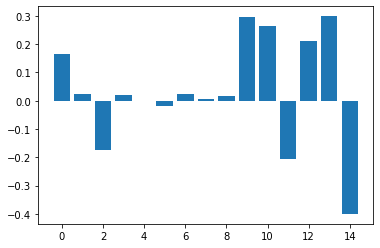

(15,)


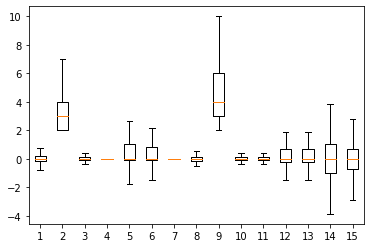

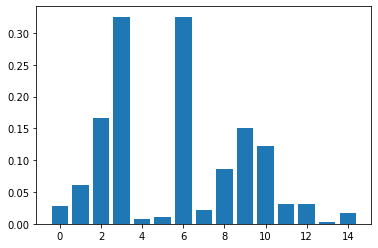

mean:0.008 | std:0.326 | ptp:3.8
mean:3.689 | std:2.656 | ptp:55.0
mean:-0.000 | std:0.400 | ptp:7.1
mean:0.006 | std:0.306 | ptp:6.5
mean:0.200 | std:0.686 | ptp:19.8
mean:0.200 | std:0.672 | ptp:15.5
mean:0.011 | std:0.719 | ptp:10.0
mean:0.002 | std:0.222 | ptp:2.6
mean:5.180 | std:4.092 | ptp:48.0
mean:-0.002 | std:0.328 | ptp:5.1
mean:0.001 | std:0.275 | ptp:3.7
mean:0.177 | std:0.750 | ptp:23.0
mean:0.180 | std:0.762 | ptp:19.8
mean:-0.006 | std:1.203 | ptp:13.1
mean:-0.051 | std:1.126 | ptp:14.2


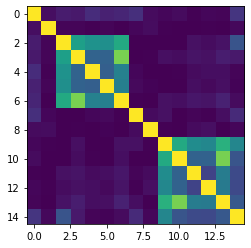

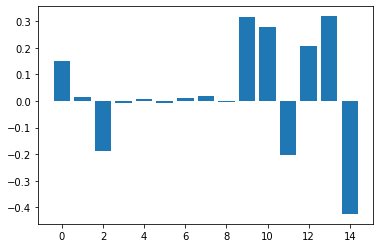

(15,)


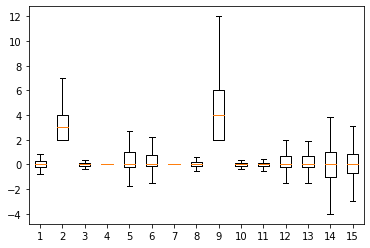

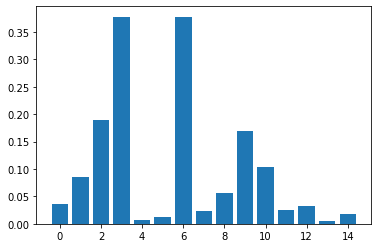

mean:0.041 | std:0.372 | ptp:4.9
mean:4.059 | std:3.444 | ptp:66.0
mean:-0.003 | std:0.442 | ptp:7.6
mean:0.004 | std:0.323 | ptp:5.8
mean:0.213 | std:0.723 | ptp:24.0
mean:0.200 | std:0.702 | ptp:18.5
mean:0.015 | std:0.782 | ptp:13.2
mean:0.033 | std:0.231 | ptp:3.9
mean:5.127 | std:4.235 | ptp:59.0
mean:-0.004 | std:0.357 | ptp:7.1
mean:-0.004 | std:0.296 | ptp:5.4
mean:0.195 | std:0.813 | ptp:20.7
mean:0.191 | std:0.833 | ptp:27.5
mean:-0.017 | std:1.261 | ptp:13.7
mean:0.080 | std:1.238 | ptp:22.4


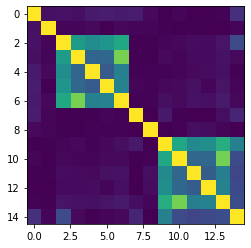

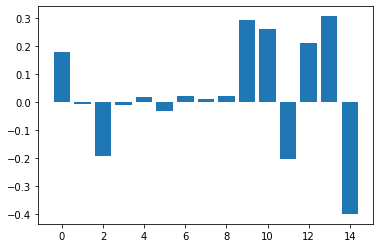

(15,)


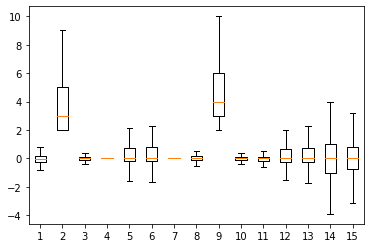

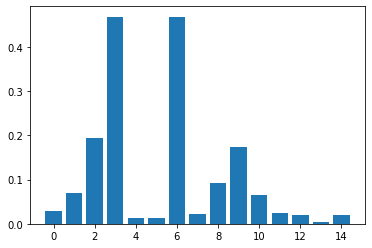

mean:-0.021 | std:0.339 | ptp:4.3
mean:4.653 | std:7.611 | ptp:320.0
mean:0.004 | std:0.410 | ptp:6.3
mean:0.016 | std:0.313 | ptp:4.7
mean:0.191 | std:0.737 | ptp:26.0
mean:0.194 | std:0.721 | ptp:17.0
mean:0.031 | std:0.879 | ptp:10.3
mean:0.011 | std:0.213 | ptp:2.4
mean:5.254 | std:4.449 | ptp:59.0
mean:0.002 | std:0.353 | ptp:5.3
mean:-0.008 | std:0.283 | ptp:4.0
mean:0.189 | std:0.822 | ptp:31.0
mean:0.202 | std:0.803 | ptp:33.8
mean:-0.028 | std:1.267 | ptp:14.4
mean:0.020 | std:1.257 | ptp:13.3


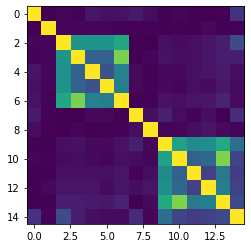

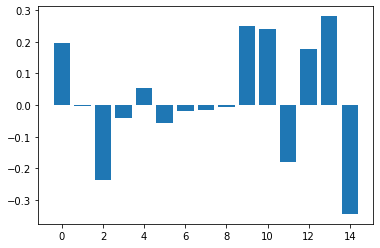

(15,)


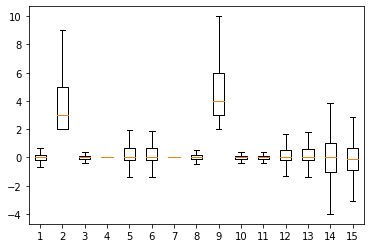

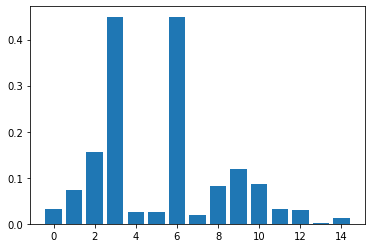

mean:0.022 | std:0.290 | ptp:3.5
mean:4.421 | std:3.341 | ptp:33.0
mean:0.000 | std:0.350 | ptp:7.9
mean:0.010 | std:0.293 | ptp:5.3
mean:0.176 | std:0.683 | ptp:22.0
mean:0.180 | std:0.691 | ptp:16.0
mean:0.023 | std:0.848 | ptp:11.0
mean:0.034 | std:0.195 | ptp:2.1
mean:5.058 | std:3.841 | ptp:52.0
mean:0.001 | std:0.288 | ptp:5.7
mean:0.002 | std:0.244 | ptp:3.4
mean:0.171 | std:0.755 | ptp:28.0
mean:0.172 | std:0.728 | ptp:27.5
mean:0.002 | std:1.137 | ptp:11.8
mean:-0.122 | std:1.159 | ptp:14.5


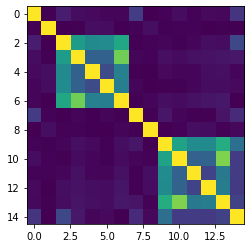

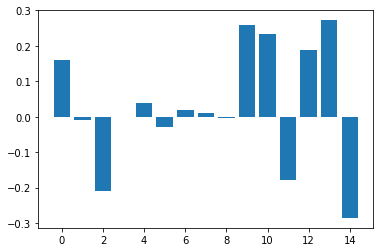

(15,)


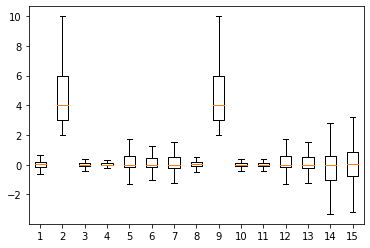

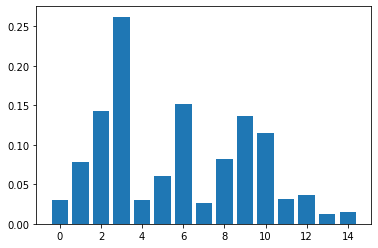

mean:0.021 | std:0.274 | ptp:3.0
mean:5.055 | std:4.309 | ptp:55.0
mean:-0.001 | std:0.346 | ptp:5.9
mean:0.009 | std:0.305 | ptp:5.3
mean:0.178 | std:0.718 | ptp:25.5
mean:0.157 | std:0.721 | ptp:21.5
mean:0.020 | std:1.003 | ptp:12.4
mean:0.022 | std:0.208 | ptp:2.8
mean:5.095 | std:3.980 | ptp:63.0
mean:-0.001 | std:0.321 | ptp:6.2
mean:-0.007 | std:0.271 | ptp:4.5
mean:0.182 | std:0.749 | ptp:21.8
mean:0.166 | std:0.732 | ptp:21.5
mean:-0.028 | std:1.120 | ptp:12.5
mean:0.028 | std:1.235 | ptp:15.2


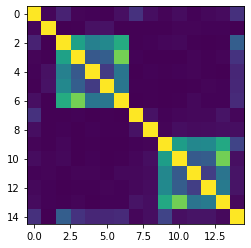

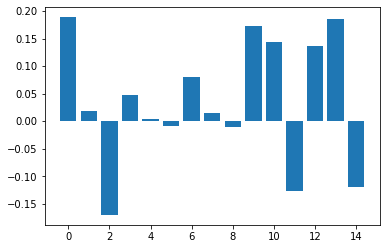

(15,)


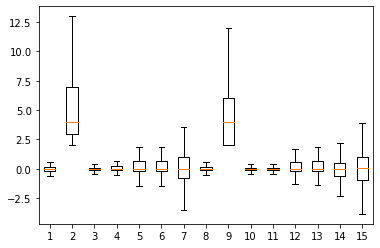

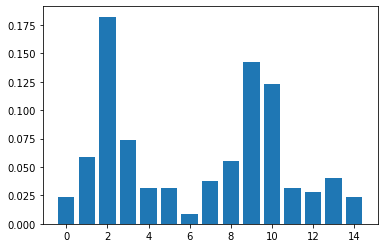

mean:-0.016 | std:0.257 | ptp:3.7
mean:5.497 | std:5.256 | ptp:130.0
mean:0.005 | std:0.383 | ptp:9.0
mean:0.016 | std:0.328 | ptp:5.6
mean:0.182 | std:0.841 | ptp:43.2
mean:0.213 | std:0.797 | ptp:17.5
mean:0.059 | std:1.200 | ptp:15.6
mean:0.023 | std:0.246 | ptp:4.7
mean:4.951 | std:4.270 | ptp:54.0
mean:0.004 | std:0.330 | ptp:6.6
mean:-0.005 | std:0.282 | ptp:5.0
mean:0.184 | std:0.748 | ptp:22.5
mean:0.184 | std:0.724 | ptp:21.8
mean:-0.007 | std:1.034 | ptp:10.8
mean:0.018 | std:1.595 | ptp:22.2


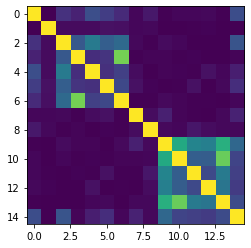

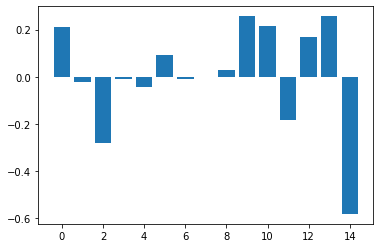

(15,)


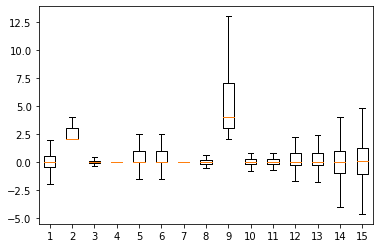

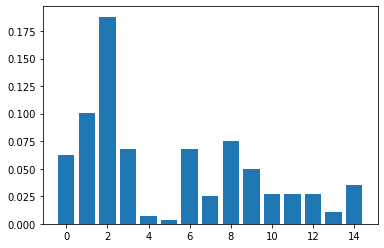

mean:0.092 | std:1.242 | ptp:28.8
mean:2.951 | std:1.866 | ptp:18.0
mean:0.009 | std:0.741 | ptp:15.8
mean:-0.008 | std:0.355 | ptp:9.5
mean:0.274 | std:0.629 | ptp:13.0
mean:0.291 | std:0.588 | ptp:12.0
mean:-0.014 | std:0.292 | ptp:6.6
mean:-0.011 | std:0.243 | ptp:2.7
mean:6.006 | std:5.584 | ptp:97.0
mean:0.004 | std:0.400 | ptp:5.2
mean:0.004 | std:0.319 | ptp:4.7
mean:0.206 | std:0.929 | ptp:30.4
mean:0.220 | std:0.972 | ptp:46.5
mean:0.029 | std:1.468 | ptp:15.6
mean:0.049 | std:2.144 | ptp:33.9


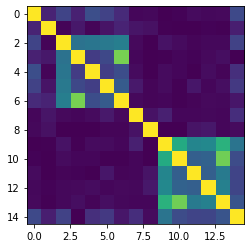

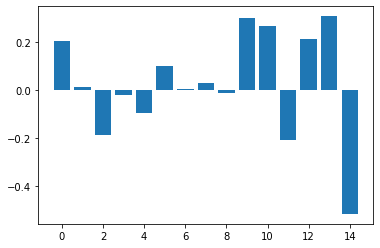

(15,)


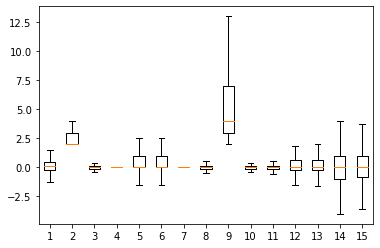

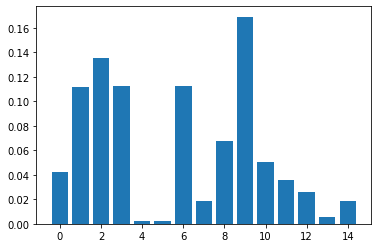

mean:0.147 | std:0.683 | ptp:10.6
mean:3.260 | std:3.641 | ptp:56.0
mean:-0.001 | std:0.493 | ptp:12.6
mean:0.003 | std:0.255 | ptp:7.9
mean:0.261 | std:0.621 | ptp:20.5
mean:0.214 | std:0.558 | ptp:8.0
mean:-0.007 | std:0.389 | ptp:6.5
mean:0.020 | std:0.211 | ptp:2.0
mean:5.881 | std:4.932 | ptp:89.0
mean:-0.001 | std:0.345 | ptp:6.9
mean:-0.002 | std:0.275 | ptp:3.3
mean:0.202 | std:0.896 | ptp:36.5
mean:0.186 | std:0.876 | ptp:35.5
mean:-0.031 | std:1.381 | ptp:16.1
mean:0.080 | std:1.494 | ptp:21.2


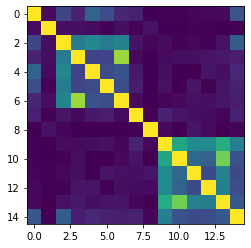

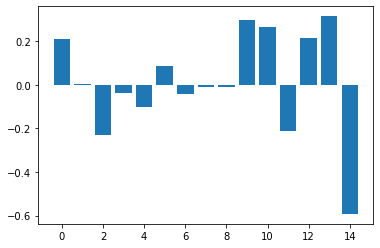

(15,)


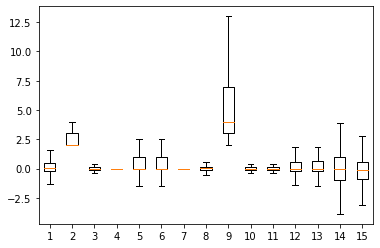

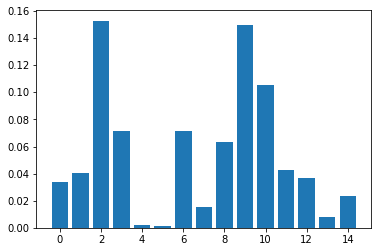

mean:0.135 | std:0.646 | ptp:7.6
mean:2.513 | std:1.091 | ptp:21.0
mean:0.001 | std:0.529 | ptp:17.0
mean:-0.003 | std:0.242 | ptp:9.4
mean:0.273 | std:0.596 | ptp:14.0
mean:0.246 | std:0.584 | ptp:8.5
mean:-0.001 | std:0.290 | ptp:5.4
mean:0.005 | std:0.216 | ptp:2.1
mean:5.749 | std:4.870 | ptp:52.0
mean:0.005 | std:0.319 | ptp:3.9
mean:0.002 | std:0.262 | ptp:2.9
mean:0.167 | std:0.806 | ptp:16.5
mean:0.172 | std:0.818 | ptp:20.7
mean:0.007 | std:1.299 | ptp:13.5
mean:-0.145 | std:1.232 | ptp:22.9


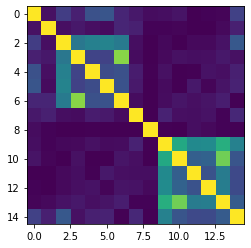

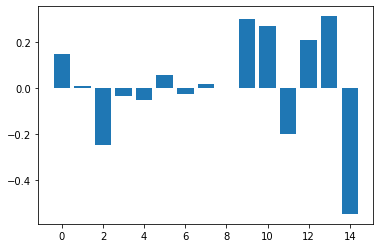

(15,)


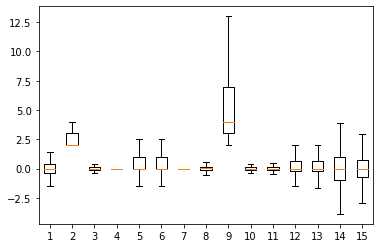

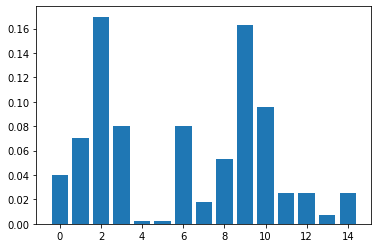

mean:-0.011 | std:0.657 | ptp:9.3
mean:2.851 | std:1.965 | ptp:30.0
mean:-0.001 | std:0.531 | ptp:14.6
mean:-0.006 | std:0.244 | ptp:8.6
mean:0.256 | std:0.607 | ptp:13.5
mean:0.258 | std:0.597 | ptp:7.3
mean:-0.008 | std:0.327 | ptp:6.5
mean:0.008 | std:0.208 | ptp:3.3
mean:5.507 | std:4.579 | ptp:60.0
mean:-0.002 | std:0.332 | ptp:5.0
mean:-0.007 | std:0.267 | ptp:3.7
mean:0.181 | std:0.835 | ptp:24.0
mean:0.163 | std:0.830 | ptp:32.0
mean:-0.026 | std:1.346 | ptp:14.9
mean:0.012 | std:1.256 | ptp:20.8


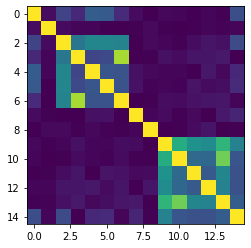

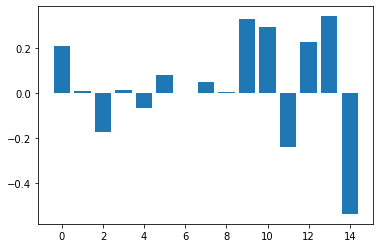

(15,)


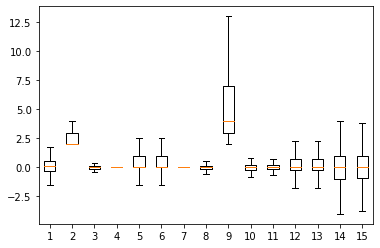

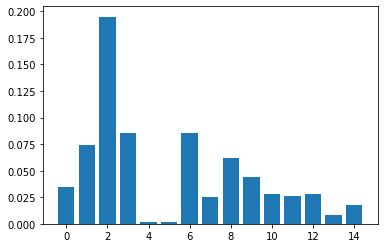

mean:0.136 | std:0.731 | ptp:8.2
mean:2.810 | std:1.437 | ptp:18.0
mean:-0.000 | std:0.607 | ptp:10.1
mean:-0.003 | std:0.290 | ptp:6.4
mean:0.272 | std:0.607 | ptp:14.5
mean:0.276 | std:0.601 | ptp:10.5
mean:-0.001 | std:0.320 | ptp:7.0
mean:0.006 | std:0.232 | ptp:2.4
mean:5.683 | std:4.822 | ptp:55.0
mean:0.002 | std:0.389 | ptp:5.0
mean:0.001 | std:0.301 | ptp:3.0
mean:0.187 | std:0.852 | ptp:20.5
mean:0.210 | std:0.893 | ptp:32.5
mean:-0.002 | std:1.453 | ptp:13.7
mean:0.025 | std:1.511 | ptp:17.6


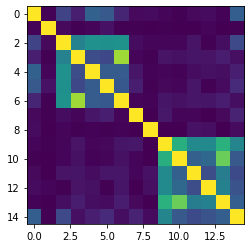

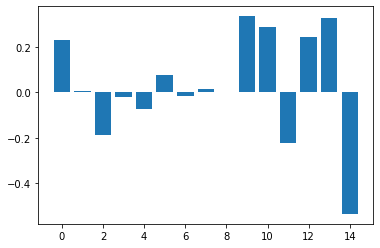

(15,)


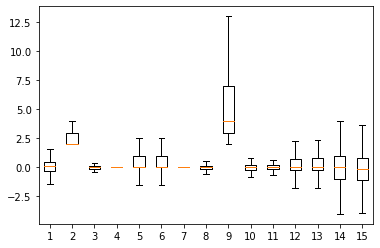

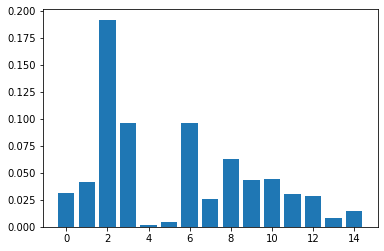

mean:0.116 | std:0.659 | ptp:9.9
mean:2.511 | std:0.983 | ptp:10.0
mean:0.003 | std:0.574 | ptp:11.2
mean:0.004 | std:0.311 | ptp:6.0
mean:0.254 | std:0.566 | ptp:8.0
mean:0.269 | std:0.603 | ptp:8.0
mean:0.007 | std:0.342 | ptp:6.0
mean:-0.004 | std:0.242 | ptp:3.3
mean:5.722 | std:4.902 | ptp:70.0
mean:0.004 | std:0.387 | ptp:5.5
mean:0.004 | std:0.303 | ptp:4.4
mean:0.193 | std:0.879 | ptp:23.5
mean:0.206 | std:0.887 | ptp:24.0
mean:-0.003 | std:1.440 | ptp:15.3
mean:-0.146 | std:1.495 | ptp:21.9


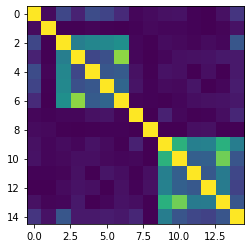

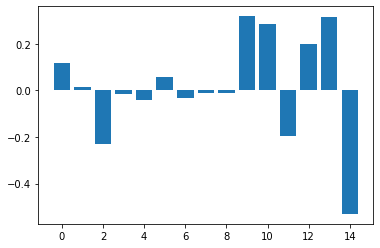

(15,)


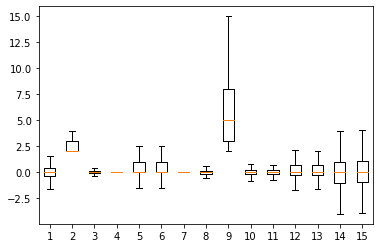

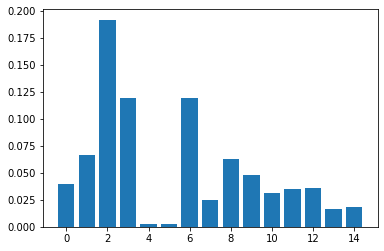

mean:0.029 | std:0.943 | ptp:36.8
mean:2.749 | std:1.545 | ptp:20.0
mean:0.003 | std:0.630 | ptp:14.1
mean:-0.005 | std:0.376 | ptp:9.9
mean:0.281 | std:0.615 | ptp:12.8
mean:0.264 | std:0.611 | ptp:10.0
mean:-0.007 | std:0.391 | ptp:7.7
mean:0.013 | std:0.239 | ptp:4.1
mean:6.398 | std:5.730 | ptp:59.0
mean:0.002 | std:0.399 | ptp:9.3
mean:0.003 | std:0.320 | ptp:6.9
mean:0.204 | std:0.949 | ptp:28.0
mean:0.192 | std:0.934 | ptp:28.0
mean:0.009 | std:1.577 | ptp:16.1
mean:0.074 | std:1.592 | ptp:26.4


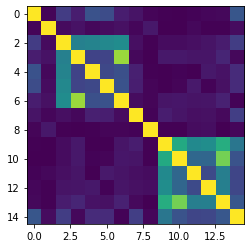

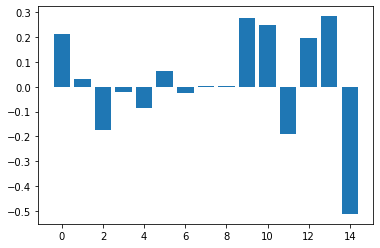

(15,)


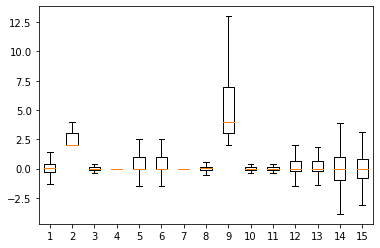

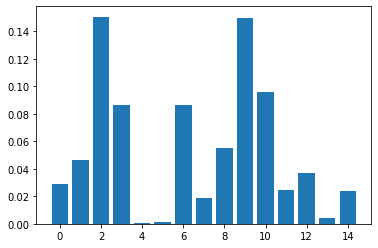

mean:0.058 | std:0.606 | ptp:19.9
mean:2.642 | std:1.214 | ptp:20.0
mean:-0.000 | std:0.463 | ptp:8.1
mean:0.007 | std:0.284 | ptp:7.4
mean:0.255 | std:0.567 | ptp:9.0
mean:0.251 | std:0.588 | ptp:16.0
mean:0.003 | std:0.323 | ptp:6.0
mean:0.003 | std:0.207 | ptp:2.4
mean:5.615 | std:4.979 | ptp:83.0
mean:-0.002 | std:0.321 | ptp:4.4
mean:0.000 | std:0.257 | ptp:3.1
mean:0.169 | std:0.801 | ptp:23.5
mean:0.168 | std:0.776 | ptp:18.0
mean:0.011 | std:1.264 | ptp:13.2
mean:0.012 | std:1.282 | ptp:14.2


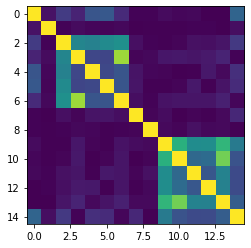

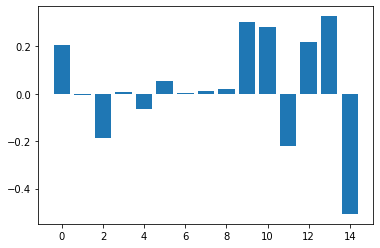

(15,)


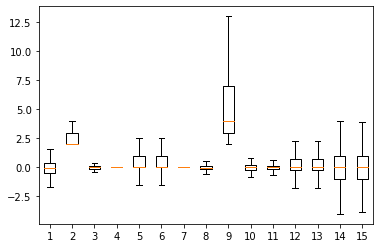

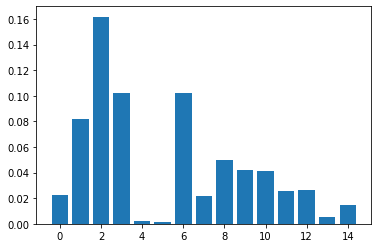

mean:-0.055 | std:0.698 | ptp:14.7
mean:2.921 | std:2.167 | ptp:34.0
mean:-0.000 | std:0.515 | ptp:8.2
mean:0.000 | std:0.310 | ptp:7.4
mean:0.238 | std:0.602 | ptp:19.5
mean:0.254 | std:0.591 | ptp:7.0
mean:0.002 | std:0.356 | ptp:7.7
mean:-0.007 | std:0.229 | ptp:2.3
mean:5.446 | std:4.554 | ptp:54.0
mean:-0.003 | std:0.375 | ptp:4.9
mean:-0.002 | std:0.294 | ptp:4.2
mean:0.203 | std:0.845 | ptp:17.7
mean:0.191 | std:0.855 | ptp:23.3
mean:-0.009 | std:1.376 | ptp:14.3
mean:0.008 | std:1.504 | ptp:14.7


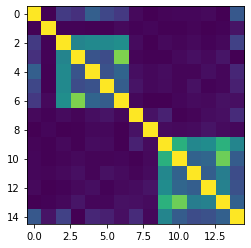

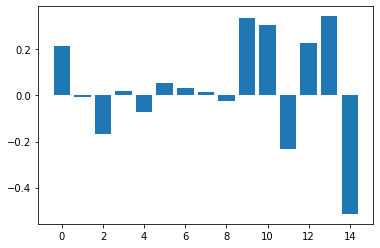

(15,)


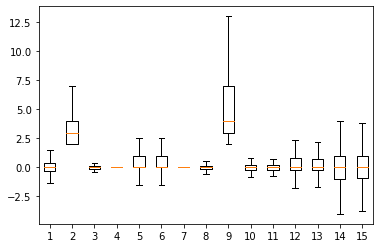

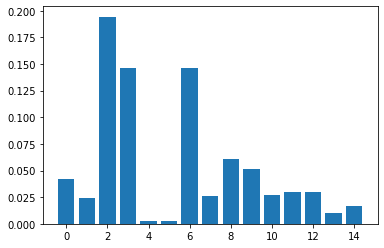

mean:0.078 | std:0.656 | ptp:8.8
mean:3.133 | std:2.015 | ptp:29.0
mean:-0.005 | std:0.541 | ptp:9.8
mean:0.010 | std:0.327 | ptp:7.3
mean:0.254 | std:0.616 | ptp:10.0
mean:0.240 | std:0.624 | ptp:12.5
mean:0.011 | std:0.449 | ptp:7.5
mean:0.022 | std:0.236 | ptp:2.6
mean:5.690 | std:4.805 | ptp:70.0
mean:-0.001 | std:0.407 | ptp:7.3
mean:-0.003 | std:0.320 | ptp:5.1
mean:0.214 | std:0.912 | ptp:25.0
mean:0.184 | std:0.865 | ptp:19.5
mean:-0.021 | std:1.483 | ptp:15.1
mean:0.031 | std:1.497 | ptp:18.1


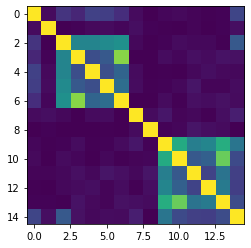

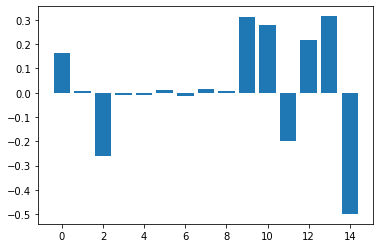

(15,)


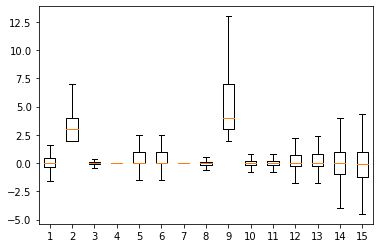

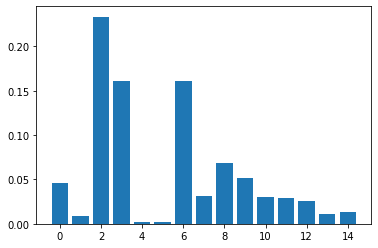

mean:0.065 | std:0.869 | ptp:19.0
mean:3.011 | std:1.315 | ptp:19.0
mean:0.007 | std:0.667 | ptp:16.1
mean:-0.004 | std:0.365 | ptp:9.0
mean:0.278 | std:0.636 | ptp:10.0
mean:0.292 | std:0.650 | ptp:10.0
mean:-0.005 | std:0.465 | ptp:8.4
mean:-0.015 | std:0.250 | ptp:3.4
mean:5.911 | std:5.520 | ptp:78.0
mean:0.002 | std:0.406 | ptp:6.7
mean:0.006 | std:0.329 | ptp:4.9
mean:0.208 | std:0.950 | ptp:41.5
mean:0.223 | std:0.901 | ptp:23.0
mean:0.011 | std:1.464 | ptp:14.8
mean:-0.098 | std:1.707 | ptp:25.3


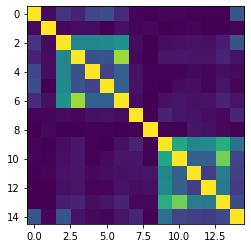

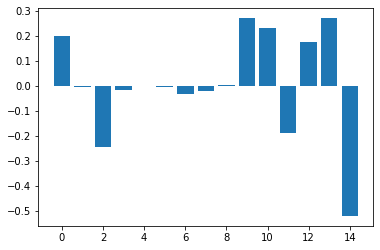

(15,)


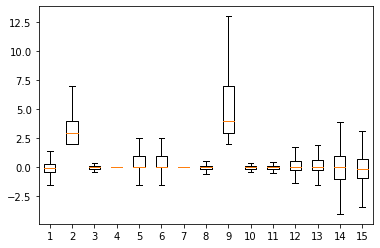

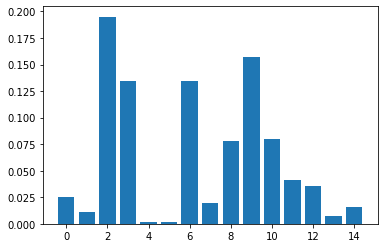

mean:-0.065 | std:0.584 | ptp:5.0
mean:2.998 | std:1.403 | ptp:19.0
mean:0.000 | std:0.521 | ptp:8.2
mean:-0.003 | std:0.294 | ptp:6.4
mean:0.295 | std:0.624 | ptp:13.5
mean:0.300 | std:0.618 | ptp:9.5
mean:-0.006 | std:0.407 | ptp:6.0
mean:-0.008 | std:0.224 | ptp:2.3
mean:6.129 | std:5.333 | ptp:64.0
mean:0.004 | std:0.327 | ptp:4.1
mean:0.003 | std:0.272 | ptp:3.3
mean:0.164 | std:0.830 | ptp:33.2
mean:0.202 | std:0.833 | ptp:22.0
mean:0.019 | std:1.332 | ptp:12.4
mean:-0.099 | std:1.289 | ptp:15.9


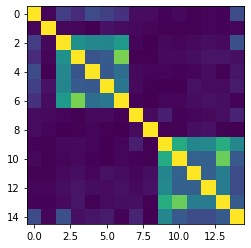

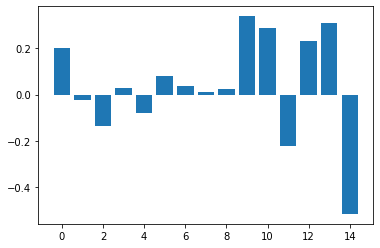

(15,)


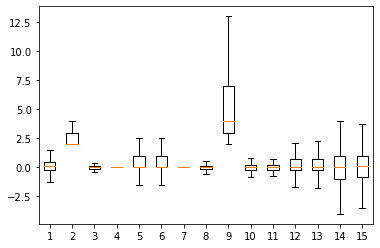

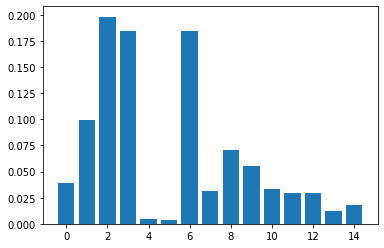

mean:0.126 | std:0.667 | ptp:21.7
mean:3.079 | std:2.287 | ptp:22.0
mean:0.006 | std:0.586 | ptp:14.6
mean:-0.005 | std:0.388 | ptp:9.0
mean:0.289 | std:0.669 | ptp:18.5
mean:0.279 | std:0.655 | ptp:20.0
mean:-0.016 | std:0.510 | ptp:8.7
mean:0.003 | std:0.252 | ptp:3.7
mean:5.838 | std:5.026 | ptp:61.0
mean:0.007 | std:0.424 | ptp:6.7
mean:0.000 | std:0.331 | ptp:5.0
mean:0.183 | std:0.906 | ptp:34.5
mean:0.199 | std:0.888 | ptp:21.1
mean:0.003 | std:1.493 | ptp:16.1
mean:0.089 | std:1.448 | ptp:23.5


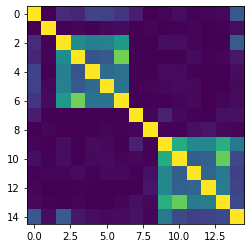

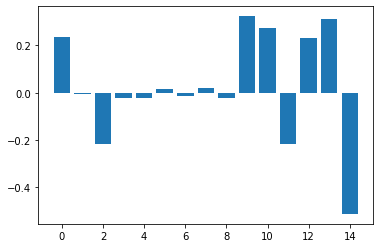

(15,)


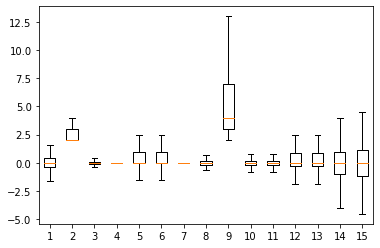

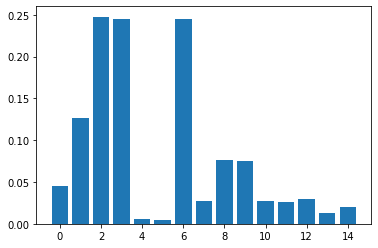

mean:0.028 | std:0.746 | ptp:9.3
mean:3.381 | std:4.856 | ptp:108.0
mean:-0.001 | std:0.723 | ptp:12.0
mean:-0.009 | std:0.500 | ptp:9.7
mean:0.298 | std:0.734 | ptp:44.0
mean:0.287 | std:0.716 | ptp:52.0
mean:-0.005 | std:0.577 | ptp:11.1
mean:0.015 | std:0.278 | ptp:3.2
mean:5.942 | std:5.298 | ptp:79.0
mean:-0.002 | std:0.470 | ptp:8.8
mean:-0.004 | std:0.359 | ptp:6.9
mean:0.225 | std:0.953 | ptp:27.0
mean:0.205 | std:0.936 | ptp:29.0
mean:-0.021 | std:1.540 | ptp:15.7
mean:-0.039 | std:1.825 | ptp:23.7


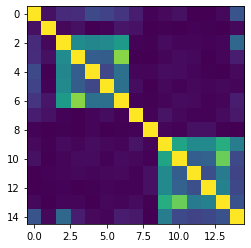

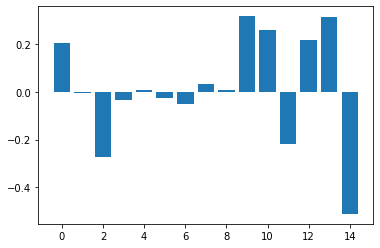

(15,)


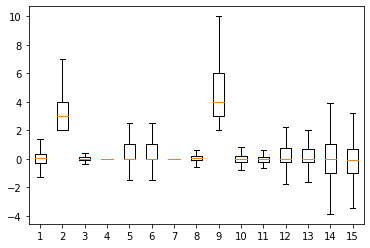

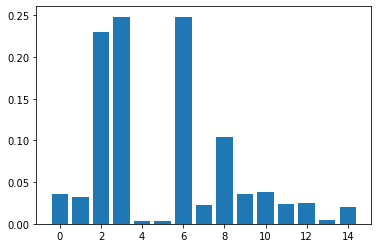

mean:0.032 | std:0.587 | ptp:6.2
mean:3.229 | std:2.349 | ptp:38.0
mean:0.001 | std:0.608 | ptp:10.3
mean:0.016 | std:0.407 | ptp:8.4
mean:0.291 | std:0.661 | ptp:19.0
mean:0.266 | std:0.639 | ptp:16.5
mean:0.015 | std:0.556 | ptp:7.9
mean:0.031 | std:0.247 | ptp:2.5
mean:5.462 | std:4.646 | ptp:51.0
mean:-0.002 | std:0.368 | ptp:5.2
mean:-0.014 | std:0.297 | ptp:4.1
mean:0.201 | std:0.864 | ptp:22.0
mean:0.182 | std:0.851 | ptp:30.0
mean:-0.048 | std:1.313 | ptp:13.2
mean:-0.157 | std:1.346 | ptp:19.4


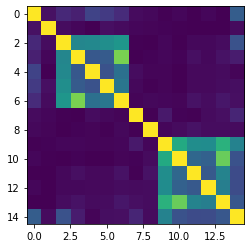

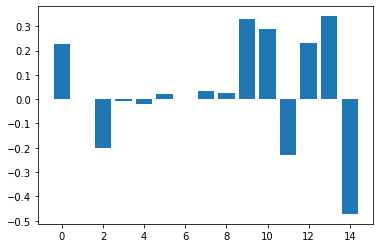

(15,)


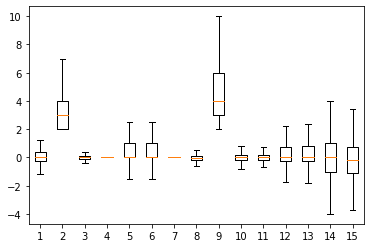

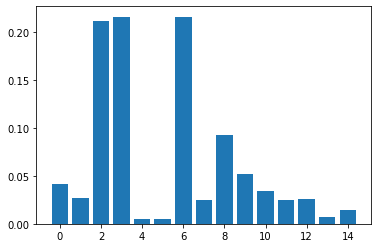

mean:0.054 | std:0.557 | ptp:9.1
mean:3.102 | std:1.769 | ptp:21.0
mean:0.004 | std:0.566 | ptp:10.5
mean:-0.000 | std:0.369 | ptp:7.1
mean:0.271 | std:0.650 | ptp:17.5
mean:0.266 | std:0.647 | ptp:13.5
mean:0.000 | std:0.545 | ptp:7.9
mean:-0.038 | std:0.238 | ptp:3.6
mean:5.300 | std:4.383 | ptp:72.0
mean:0.006 | std:0.406 | ptp:5.2
mean:0.009 | std:0.327 | ptp:5.3
mean:0.183 | std:0.858 | ptp:22.5
mean:0.223 | std:0.883 | ptp:23.0
mean:0.024 | std:1.388 | ptp:13.2
mean:-0.183 | std:1.398 | ptp:16.8


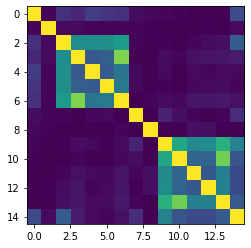

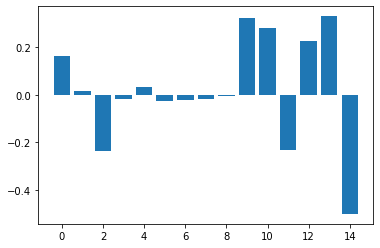

(15,)


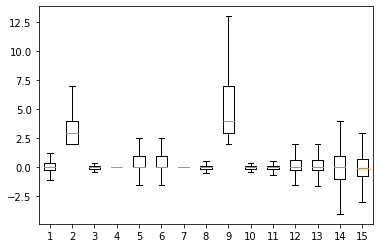

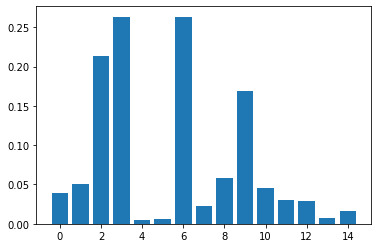

mean:0.077 | std:0.524 | ptp:6.6
mean:3.510 | std:2.144 | ptp:28.0
mean:-0.001 | std:0.520 | ptp:10.3
mean:-0.005 | std:0.327 | ptp:9.5
mean:0.265 | std:0.680 | ptp:23.5
mean:0.239 | std:0.684 | ptp:24.5
mean:-0.002 | std:0.602 | ptp:10.7
mean:-0.003 | std:0.216 | ptp:2.7
mean:5.627 | std:5.065 | ptp:201.0
mean:-0.002 | std:0.344 | ptp:4.5
mean:-0.006 | std:0.284 | ptp:3.6
mean:0.193 | std:0.884 | ptp:32.5
mean:0.184 | std:0.838 | ptp:24.0
mean:-0.013 | std:1.363 | ptp:13.7
mean:-0.030 | std:1.180 | ptp:17.9


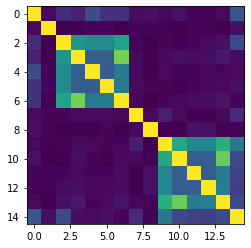

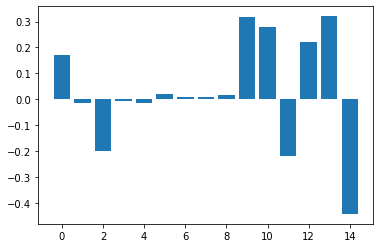

(15,)


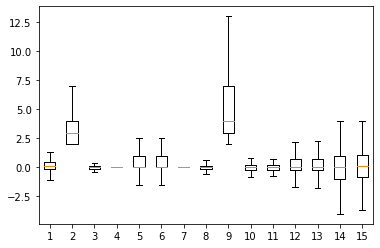

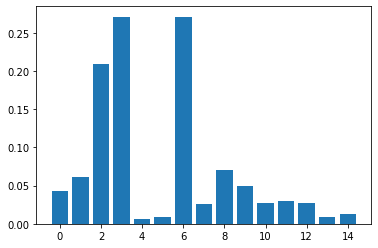

mean:0.136 | std:0.550 | ptp:7.8
mean:3.610 | std:2.615 | ptp:54.0
mean:-0.001 | std:0.540 | ptp:9.3
mean:0.004 | std:0.371 | ptp:8.9
mean:0.261 | std:0.664 | ptp:18.0
mean:0.239 | std:0.685 | ptp:16.0
mean:-0.001 | std:0.645 | ptp:9.2
mean:0.013 | std:0.251 | ptp:4.1
mean:5.797 | std:4.734 | ptp:73.0
mean:0.002 | std:0.404 | ptp:6.4
mean:-0.005 | std:0.318 | ptp:4.7
mean:0.198 | std:0.908 | ptp:30.5
mean:0.194 | std:0.894 | ptp:32.0
mean:-0.023 | std:1.432 | ptp:14.9
mean:0.133 | std:1.480 | ptp:19.5


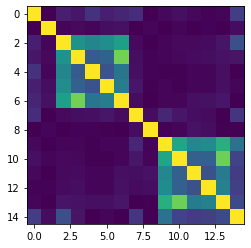

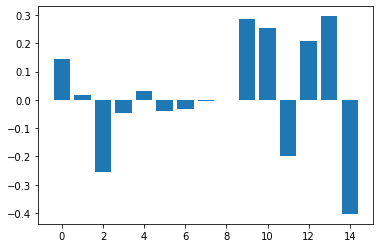

(15,)


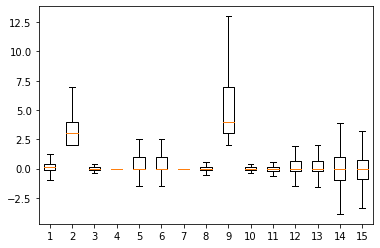

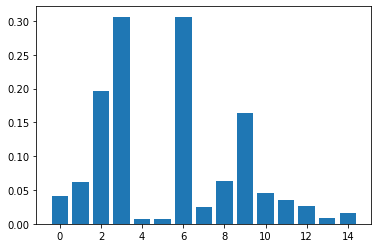

mean:0.140 | std:0.486 | ptp:6.0
mean:3.827 | std:3.103 | ptp:38.0
mean:0.000 | std:0.477 | ptp:8.3
mean:0.002 | std:0.354 | ptp:7.4
mean:0.246 | std:0.692 | ptp:24.0
mean:0.225 | std:0.664 | ptp:16.0
mean:0.000 | std:0.666 | ptp:9.7
mean:-0.011 | std:0.227 | ptp:2.5
mean:5.616 | std:4.653 | ptp:50.0
mean:0.000 | std:0.343 | ptp:6.5
mean:-0.014 | std:0.288 | ptp:4.1
mean:0.185 | std:0.852 | ptp:28.0
mean:0.179 | std:0.823 | ptp:24.0
mean:-0.058 | std:1.340 | ptp:13.2
mean:-0.046 | std:1.291 | ptp:16.3


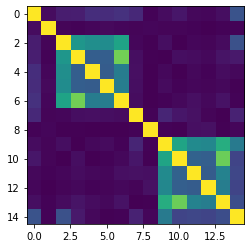

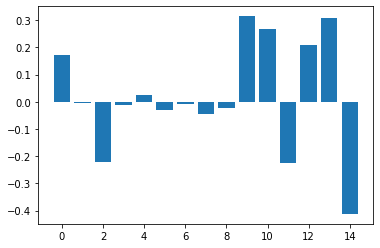

(15,)


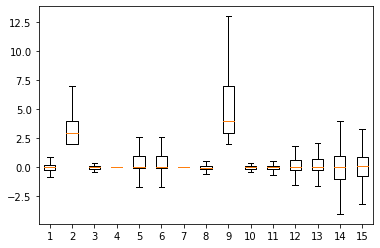

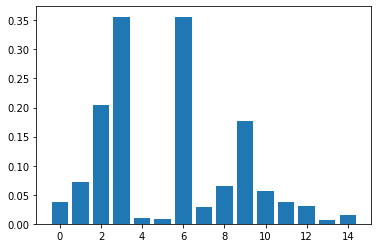

mean:0.020 | std:0.391 | ptp:5.2
mean:3.867 | std:3.113 | ptp:49.0
mean:0.000 | std:0.464 | ptp:10.0
mean:0.007 | std:0.339 | ptp:9.3
mean:0.238 | std:0.716 | ptp:24.0
mean:0.215 | std:0.692 | ptp:23.0
mean:0.008 | std:0.738 | ptp:10.2
mean:-0.007 | std:0.237 | ptp:2.9
mean:5.600 | std:4.822 | ptp:45.0
mean:0.001 | std:0.362 | ptp:6.1
mean:-0.004 | std:0.301 | ptp:4.8
mean:0.173 | std:0.841 | ptp:26.0
mean:0.199 | std:0.883 | ptp:33.0
mean:-0.022 | std:1.351 | ptp:13.1
mean:0.110 | std:1.269 | ptp:16.4


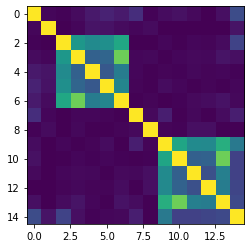

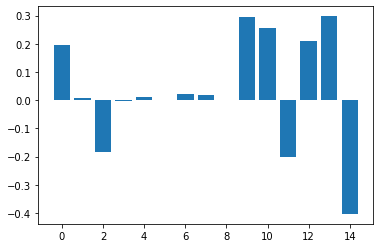

(15,)


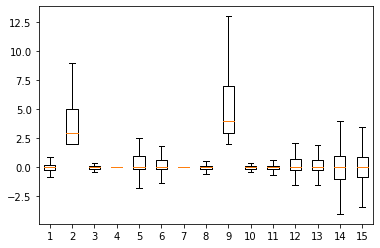

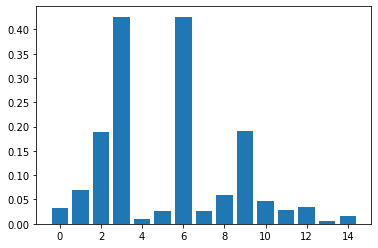

mean:-0.003 | std:0.379 | ptp:5.2
mean:4.347 | std:3.533 | ptp:40.0
mean:-0.004 | std:0.433 | ptp:10.2
mean:-0.005 | std:0.366 | ptp:5.5
mean:0.236 | std:0.703 | ptp:17.0
mean:0.185 | std:0.688 | ptp:21.0
mean:-0.018 | std:0.842 | ptp:10.7
mean:-0.000 | std:0.238 | ptp:3.0
mean:5.493 | std:4.521 | ptp:58.0
mean:-0.002 | std:0.381 | ptp:7.3
mean:-0.004 | std:0.308 | ptp:7.1
mean:0.197 | std:0.835 | ptp:24.0
mean:0.195 | std:0.848 | ptp:33.5
mean:-0.021 | std:1.330 | ptp:14.8
mean:0.051 | std:1.349 | ptp:17.2


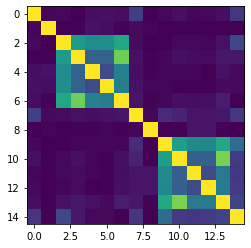

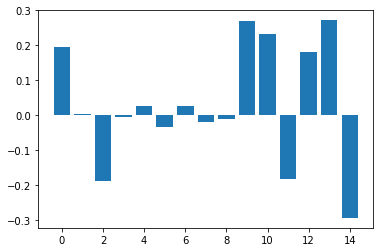

(15,)


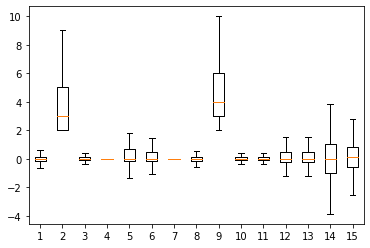

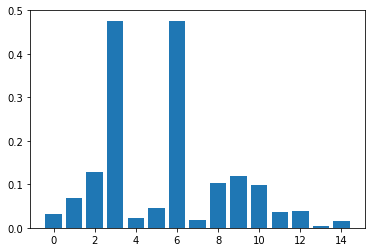

mean:-0.014 | std:0.268 | ptp:3.1
mean:4.509 | std:3.464 | ptp:40.0
mean:-0.001 | std:0.316 | ptp:5.7
mean:0.005 | std:0.284 | ptp:6.3
mean:0.187 | std:0.680 | ptp:19.5
mean:0.167 | std:0.679 | ptp:20.0
mean:0.023 | std:0.888 | ptp:10.5
mean:0.011 | std:0.222 | ptp:3.2
mean:5.485 | std:4.695 | ptp:57.0
mean:-0.002 | std:0.292 | ptp:4.8
mean:-0.003 | std:0.255 | ptp:3.1
mean:0.168 | std:0.754 | ptp:25.5
mean:0.166 | std:0.774 | ptp:31.5
mean:-0.022 | std:1.168 | ptp:13.0
mean:0.113 | std:1.040 | ptp:13.2


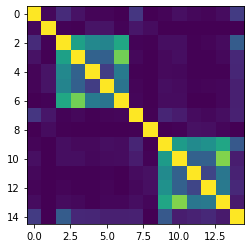

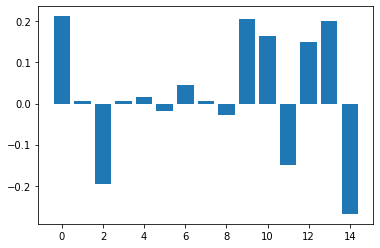

(15,)


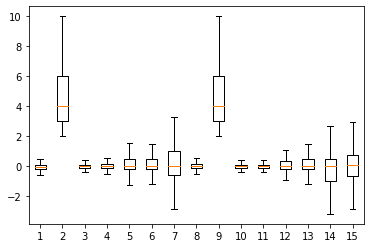

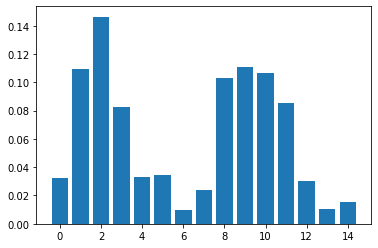

mean:-0.014 | std:0.230 | ptp:2.5
mean:5.492 | std:4.989 | ptp:61.0
mean:0.002 | std:0.335 | ptp:6.7
mean:0.018 | std:0.301 | ptp:5.1
mean:0.164 | std:0.732 | ptp:32.0
mean:0.181 | std:0.768 | ptp:37.5
mean:0.063 | std:1.102 | ptp:11.5
mean:0.015 | std:0.226 | ptp:2.7
mean:5.336 | std:4.488 | ptp:50.0
mean:0.001 | std:0.283 | ptp:4.8
mean:-0.016 | std:0.260 | ptp:3.1
mean:0.148 | std:0.703 | ptp:22.5
mean:0.159 | std:0.677 | ptp:21.0
mean:-0.051 | std:1.057 | ptp:11.3
mean:0.049 | std:1.127 | ptp:12.0


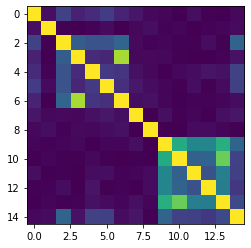

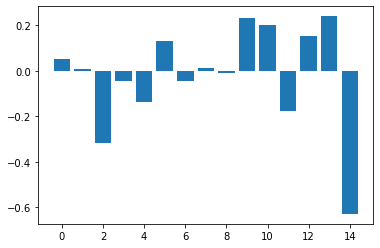

(15,)


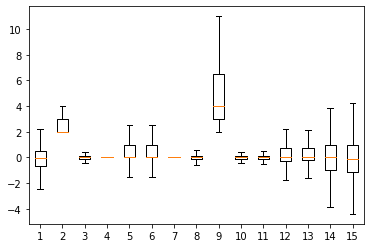

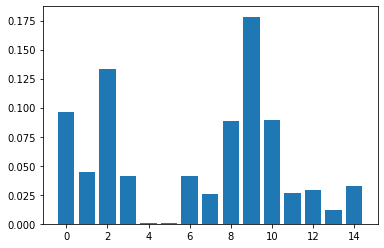

mean:-0.490 | std:3.533 | ptp:108.9
mean:2.540 | std:1.053 | ptp:12.0
mean:0.002 | std:0.832 | ptp:52.3
mean:0.002 | std:0.267 | ptp:8.5
mean:0.295 | std:0.560 | ptp:8.0
mean:0.317 | std:0.551 | ptp:6.0
mean:0.001 | std:0.210 | ptp:4.4
mean:0.002 | std:0.239 | ptp:3.4
mean:5.593 | std:5.136 | ptp:102.0
mean:0.000 | std:0.372 | ptp:6.9
mean:0.007 | std:0.295 | ptp:5.5
mean:0.183 | std:0.893 | ptp:31.2
mean:0.208 | std:0.884 | ptp:39.5
mean:0.026 | std:1.405 | ptp:16.0
mean:-0.102 | std:1.984 | ptp:78.4


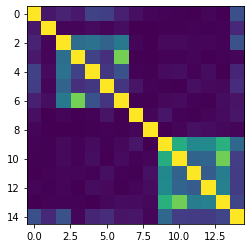

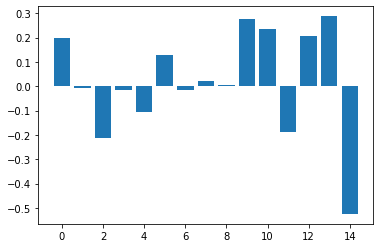

(15,)


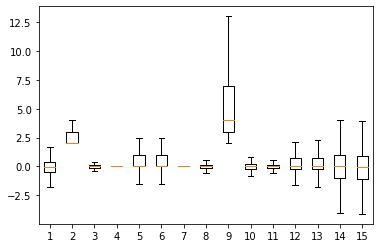

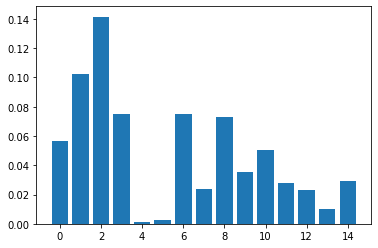

mean:0.013 | std:1.310 | ptp:44.1
mean:2.858 | std:1.367 | ptp:14.0
mean:-0.000 | std:0.621 | ptp:18.5
mean:0.018 | std:0.324 | ptp:13.4
mean:0.325 | std:0.609 | ptp:8.5
mean:0.282 | std:0.569 | ptp:12.5
mean:0.021 | std:0.311 | ptp:6.4
mean:0.022 | std:0.226 | ptp:2.9
mean:5.904 | std:4.955 | ptp:71.0
mean:-0.000 | std:0.368 | ptp:6.5
mean:-0.008 | std:0.288 | ptp:4.4
mean:0.205 | std:0.876 | ptp:28.0
mean:0.178 | std:0.860 | ptp:28.0
mean:-0.038 | std:1.438 | ptp:13.9
mean:-0.126 | std:1.752 | ptp:32.1


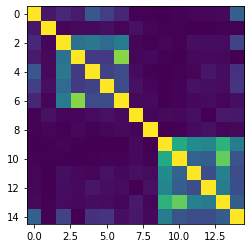

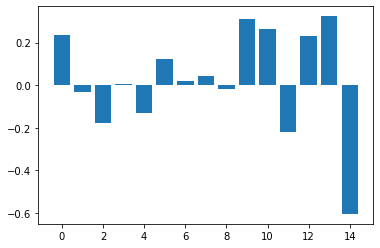

(15,)


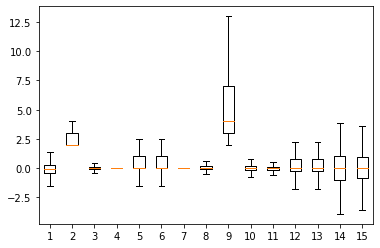

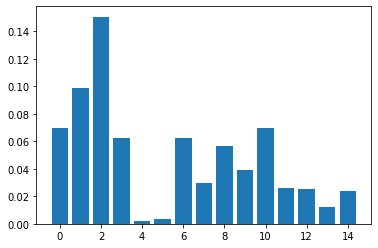

mean:-0.043 | std:0.838 | ptp:14.4
mean:2.826 | std:1.415 | ptp:17.0
mean:-0.004 | std:0.574 | ptp:16.3
mean:0.002 | std:0.282 | ptp:9.3
mean:0.387 | std:0.619 | ptp:8.0
mean:0.272 | std:0.577 | ptp:10.2
mean:0.001 | std:0.293 | ptp:6.8
mean:0.037 | std:0.232 | ptp:3.1
mean:5.496 | std:4.680 | ptp:77.0
mean:-0.001 | std:0.373 | ptp:5.9
mean:-0.005 | std:0.293 | ptp:4.7
mean:0.212 | std:0.850 | ptp:18.5
mean:0.202 | std:0.893 | ptp:33.5
mean:-0.014 | std:1.401 | ptp:14.7
mean:0.003 | std:1.502 | ptp:22.7


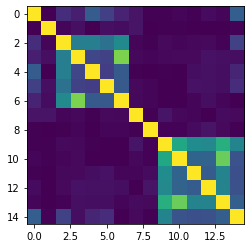

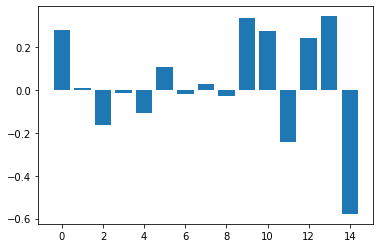

(15,)


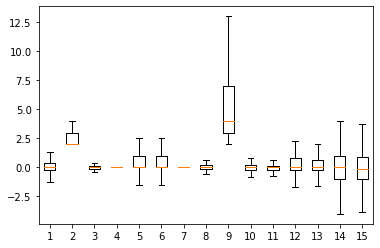

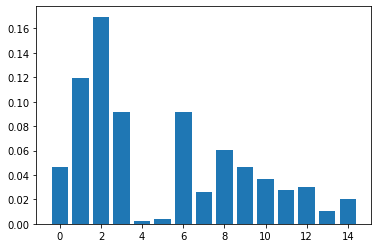

mean:0.091 | std:0.618 | ptp:10.4
mean:2.970 | std:1.572 | ptp:19.0
mean:-0.007 | std:0.561 | ptp:12.0
mean:0.002 | std:0.324 | ptp:13.8
mean:0.353 | std:0.623 | ptp:14.5
mean:0.264 | std:0.600 | ptp:9.5
mean:-0.002 | std:0.366 | ptp:8.1
mean:0.022 | std:0.256 | ptp:3.2
mean:5.644 | std:4.889 | ptp:79.0
mean:-0.006 | std:0.393 | ptp:6.2
mean:-0.010 | std:0.311 | ptp:4.0
mean:0.214 | std:0.864 | ptp:21.0
mean:0.177 | std:0.874 | ptp:23.5
mean:-0.058 | std:1.411 | ptp:13.1
mean:-0.067 | std:1.539 | ptp:20.8


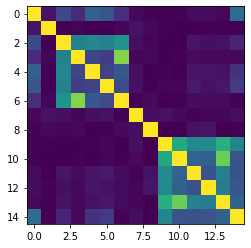

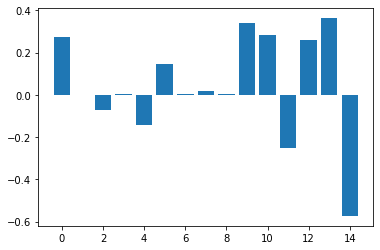

(15,)


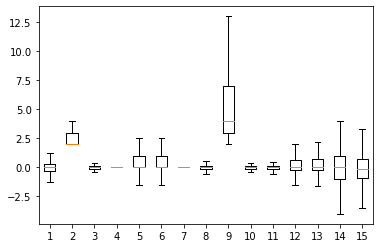

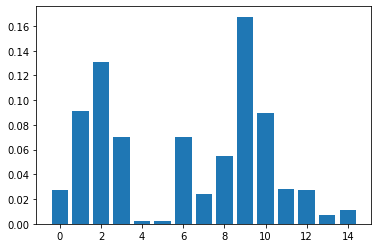

mean:0.025 | std:0.544 | ptp:8.4
mean:2.830 | std:1.430 | ptp:17.0
mean:0.001 | std:0.436 | ptp:9.3
mean:0.019 | std:0.296 | ptp:6.8
mean:0.308 | std:0.588 | ptp:9.0
mean:0.300 | std:0.586 | ptp:9.7
mean:0.017 | std:0.298 | ptp:6.5
mean:0.005 | std:0.238 | ptp:3.8
mean:5.385 | std:4.241 | ptp:51.0
mean:0.002 | std:0.342 | ptp:5.0
mean:-0.007 | std:0.286 | ptp:4.6
mean:0.193 | std:0.842 | ptp:23.5
mean:0.205 | std:0.842 | ptp:20.5
mean:-0.011 | std:1.349 | ptp:11.1
mean:-0.086 | std:1.311 | ptp:13.8


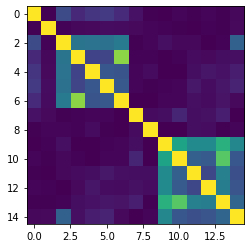

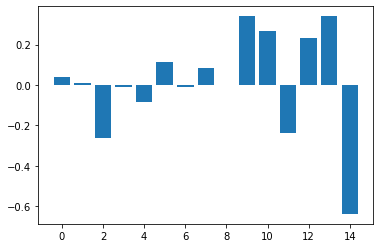

(15,)


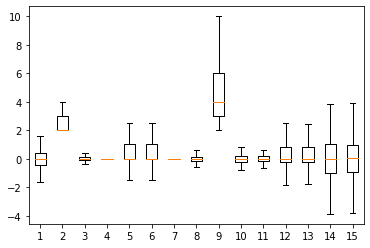

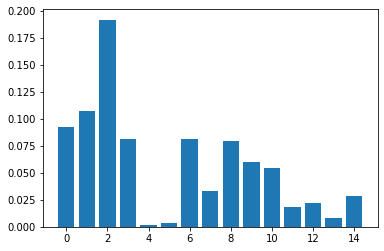

mean:-0.067 | std:2.011 | ptp:69.6
mean:2.905 | std:1.375 | ptp:17.0
mean:-0.007 | std:0.772 | ptp:20.2
mean:0.001 | std:0.355 | ptp:14.1
mean:0.360 | std:0.620 | ptp:11.5
mean:0.287 | std:0.593 | ptp:8.0
mean:-0.000 | std:0.320 | ptp:6.8
mean:0.002 | std:0.274 | ptp:8.1
mean:5.086 | std:4.347 | ptp:54.0
mean:-0.002 | std:0.431 | ptp:9.3
mean:-0.003 | std:0.355 | ptp:18.1
mean:0.226 | std:0.836 | ptp:17.7
mean:0.215 | std:0.843 | ptp:20.0
mean:-0.012 | std:1.342 | ptp:18.6
mean:0.019 | std:1.712 | ptp:34.6


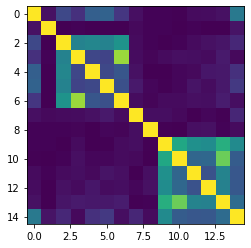

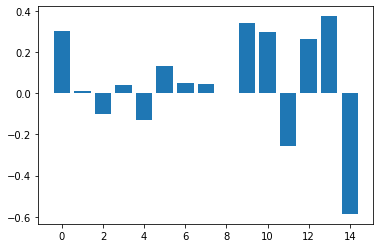

(15,)


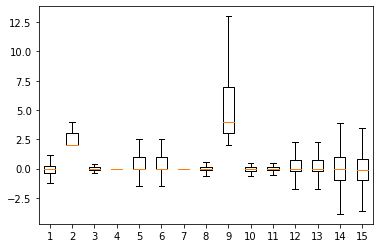

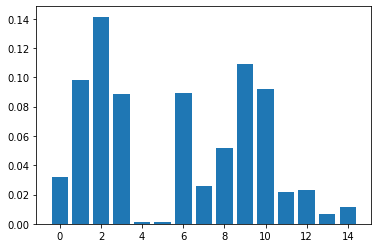

mean:-0.049 | std:0.521 | ptp:7.8
mean:2.933 | std:1.482 | ptp:21.0
mean:-0.001 | std:0.461 | ptp:10.9
mean:0.005 | std:0.274 | ptp:8.4
mean:0.319 | std:0.603 | ptp:6.7
mean:0.263 | std:0.566 | ptp:7.0
mean:0.007 | std:0.328 | ptp:6.3
mean:-0.010 | std:0.252 | ptp:3.3
mean:5.417 | std:4.319 | ptp:58.0
mean:-0.003 | std:0.367 | ptp:5.3
mean:-0.004 | std:0.290 | ptp:4.4
mean:0.199 | std:0.811 | ptp:15.8
mean:0.199 | std:0.814 | ptp:18.0
mean:-0.020 | std:1.322 | ptp:12.9
mean:-0.104 | std:1.341 | ptp:15.8


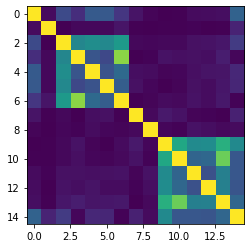

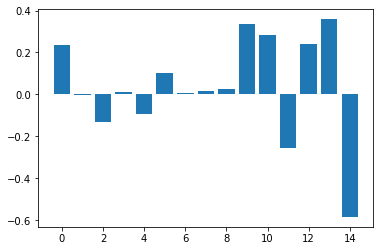

(15,)


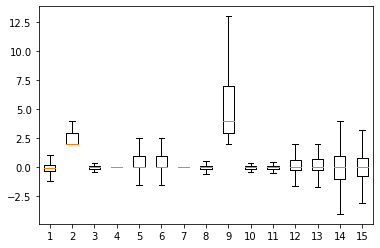

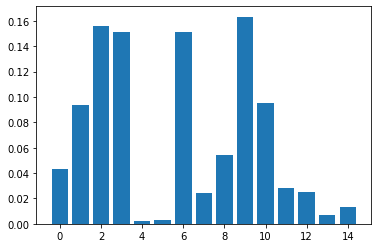

mean:-0.037 | std:0.525 | ptp:7.3
mean:2.892 | std:1.588 | ptp:43.0
mean:0.004 | std:0.460 | ptp:13.1
mean:0.018 | std:0.331 | ptp:10.0
mean:0.274 | std:0.605 | ptp:14.5
mean:0.258 | std:0.587 | ptp:12.5
mean:0.025 | std:0.430 | ptp:7.3
mean:-0.002 | std:0.230 | ptp:2.3
mean:5.507 | std:4.319 | ptp:69.0
mean:0.004 | std:0.335 | ptp:5.0
mean:-0.001 | std:0.269 | ptp:4.4
mean:0.180 | std:0.840 | ptp:25.5
mean:0.198 | std:0.826 | ptp:20.0
mean:0.016 | std:1.361 | ptp:12.1
mean:0.034 | std:1.215 | ptp:22.7


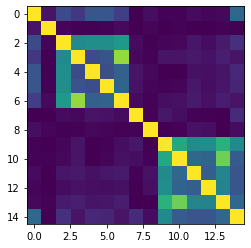

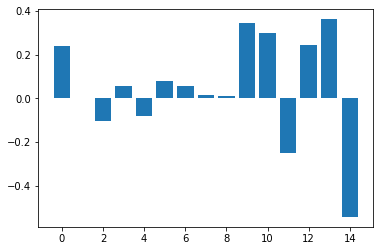

(15,)


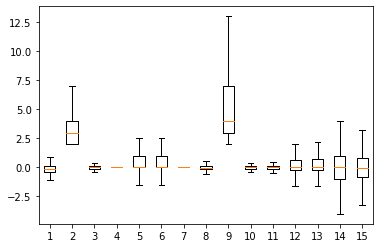

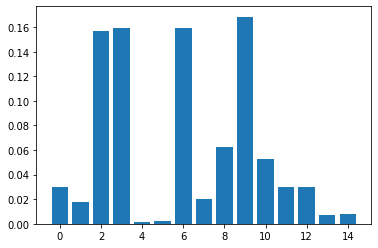

mean:-0.115 | std:0.432 | ptp:5.8
mean:3.061 | std:1.666 | ptp:25.0
mean:0.004 | std:0.427 | ptp:8.4
mean:0.003 | std:0.307 | ptp:6.2
mean:0.277 | std:0.619 | ptp:9.7
mean:0.236 | std:0.587 | ptp:13.7
mean:0.008 | std:0.445 | ptp:8.4
mean:-0.016 | std:0.226 | ptp:2.9
mean:5.820 | std:4.782 | ptp:48.0
mean:0.004 | std:0.339 | ptp:4.5
mean:-0.003 | std:0.269 | ptp:3.5
mean:0.168 | std:0.862 | ptp:28.0
mean:0.209 | std:0.870 | ptp:29.2
mean:0.001 | std:1.393 | ptp:14.7
mean:-0.032 | std:1.202 | ptp:15.0


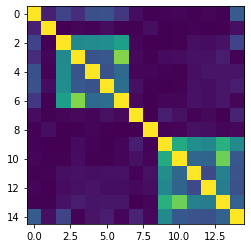

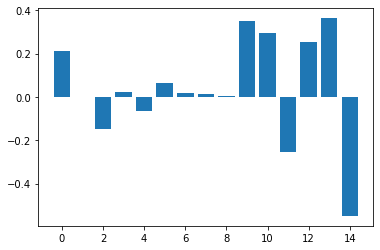

(15,)


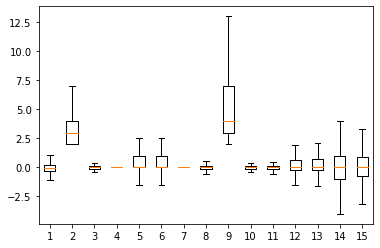

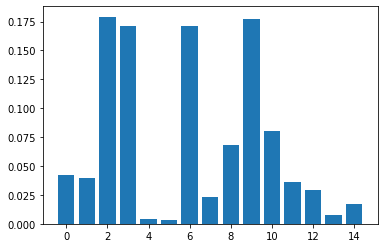

mean:-0.032 | std:0.520 | ptp:8.3
mean:3.354 | std:2.499 | ptp:26.0
mean:0.001 | std:0.488 | ptp:12.0
mean:0.011 | std:0.328 | ptp:7.3
mean:0.298 | std:0.663 | ptp:17.0
mean:0.240 | std:0.603 | ptp:11.5
mean:0.013 | std:0.482 | ptp:8.6
mean:0.017 | std:0.231 | ptp:2.5
mean:5.875 | std:5.025 | ptp:67.0
mean:0.001 | std:0.356 | ptp:5.8
mean:-0.004 | std:0.280 | ptp:4.5
mean:0.186 | std:0.825 | ptp:20.5
mean:0.193 | std:0.860 | ptp:30.5
mean:-0.017 | std:1.385 | ptp:14.8
mean:0.068 | std:1.266 | ptp:17.3


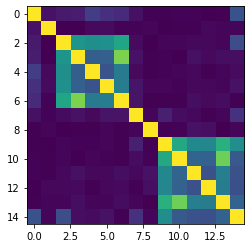

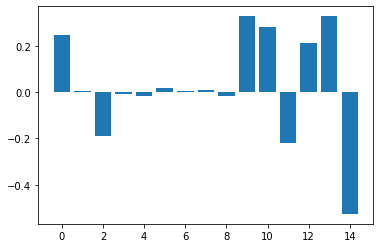

(15,)


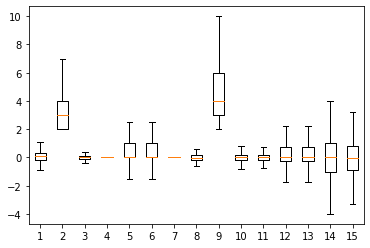

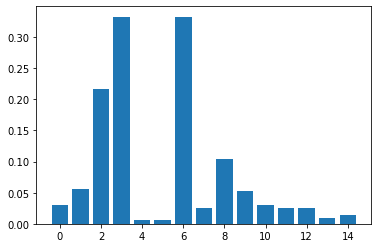

mean:0.091 | std:0.426 | ptp:5.1
mean:3.510 | std:2.596 | ptp:30.0
mean:0.001 | std:0.509 | ptp:9.9
mean:0.013 | std:0.412 | ptp:7.3
mean:0.245 | std:0.664 | ptp:19.5
mean:0.215 | std:0.641 | ptp:16.3
mean:0.015 | std:0.686 | ptp:9.5
mean:-0.016 | std:0.252 | ptp:3.0
mean:5.497 | std:4.732 | ptp:63.0
mean:0.000 | std:0.401 | ptp:6.0
mean:-0.004 | std:0.323 | ptp:4.6
mean:0.201 | std:0.865 | ptp:25.3
mean:0.195 | std:0.870 | ptp:27.8
mean:-0.023 | std:1.401 | ptp:16.7
mean:-0.029 | std:1.277 | ptp:17.1


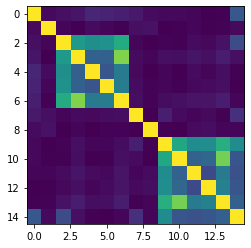

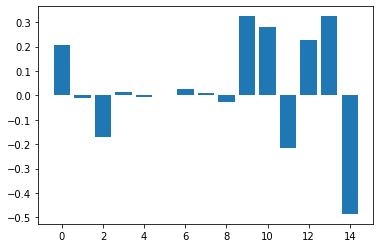

(15,)


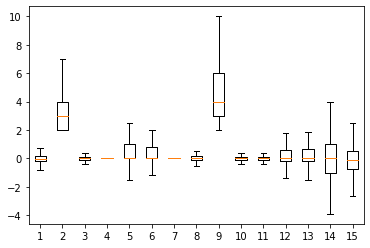

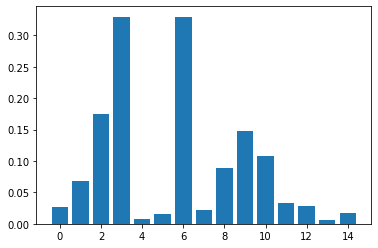

mean:-0.016 | std:0.325 | ptp:3.7
mean:3.653 | std:2.607 | ptp:27.0
mean:-0.002 | std:0.393 | ptp:6.9
mean:0.004 | std:0.319 | ptp:5.4
mean:0.236 | std:0.670 | ptp:16.5
mean:0.204 | std:0.669 | ptp:19.0
mean:0.012 | std:0.720 | ptp:8.5
mean:0.002 | std:0.218 | ptp:3.0
mean:5.312 | std:4.476 | ptp:54.0
mean:-0.001 | std:0.323 | ptp:6.0
mean:-0.005 | std:0.267 | ptp:3.8
mean:0.173 | std:0.798 | ptp:41.5
mean:0.177 | std:0.780 | ptp:21.2
mean:-0.029 | std:1.244 | ptp:15.3
mean:-0.092 | std:1.011 | ptp:11.3


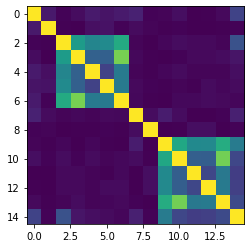

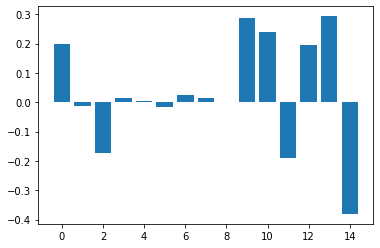

(15,)


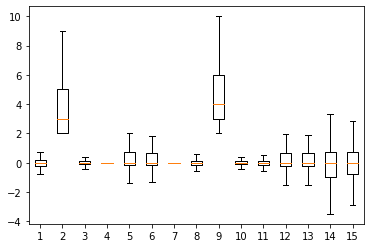

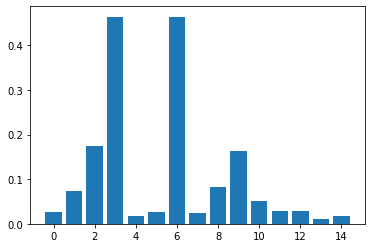

mean:-0.027 | std:0.326 | ptp:4.6
mean:4.453 | std:3.965 | ptp:48.0
mean:-0.002 | std:0.396 | ptp:8.3
mean:0.012 | std:0.348 | ptp:5.6
mean:0.213 | std:0.739 | ptp:29.2
mean:0.203 | std:0.709 | ptp:20.5
mean:0.021 | std:0.875 | ptp:10.9
mean:0.010 | std:0.228 | ptp:2.7
mean:5.110 | std:4.368 | ptp:85.0
mean:-0.002 | std:0.348 | ptp:9.1
mean:-0.020 | std:0.292 | ptp:6.0
mean:0.189 | std:0.788 | ptp:25.0
mean:0.195 | std:0.798 | ptp:25.5
mean:-0.069 | std:1.218 | ptp:15.5
mean:-0.025 | std:1.145 | ptp:22.3


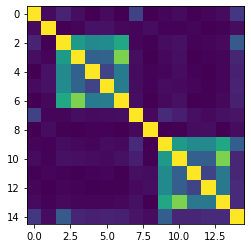

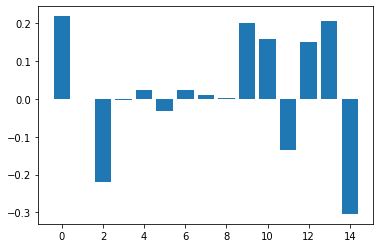

(15,)


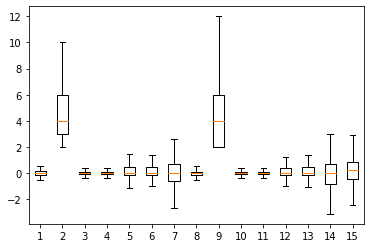

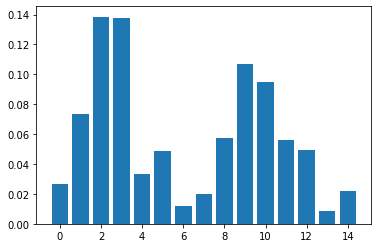

mean:0.014 | std:0.238 | ptp:3.1
mean:4.950 | std:3.915 | ptp:66.0
mean:-0.000 | std:0.325 | ptp:10.1
mean:0.001 | std:0.290 | ptp:4.5
mean:0.181 | std:0.713 | ptp:24.2
mean:0.159 | std:0.686 | ptp:21.5
mean:0.010 | std:1.031 | ptp:16.3
mean:-0.010 | std:0.213 | ptp:2.4
mean:5.048 | std:4.108 | ptp:67.0
mean:0.000 | std:0.278 | ptp:5.2
mean:0.001 | std:0.251 | ptp:3.6
mean:0.156 | std:0.735 | ptp:40.0
mean:0.163 | std:0.728 | ptp:30.0
mean:-0.005 | std:1.048 | ptp:11.4
mean:0.199 | std:1.104 | ptp:14.7


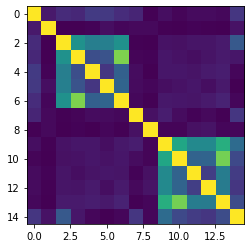

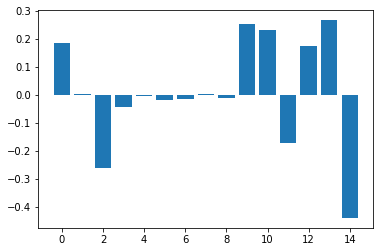

(15,)


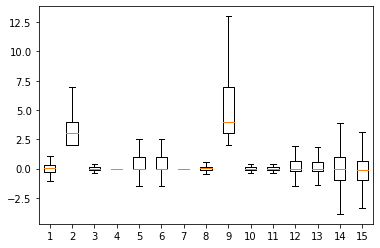

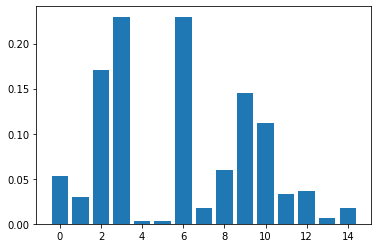

mean:0.014 | std:0.520 | ptp:7.9
mean:3.222 | std:2.031 | ptp:23.0
mean:-0.000 | std:0.478 | ptp:20.3
mean:-0.005 | std:0.283 | ptp:9.3
mean:0.220 | std:0.642 | ptp:18.0
mean:0.213 | std:0.648 | ptp:18.0
mean:-0.012 | std:0.535 | ptp:7.6
mean:0.019 | std:0.209 | ptp:2.7
mean:5.612 | std:4.685 | ptp:52.0
mean:0.001 | std:0.322 | ptp:4.7
mean:0.003 | std:0.270 | ptp:3.5
mean:0.186 | std:0.796 | ptp:19.0
mean:0.176 | std:0.790 | ptp:19.5
mean:0.008 | std:1.273 | ptp:17.0
mean:-0.133 | std:1.300 | ptp:30.2


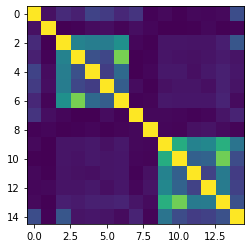

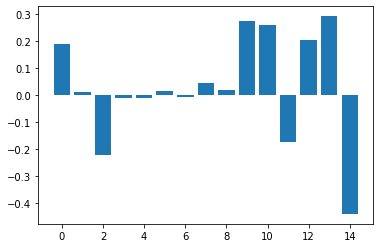

(15,)


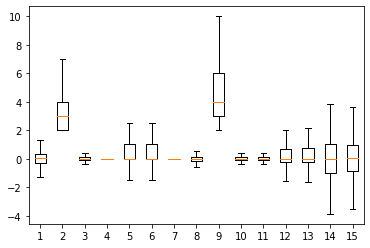

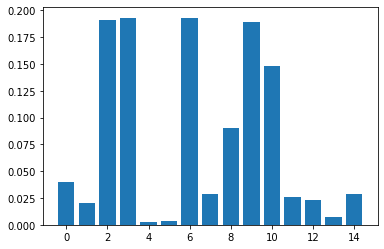

mean:0.032 | std:0.593 | ptp:7.9
mean:3.066 | std:1.627 | ptp:21.0
mean:0.003 | std:0.550 | ptp:11.1
mean:0.016 | std:0.352 | ptp:9.6
mean:0.254 | std:0.637 | ptp:14.5
mean:0.278 | std:0.654 | ptp:17.5
mean:0.022 | std:0.487 | ptp:7.8
mean:0.009 | std:0.239 | ptp:3.5
mean:5.236 | std:4.526 | ptp:52.0
mean:0.003 | std:0.387 | ptp:7.4
mean:0.003 | std:0.308 | ptp:4.9
mean:0.196 | std:0.850 | ptp:29.5
mean:0.221 | std:0.818 | ptp:19.5
mean:0.018 | std:1.284 | ptp:13.6
mean:0.058 | std:1.512 | ptp:21.0


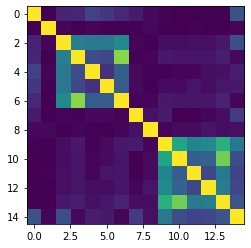

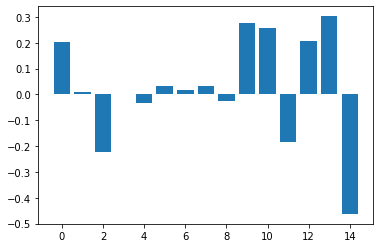

(15,)


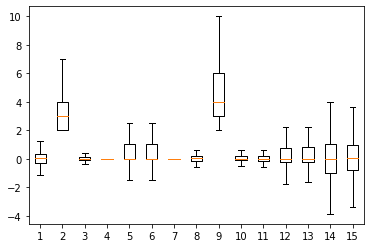

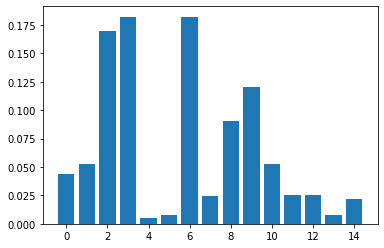

mean:0.037 | std:0.562 | ptp:7.1
mean:3.353 | std:2.395 | ptp:22.0
mean:-0.002 | std:0.503 | ptp:12.9
mean:0.005 | std:0.337 | ptp:6.8
mean:0.267 | std:0.650 | ptp:14.0
mean:0.232 | std:0.659 | ptp:15.5
mean:0.005 | std:0.480 | ptp:6.9
mean:0.016 | std:0.236 | ptp:3.9
mean:5.236 | std:4.440 | ptp:55.0
mean:0.004 | std:0.382 | ptp:4.5
mean:0.005 | std:0.315 | ptp:6.7
mean:0.203 | std:0.895 | ptp:25.5
mean:0.220 | std:0.842 | ptp:19.0
mean:0.011 | std:1.324 | ptp:13.9
mean:0.086 | std:1.436 | ptp:23.8


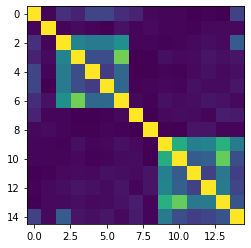

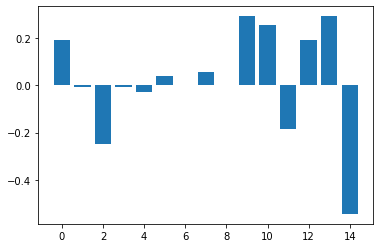

(15,)


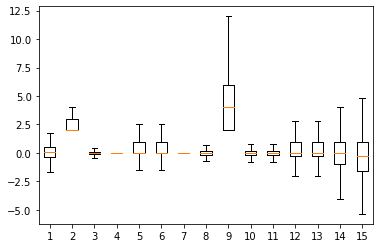

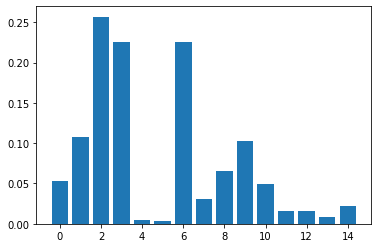

mean:0.076 | std:0.850 | ptp:13.5
mean:3.001 | std:1.826 | ptp:32.0
mean:-0.004 | std:0.763 | ptp:20.7
mean:-0.009 | std:0.499 | ptp:13.1
mean:0.281 | std:0.673 | ptp:16.0
mean:0.260 | std:0.658 | ptp:14.0
mean:-0.006 | std:0.527 | ptp:8.2
mean:0.009 | std:0.298 | ptp:5.3
mean:5.351 | std:4.870 | ptp:70.0
mean:-0.004 | std:0.524 | ptp:11.6
mean:0.001 | std:0.408 | ptp:6.5
mean:0.253 | std:0.940 | ptp:41.0
mean:0.237 | std:0.896 | ptp:28.0
mean:-0.017 | std:1.426 | ptp:13.8
mean:-0.277 | std:2.101 | ptp:42.7


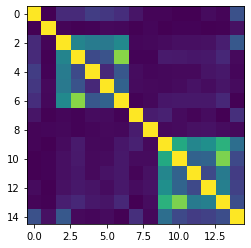

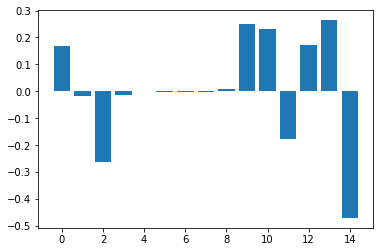

(15,)


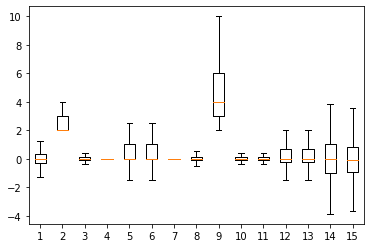

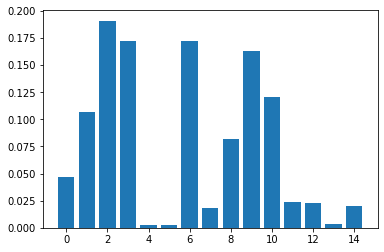

mean:-0.000 | std:0.596 | ptp:7.3
mean:2.936 | std:1.743 | ptp:20.0
mean:-0.004 | std:0.504 | ptp:8.1
mean:-0.008 | std:0.306 | ptp:5.9
mean:0.244 | std:0.614 | ptp:13.8
mean:0.239 | std:0.625 | ptp:17.0
mean:-0.015 | std:0.456 | ptp:8.1
mean:0.017 | std:0.208 | ptp:2.5
mean:5.055 | std:4.192 | ptp:54.0
mean:-0.002 | std:0.338 | ptp:4.6
mean:-0.003 | std:0.274 | ptp:2.9
mean:0.200 | std:0.861 | ptp:27.2
mean:0.185 | std:0.794 | ptp:22.0
mean:-0.011 | std:1.238 | ptp:12.3
mean:-0.060 | std:1.455 | ptp:18.3


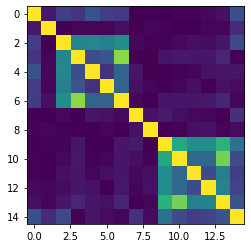

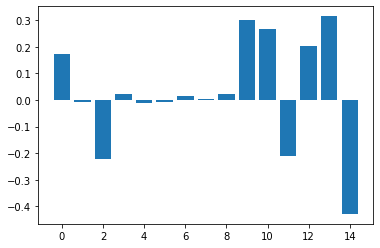

(15,)


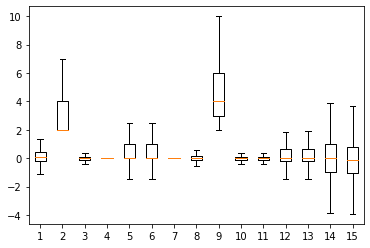

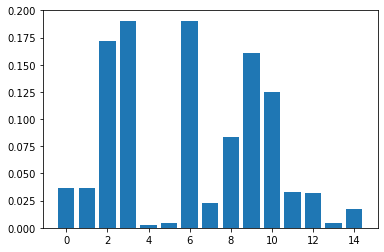

mean:0.137 | std:0.542 | ptp:8.7
mean:3.202 | std:2.232 | ptp:24.0
mean:-0.001 | std:0.461 | ptp:8.4
mean:-0.021 | std:0.316 | ptp:5.5
mean:0.239 | std:0.625 | ptp:15.0
mean:0.239 | std:0.654 | ptp:13.5
mean:-0.021 | std:0.496 | ptp:7.2
mean:0.001 | std:0.227 | ptp:2.6
mean:5.177 | std:4.104 | ptp:48.0
mean:-0.000 | std:0.339 | ptp:5.1
mean:0.001 | std:0.278 | ptp:3.7
mean:0.180 | std:0.774 | ptp:27.5
mean:0.188 | std:0.779 | ptp:19.8
mean:0.001 | std:1.227 | ptp:13.1
mean:-0.142 | std:1.507 | ptp:19.7


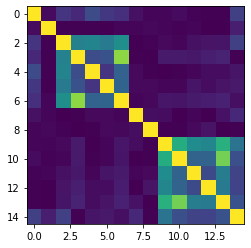

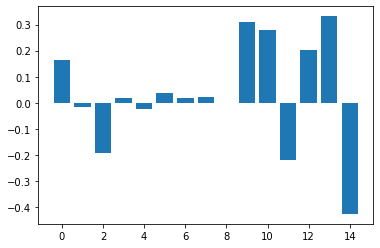

(15,)


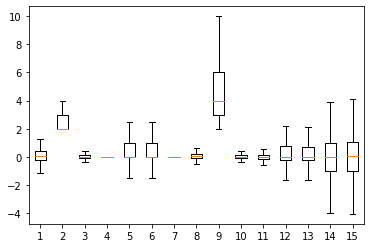

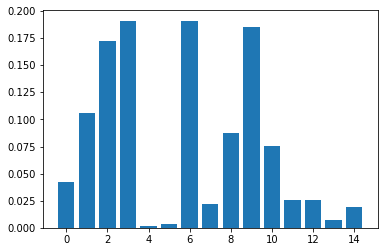

mean:0.109 | std:0.557 | ptp:8.2
mean:3.039 | std:1.815 | ptp:20.0
mean:-0.005 | std:0.488 | ptp:11.6
mean:-0.012 | std:0.326 | ptp:7.8
mean:0.254 | std:0.627 | ptp:16.0
mean:0.241 | std:0.637 | ptp:13.0
mean:-0.012 | std:0.489 | ptp:7.2
mean:0.032 | std:0.232 | ptp:3.9
mean:5.155 | std:4.249 | ptp:58.0
mean:-0.003 | std:0.375 | ptp:7.1
mean:-0.003 | std:0.303 | ptp:5.4
mean:0.206 | std:0.848 | ptp:20.7
mean:0.201 | std:0.865 | ptp:27.5
mean:-0.011 | std:1.313 | ptp:13.7
mean:0.016 | std:1.664 | ptp:23.7


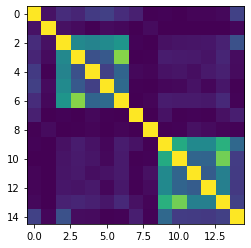

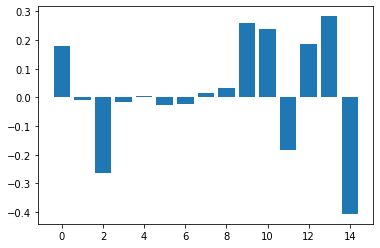

(15,)


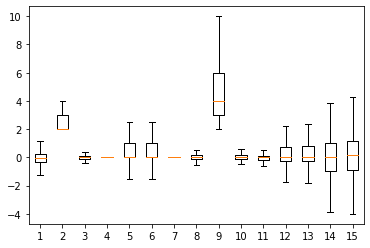

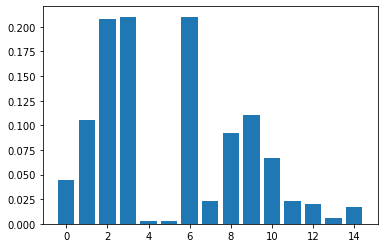

mean:-0.050 | std:0.562 | ptp:7.5
mean:3.023 | std:1.656 | ptp:21.0
mean:0.005 | std:0.525 | ptp:11.9
mean:-0.004 | std:0.331 | ptp:9.2
mean:0.224 | std:0.623 | ptp:12.0
mean:0.255 | std:0.649 | ptp:13.5
mean:-0.003 | std:0.511 | ptp:7.3
mean:0.009 | std:0.215 | ptp:2.4
mean:5.277 | std:4.477 | ptp:59.0
mean:0.003 | std:0.369 | ptp:4.7
mean:-0.006 | std:0.290 | ptp:3.4
mean:0.208 | std:0.858 | ptp:31.0
mean:0.215 | std:0.857 | ptp:46.0
mean:-0.019 | std:1.319 | ptp:14.4
mean:0.152 | std:1.653 | ptp:27.5


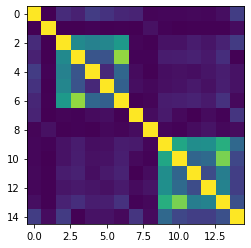

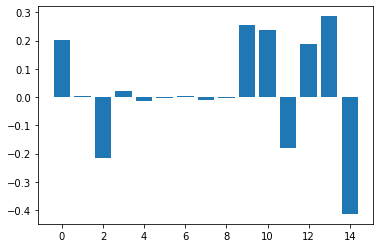

(15,)


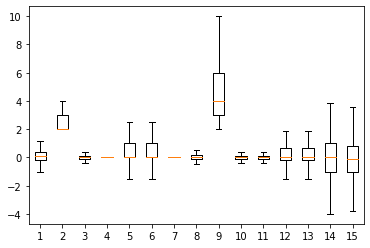

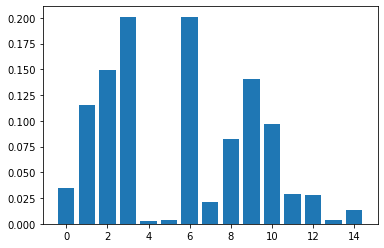

mean:0.086 | std:0.476 | ptp:5.7
mean:2.990 | std:1.571 | ptp:18.0
mean:0.000 | std:0.397 | ptp:7.6
mean:0.009 | std:0.295 | ptp:6.2
mean:0.224 | std:0.610 | ptp:13.7
mean:0.233 | std:0.619 | ptp:9.5
mean:0.011 | std:0.501 | ptp:6.8
mean:0.032 | std:0.201 | ptp:2.1
mean:5.085 | std:3.922 | ptp:52.0
mean:0.003 | std:0.312 | ptp:5.7
mean:0.004 | std:0.253 | ptp:3.2
mean:0.181 | std:0.792 | ptp:28.0
mean:0.187 | std:0.762 | ptp:27.5
mean:0.011 | std:1.205 | ptp:11.8
mean:-0.120 | std:1.439 | ptp:14.6


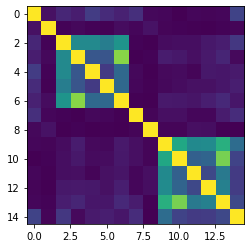

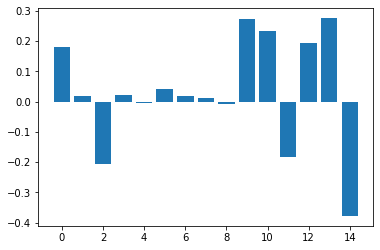

(15,)


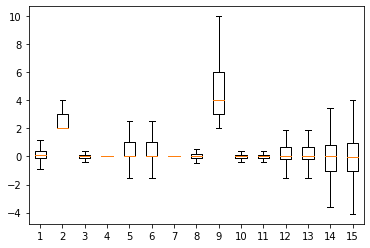

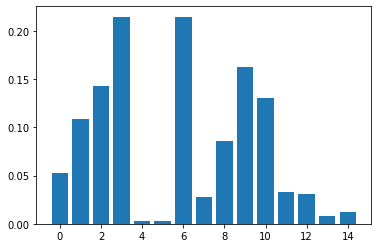

mean:0.145 | std:0.523 | ptp:6.4
mean:2.982 | std:1.675 | ptp:27.0
mean:-0.002 | std:0.418 | ptp:7.9
mean:-0.002 | std:0.314 | ptp:5.2
mean:0.221 | std:0.607 | ptp:13.0
mean:0.200 | std:0.606 | ptp:12.8
mean:-0.006 | std:0.526 | ptp:8.0
mean:0.023 | std:0.215 | ptp:2.8
mean:5.148 | std:4.117 | ptp:63.0
mean:0.001 | std:0.355 | ptp:6.2
mean:-0.005 | std:0.288 | ptp:4.5
mean:0.200 | std:0.819 | ptp:21.8
mean:0.184 | std:0.790 | ptp:21.5
mean:-0.028 | std:1.211 | ptp:12.5
mean:-0.020 | std:1.569 | ptp:18.9


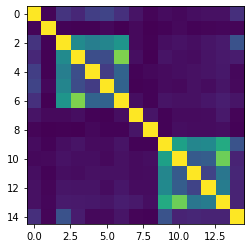

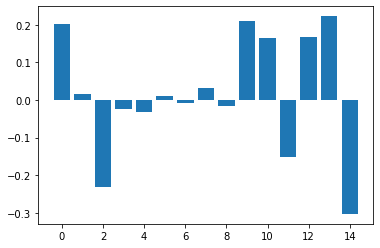

(15,)


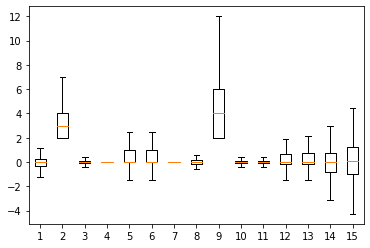

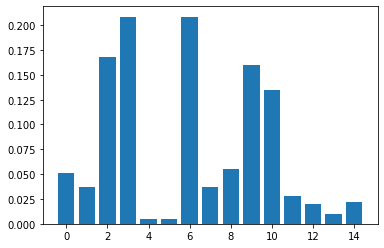

mean:-0.032 | std:0.573 | ptp:9.0
mean:3.160 | std:1.900 | ptp:32.0
mean:0.007 | std:0.473 | ptp:12.3
mean:0.013 | std:0.325 | ptp:8.6
mean:0.227 | std:0.639 | ptp:10.5
mean:0.239 | std:0.638 | ptp:11.5
mean:0.007 | std:0.518 | ptp:7.9
mean:0.022 | std:0.254 | ptp:4.7
mean:4.968 | std:4.245 | ptp:54.0
mean:0.005 | std:0.352 | ptp:6.6
mean:-0.006 | std:0.295 | ptp:5.0
mean:0.196 | std:0.786 | ptp:22.5
mean:0.195 | std:0.756 | ptp:17.8
mean:-0.005 | std:1.087 | ptp:10.8
mean:0.116 | std:1.781 | ptp:26.3


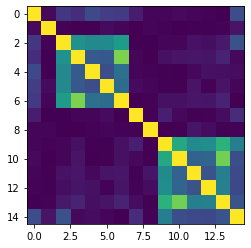

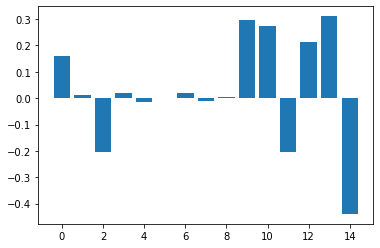

(15,)


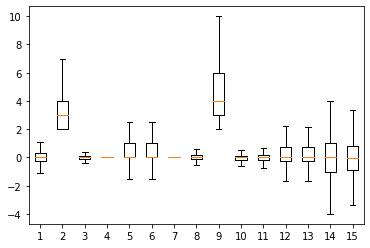

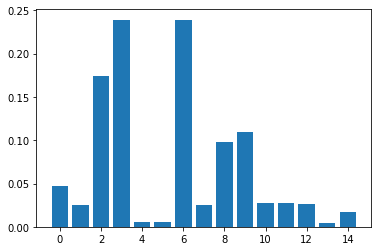

mean:0.027 | std:0.525 | ptp:7.5
mean:3.221 | std:1.809 | ptp:23.0
mean:-0.000 | std:0.474 | ptp:11.2
mean:0.004 | std:0.302 | ptp:7.1
mean:0.229 | std:0.644 | ptp:14.0
mean:0.249 | std:0.664 | ptp:13.0
mean:0.015 | std:0.576 | ptp:7.3
mean:0.019 | std:0.227 | ptp:2.9
mean:5.385 | std:4.340 | ptp:65.0
mean:-0.001 | std:0.373 | ptp:5.9
mean:-0.005 | std:0.302 | ptp:4.6
mean:0.217 | std:0.850 | ptp:21.0
mean:0.182 | std:0.837 | ptp:19.5
mean:-0.015 | std:1.337 | ptp:12.9
mean:-0.029 | std:1.346 | ptp:22.3


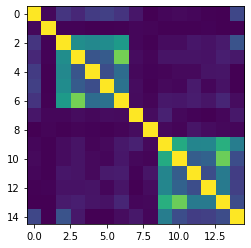

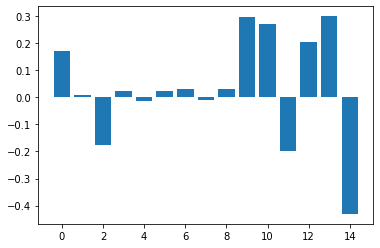

(15,)


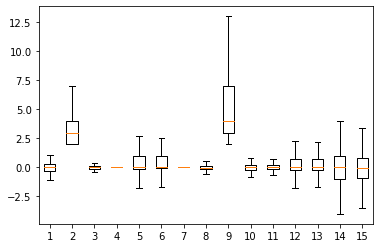

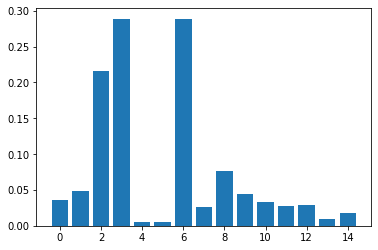

mean:0.002 | std:0.486 | ptp:7.0
mean:3.640 | std:2.990 | ptp:62.0
mean:0.006 | std:0.500 | ptp:9.1
mean:0.007 | std:0.339 | ptp:7.0
mean:0.243 | std:0.721 | ptp:22.8
mean:0.249 | std:0.708 | ptp:21.5
mean:0.005 | std:0.646 | ptp:8.9
mean:-0.011 | std:0.239 | ptp:2.7
mean:6.099 | std:5.850 | ptp:108.0
mean:0.005 | std:0.388 | ptp:5.2
mean:0.006 | std:0.312 | ptp:5.3
mean:0.196 | std:0.903 | ptp:30.9
mean:0.210 | std:0.906 | ptp:40.5
mean:0.035 | std:1.452 | ptp:15.8
mean:-0.036 | std:1.378 | ptp:16.4


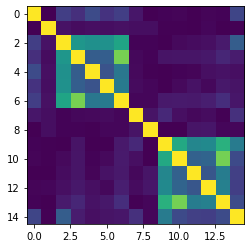

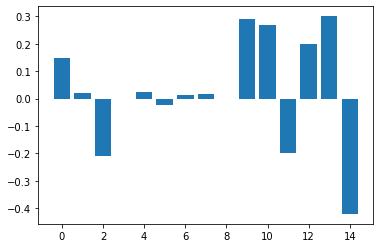

(15,)


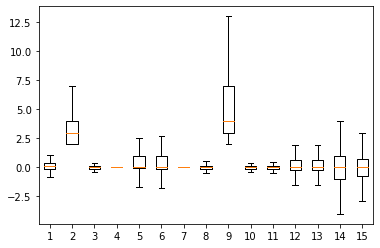

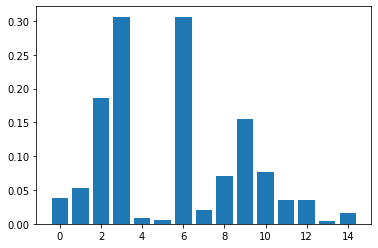

mean:0.104 | std:0.433 | ptp:5.2
mean:3.587 | std:2.492 | ptp:35.0
mean:-0.001 | std:0.438 | ptp:8.0
mean:-0.008 | std:0.298 | ptp:7.8
mean:0.213 | std:0.684 | ptp:15.0
mean:0.238 | std:0.684 | ptp:17.3
mean:-0.013 | std:0.675 | ptp:8.1
mean:0.024 | std:0.208 | ptp:2.1
mean:5.921 | std:5.090 | ptp:89.0
mean:0.002 | std:0.328 | ptp:6.9
mean:-0.002 | std:0.271 | ptp:3.3
mean:0.195 | std:0.862 | ptp:36.5
mean:0.181 | std:0.843 | ptp:32.0
mean:-0.024 | std:1.330 | ptp:16.1
mean:0.003 | std:1.137 | ptp:13.7


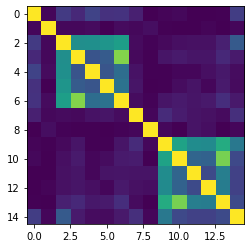

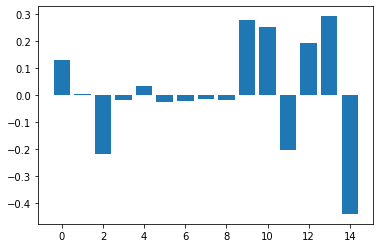

(15,)


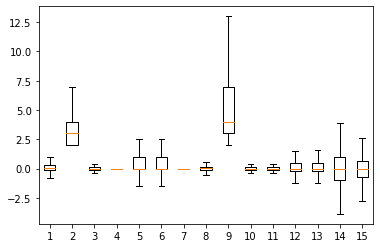

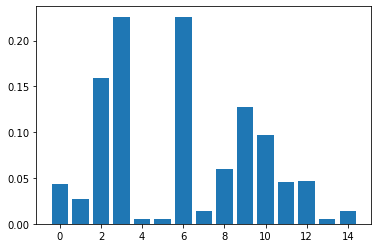

mean:0.066 | std:0.420 | ptp:5.5
mean:3.196 | std:1.809 | ptp:22.0
mean:0.001 | std:0.399 | ptp:7.2
mean:-0.009 | std:0.264 | ptp:5.3
mean:0.217 | std:0.666 | ptp:18.0
mean:0.203 | std:0.650 | ptp:15.5
mean:-0.014 | std:0.562 | ptp:8.5
mean:0.010 | std:0.208 | ptp:2.1
mean:5.675 | std:4.774 | ptp:52.0
mean:0.002 | std:0.296 | ptp:3.8
mean:0.001 | std:0.252 | ptp:2.9
mean:0.164 | std:0.780 | ptp:19.0
mean:0.164 | std:0.782 | ptp:25.0
mean:0.007 | std:1.225 | ptp:13.5
mean:-0.058 | std:1.049 | ptp:14.7


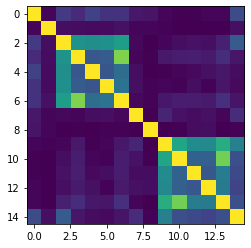

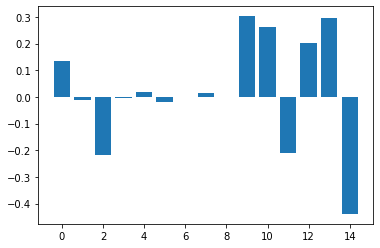

(15,)


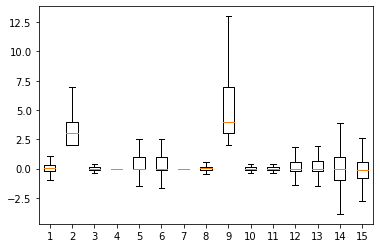

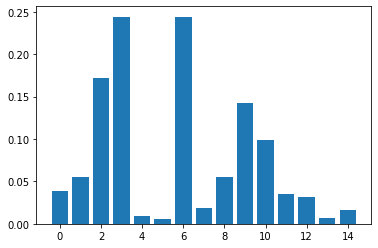

mean:0.097 | std:0.462 | ptp:6.2
mean:3.580 | std:2.745 | ptp:25.0
mean:-0.000 | std:0.418 | ptp:8.7
mean:-0.012 | std:0.272 | ptp:6.5
mean:0.233 | std:0.703 | ptp:16.2
mean:0.218 | std:0.669 | ptp:11.7
mean:-0.018 | std:0.598 | ptp:8.8
mean:0.008 | std:0.205 | ptp:3.3
mean:5.564 | std:4.627 | ptp:67.0
mean:0.001 | std:0.310 | ptp:5.4
mean:-0.003 | std:0.259 | ptp:4.5
mean:0.170 | std:0.804 | ptp:29.5
mean:0.168 | std:0.822 | ptp:34.0
mean:-0.013 | std:1.293 | ptp:14.9
mean:-0.098 | std:1.063 | ptp:17.5


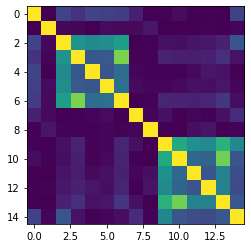

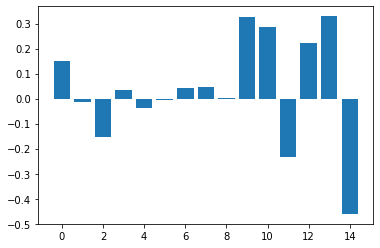

(15,)


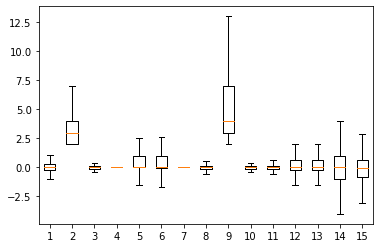

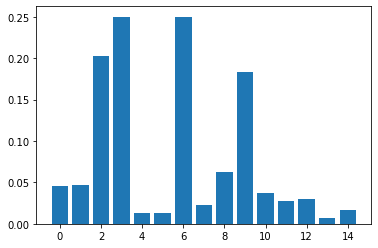

mean:0.018 | std:0.478 | ptp:6.8
mean:3.388 | std:2.167 | ptp:23.0
mean:-0.000 | std:0.481 | ptp:8.5
mean:-0.009 | std:0.317 | ptp:7.7
mean:0.242 | std:0.701 | ptp:12.5
mean:0.225 | std:0.713 | ptp:14.0
mean:-0.010 | std:0.601 | ptp:8.1
mean:0.009 | std:0.229 | ptp:2.7
mean:5.704 | std:4.800 | ptp:55.0
mean:0.001 | std:0.361 | ptp:5.0
mean:-0.000 | std:0.289 | ptp:3.0
mean:0.190 | std:0.838 | ptp:24.0
mean:0.199 | std:0.879 | ptp:34.8
mean:-0.007 | std:1.379 | ptp:13.7
mean:-0.087 | std:1.181 | ptp:16.6


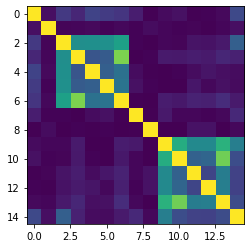

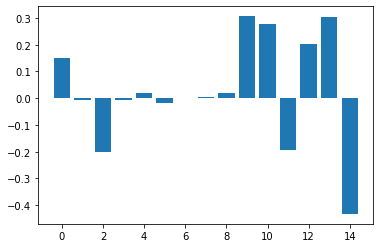

(15,)


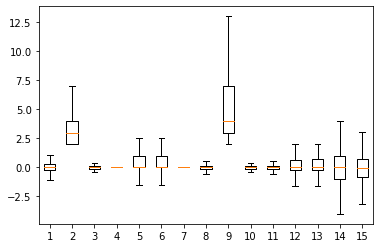

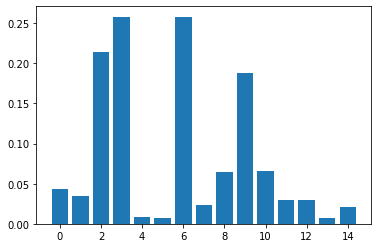

mean:0.020 | std:0.500 | ptp:6.2
mean:3.269 | std:2.049 | ptp:23.0
mean:0.002 | std:0.500 | ptp:8.8
mean:-0.009 | std:0.339 | ptp:12.2
mean:0.234 | std:0.694 | ptp:16.5
mean:0.241 | std:0.692 | ptp:21.5
mean:-0.013 | std:0.612 | ptp:9.1
mean:0.007 | std:0.235 | ptp:3.3
mean:5.724 | std:4.965 | ptp:71.0
mean:0.003 | std:0.365 | ptp:5.5
mean:0.004 | std:0.294 | ptp:4.4
mean:0.188 | std:0.863 | ptp:23.5
mean:0.202 | std:0.867 | ptp:27.0
mean:0.013 | std:1.382 | ptp:15.8
mean:-0.005 | std:1.263 | ptp:19.4


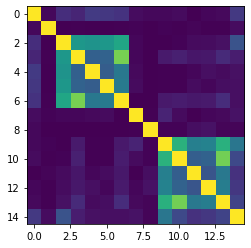

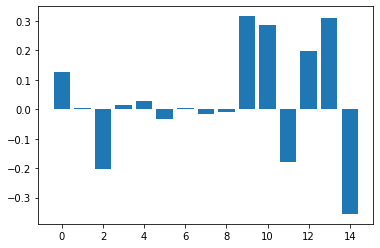

(15,)


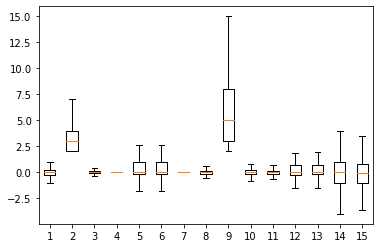

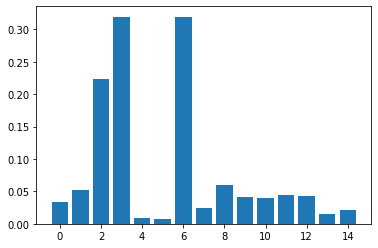

mean:0.019 | std:0.435 | ptp:5.4
mean:3.545 | std:2.291 | ptp:34.0
mean:0.002 | std:0.499 | ptp:9.0
mean:0.001 | std:0.344 | ptp:8.1
mean:0.235 | std:0.713 | ptp:13.5
mean:0.214 | std:0.700 | ptp:11.4
mean:-0.001 | std:0.709 | ptp:8.7
mean:0.018 | std:0.236 | ptp:4.1
mean:6.319 | std:5.566 | ptp:59.0
mean:0.002 | std:0.381 | ptp:9.3
mean:0.005 | std:0.309 | ptp:6.9
mean:0.200 | std:0.935 | ptp:29.5
mean:0.184 | std:0.898 | ptp:28.0
mean:0.010 | std:1.516 | ptp:16.1
mean:-0.121 | std:1.450 | ptp:20.3


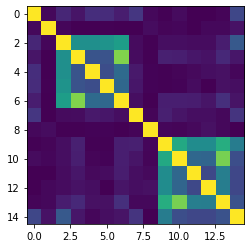

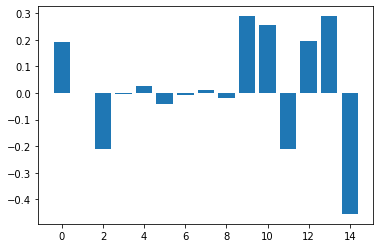

(15,)


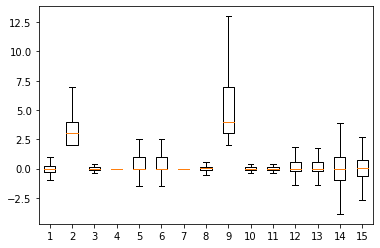

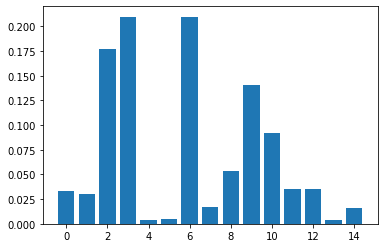

mean:-0.013 | std:0.424 | ptp:4.7
mean:3.140 | std:1.753 | ptp:28.0
mean:-0.000 | std:0.424 | ptp:8.1
mean:-0.008 | std:0.278 | ptp:6.1
mean:0.227 | std:0.655 | ptp:19.5
mean:0.237 | std:0.665 | ptp:17.5
mean:-0.008 | std:0.538 | ptp:8.2
mean:-0.000 | std:0.207 | ptp:2.4
mean:5.529 | std:4.832 | ptp:83.0
mean:-0.002 | std:0.308 | ptp:4.4
mean:-0.001 | std:0.252 | ptp:3.2
mean:0.163 | std:0.767 | ptp:19.2
mean:0.166 | std:0.760 | ptp:18.0
mean:0.001 | std:1.221 | ptp:13.2
mean:0.022 | std:1.066 | ptp:12.6


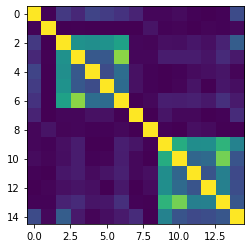

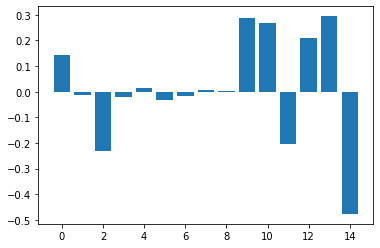

(15,)


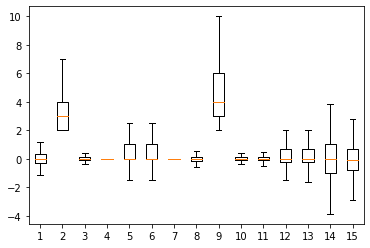

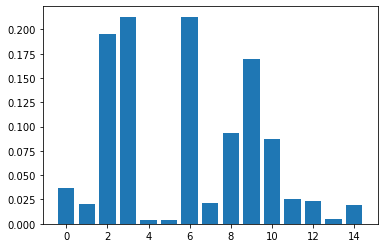

mean:0.019 | std:0.508 | ptp:5.6
mean:3.097 | std:1.553 | ptp:20.0
mean:-0.000 | std:0.481 | ptp:7.6
mean:-0.004 | std:0.315 | ptp:6.0
mean:0.241 | std:0.648 | ptp:10.5
mean:0.251 | std:0.659 | ptp:13.0
mean:-0.003 | std:0.543 | ptp:6.8
mean:-0.008 | std:0.223 | ptp:2.4
mean:5.312 | std:4.306 | ptp:54.0
mean:-0.001 | std:0.348 | ptp:4.9
mean:0.001 | std:0.282 | ptp:4.2
mean:0.188 | std:0.804 | ptp:17.7
mean:0.187 | std:0.806 | ptp:22.2
mean:-0.001 | std:1.291 | ptp:14.3
mean:-0.063 | std:1.152 | ptp:15.8


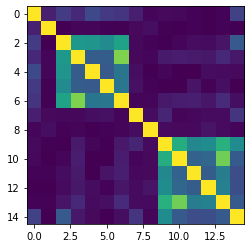

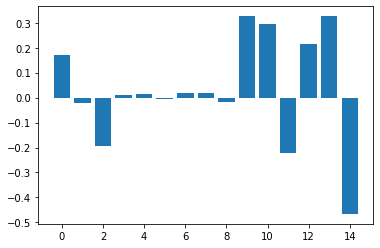

(15,)


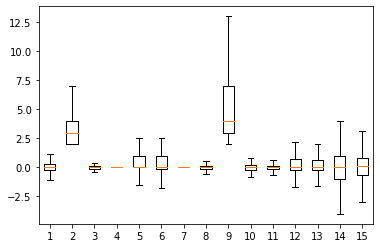

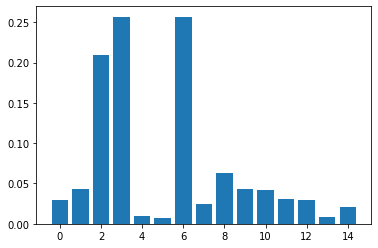

mean:0.043 | std:0.475 | ptp:6.0
mean:3.450 | std:2.561 | ptp:165.0
mean:-0.004 | std:0.496 | ptp:8.5
mean:-0.009 | std:0.327 | ptp:7.1
mean:0.256 | std:0.710 | ptp:14.8
mean:0.227 | std:0.691 | ptp:18.5
mean:-0.012 | std:0.622 | ptp:8.6
mean:0.020 | std:0.232 | ptp:2.6
mean:5.677 | std:4.799 | ptp:70.0
mean:-0.003 | std:0.383 | ptp:7.3
mean:-0.002 | std:0.307 | ptp:5.1
mean:0.201 | std:0.884 | ptp:25.0
mean:0.182 | std:0.841 | ptp:19.5
mean:-0.013 | std:1.409 | ptp:15.1
mean:0.082 | std:1.223 | ptp:17.0


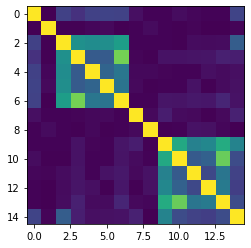

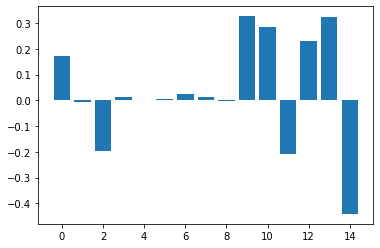

(15,)


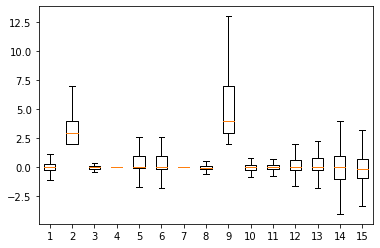

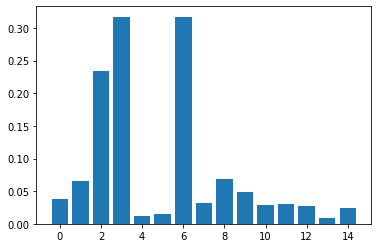

mean:0.041 | std:0.498 | ptp:7.2
mean:3.797 | std:2.869 | ptp:37.0
mean:0.006 | std:0.537 | ptp:9.9
mean:0.004 | std:0.376 | ptp:6.9
mean:0.231 | std:0.723 | ptp:20.5
mean:0.228 | std:0.752 | ptp:18.5
mean:0.003 | std:0.695 | ptp:8.6
mean:-0.010 | std:0.248 | ptp:3.4
mean:5.932 | std:5.413 | ptp:71.0
mean:0.005 | std:0.396 | ptp:6.7
mean:0.006 | std:0.323 | ptp:4.9
mean:0.191 | std:0.918 | ptp:41.5
mean:0.215 | std:0.879 | ptp:23.0
mean:0.019 | std:1.436 | ptp:14.8
mean:-0.063 | std:1.350 | ptp:18.2


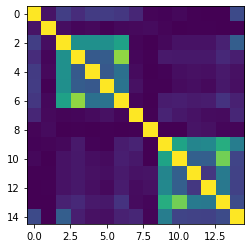

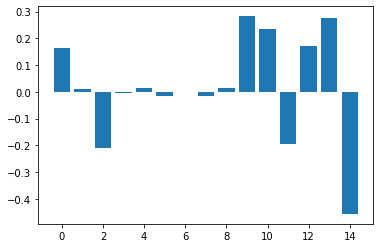

(15,)


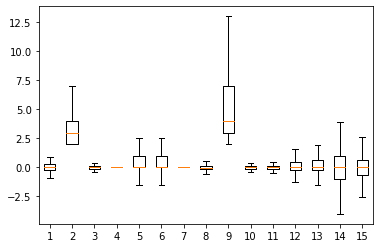

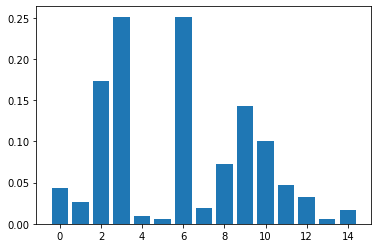

mean:0.037 | std:0.431 | ptp:6.7
mean:3.237 | std:1.854 | ptp:30.0
mean:0.000 | std:0.426 | ptp:7.4
mean:-0.003 | std:0.301 | ptp:6.5
mean:0.239 | std:0.676 | ptp:15.5
mean:0.237 | std:0.657 | ptp:15.5
mean:-0.005 | std:0.579 | ptp:8.4
mean:-0.014 | std:0.222 | ptp:2.2
mean:6.001 | std:5.212 | ptp:68.0
mean:0.002 | std:0.312 | ptp:4.1
mean:0.003 | std:0.267 | ptp:3.3
mean:0.164 | std:0.827 | ptp:33.2
mean:0.191 | std:0.836 | ptp:22.5
mean:0.016 | std:1.295 | ptp:12.5
mean:-0.003 | std:1.028 | ptp:12.7


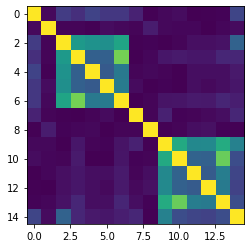

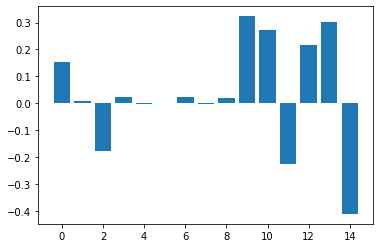

(15,)


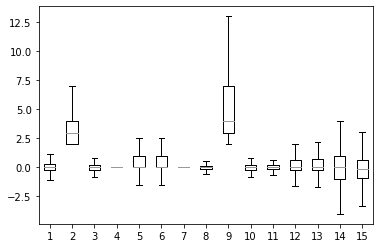

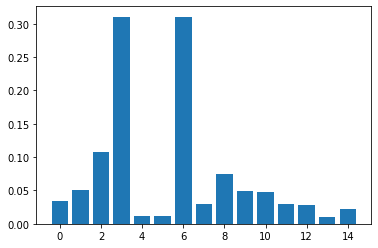

mean:0.054 | std:0.493 | ptp:7.4
mean:3.469 | std:2.456 | ptp:31.0
mean:0.004 | std:0.546 | ptp:9.0
mean:-0.004 | std:0.380 | ptp:7.3
mean:0.249 | std:0.721 | ptp:22.0
mean:0.247 | std:0.718 | ptp:19.5
mean:-0.008 | std:0.682 | ptp:9.6
mean:0.001 | std:0.248 | ptp:3.7
mean:5.893 | std:5.252 | ptp:61.0
mean:0.005 | std:0.405 | ptp:6.7
mean:0.000 | std:0.321 | ptp:5.0
mean:0.178 | std:0.868 | ptp:34.5
mean:0.200 | std:0.871 | ptp:21.1
mean:0.000 | std:1.438 | ptp:16.1
mean:-0.132 | std:1.317 | ptp:15.8


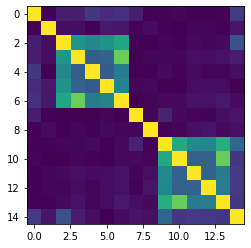

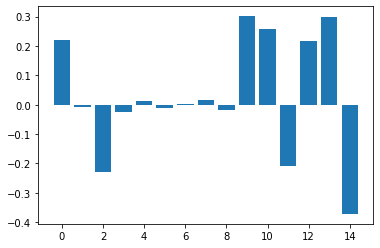

(15,)


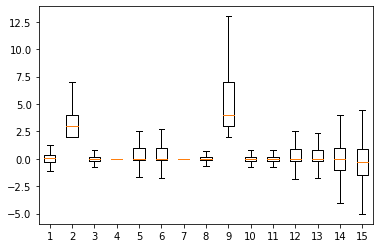

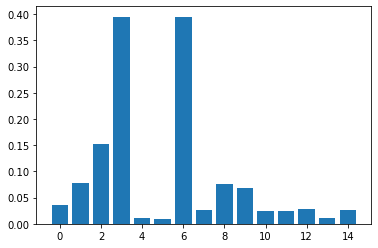

mean:0.051 | std:0.541 | ptp:8.2
mean:3.915 | std:3.607 | ptp:48.0
mean:-0.000 | std:0.644 | ptp:11.1
mean:-0.001 | std:0.464 | ptp:7.5
mean:0.264 | std:0.777 | ptp:27.5
mean:0.244 | std:0.730 | ptp:18.2
mean:-0.011 | std:0.789 | ptp:9.4
mean:0.013 | std:0.274 | ptp:3.2
mean:5.928 | std:5.232 | ptp:79.0
mean:-0.001 | std:0.452 | ptp:8.1
mean:-0.002 | std:0.352 | ptp:6.9
mean:0.219 | std:0.926 | ptp:27.0
mean:0.204 | std:0.916 | ptp:30.5
mean:-0.021 | std:1.498 | ptp:15.7
mean:-0.239 | std:1.989 | ptp:27.2


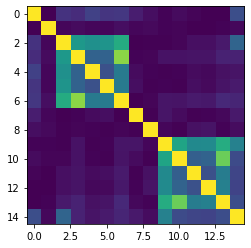

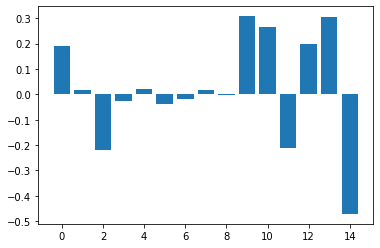

(15,)


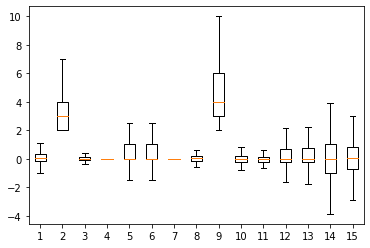

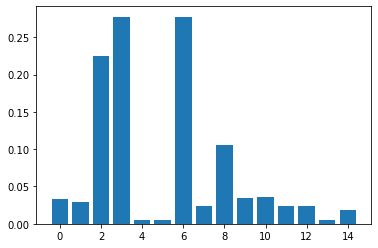

mean:0.085 | std:0.460 | ptp:6.2
mean:3.145 | std:1.859 | ptp:29.0
mean:0.000 | std:0.522 | ptp:8.4
mean:0.004 | std:0.359 | ptp:5.9
mean:0.269 | std:0.664 | ptp:15.5
mean:0.252 | std:0.676 | ptp:17.5
mean:0.008 | std:0.630 | ptp:7.9
mean:0.026 | std:0.242 | ptp:2.5
mean:5.458 | std:4.658 | ptp:51.0
mean:0.001 | std:0.363 | ptp:5.2
mean:-0.010 | std:0.294 | ptp:4.1
mean:0.197 | std:0.863 | ptp:23.0
mean:0.193 | std:0.848 | ptp:30.0
mean:-0.034 | std:1.306 | ptp:13.6
mean:0.045 | std:1.190 | ptp:14.4


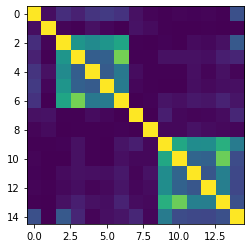

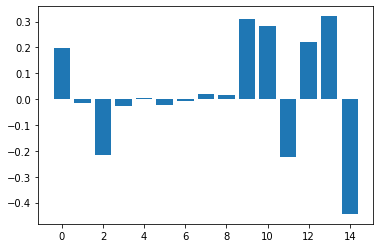

(15,)


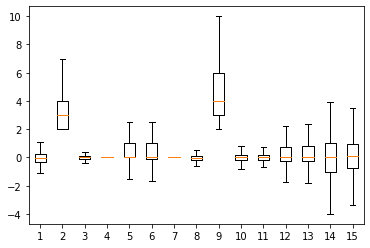

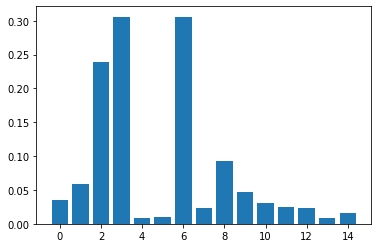

mean:-0.038 | std:0.487 | ptp:7.5
mean:3.665 | std:3.221 | ptp:45.0
mean:0.003 | std:0.547 | ptp:9.0
mean:0.002 | std:0.380 | ptp:6.9
mean:0.250 | std:0.709 | ptp:15.5
mean:0.247 | std:0.723 | ptp:16.5
mean:0.006 | std:0.694 | ptp:8.1
mean:-0.038 | std:0.237 | ptp:3.6
mean:5.287 | std:4.350 | ptp:72.0
mean:0.003 | std:0.395 | ptp:5.2
mean:0.005 | std:0.323 | ptp:5.3
mean:0.184 | std:0.849 | ptp:22.5
mean:0.217 | std:0.861 | ptp:23.0
mean:0.016 | std:1.354 | ptp:13.2
mean:0.089 | std:1.364 | ptp:19.2


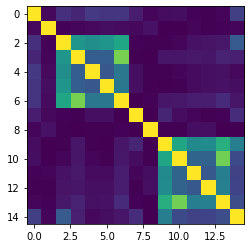

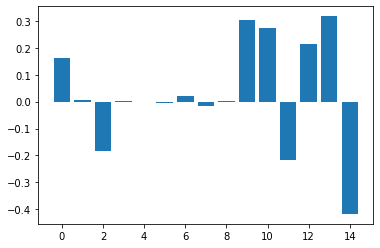

(15,)


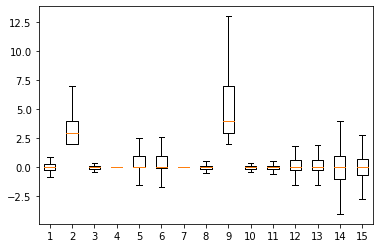

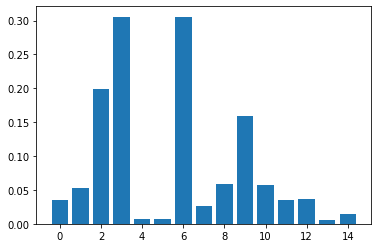

mean:0.037 | std:0.394 | ptp:4.4
mean:3.514 | std:2.519 | ptp:42.0
mean:-0.000 | std:0.442 | ptp:6.8
mean:-0.004 | std:0.320 | ptp:7.2
mean:0.242 | std:0.675 | ptp:17.0
mean:0.236 | std:0.677 | ptp:11.0
mean:-0.004 | std:0.681 | ptp:8.0
mean:-0.003 | std:0.215 | ptp:2.7
mean:5.627 | std:5.004 | ptp:201.0
mean:-0.000 | std:0.334 | ptp:4.5
mean:-0.005 | std:0.281 | ptp:3.6
mean:0.179 | std:0.849 | ptp:32.5
mean:0.186 | std:0.831 | ptp:30.0
mean:-0.013 | std:1.330 | ptp:13.7
mean:0.070 | std:1.071 | ptp:13.2


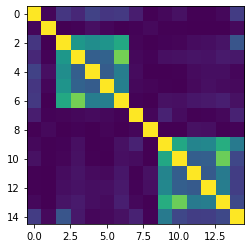

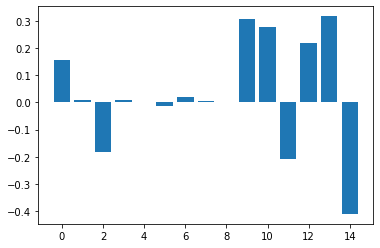

(15,)


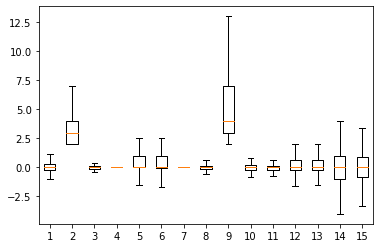

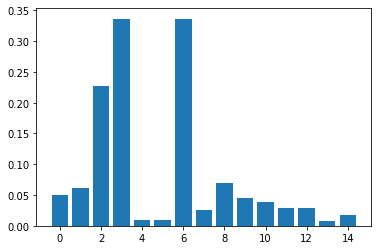

mean:0.075 | std:0.515 | ptp:5.8
mean:3.629 | std:2.566 | ptp:26.0
mean:-0.001 | std:0.510 | ptp:9.2
mean:0.002 | std:0.365 | ptp:6.4
mean:0.247 | std:0.708 | ptp:20.5
mean:0.239 | std:0.709 | ptp:16.0
mean:0.006 | std:0.728 | ptp:9.2
mean:0.012 | std:0.251 | ptp:4.3
mean:5.735 | std:4.636 | ptp:73.0
mean:-0.001 | std:0.393 | ptp:9.1
mean:-0.007 | std:0.316 | ptp:5.9
mean:0.196 | std:0.882 | ptp:30.5
mean:0.185 | std:0.867 | ptp:32.0
mean:-0.029 | std:1.393 | ptp:14.9
mean:0.064 | std:1.323 | ptp:16.4


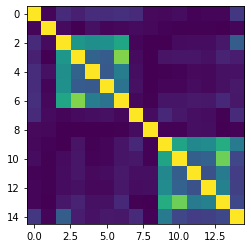

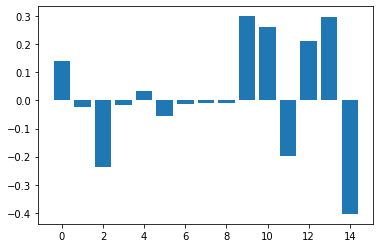

(15,)


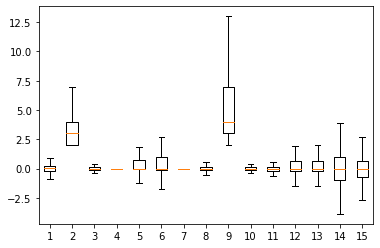

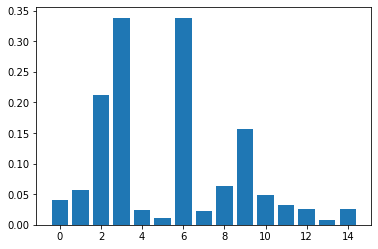

mean:0.021 | std:0.417 | ptp:5.7
mean:3.765 | std:3.090 | ptp:72.0
mean:0.000 | std:0.464 | ptp:7.7
mean:0.011 | std:0.347 | ptp:6.7
mean:0.207 | std:0.666 | ptp:19.0
mean:0.204 | std:0.754 | ptp:45.0
mean:0.026 | std:0.722 | ptp:9.7
mean:-0.007 | std:0.227 | ptp:2.5
mean:5.590 | std:4.658 | ptp:50.0
mean:-0.000 | std:0.335 | ptp:6.5
mean:-0.012 | std:0.283 | ptp:4.1
mean:0.178 | std:0.831 | ptp:28.0
mean:0.175 | std:0.811 | ptp:24.0
mean:-0.057 | std:1.320 | ptp:13.2
mean:-0.019 | std:1.128 | ptp:13.9


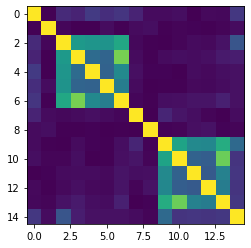

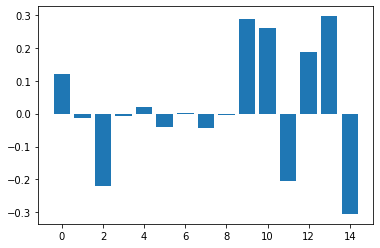

(15,)


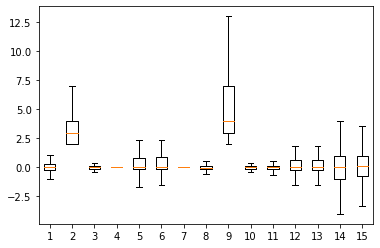

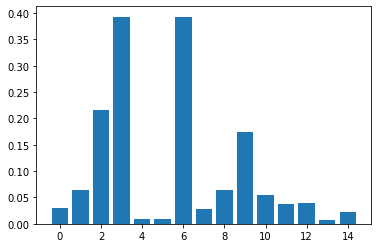

mean:0.061 | std:0.436 | ptp:6.7
mean:3.687 | std:2.528 | ptp:43.0
mean:-0.001 | std:0.481 | ptp:8.1
mean:0.012 | std:0.360 | ptp:6.0
mean:0.188 | std:0.683 | ptp:20.5
mean:0.209 | std:0.680 | ptp:22.0
mean:0.031 | std:0.775 | ptp:9.1
mean:-0.007 | std:0.237 | ptp:2.9
mean:5.620 | std:4.861 | ptp:45.0
mean:0.001 | std:0.359 | ptp:6.1
mean:-0.005 | std:0.299 | ptp:4.4
mean:0.175 | std:0.848 | ptp:26.0
mean:0.197 | std:0.883 | ptp:33.0
mean:-0.020 | std:1.347 | ptp:13.1
mean:0.116 | std:1.391 | ptp:17.6


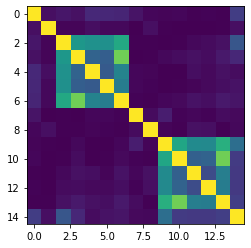

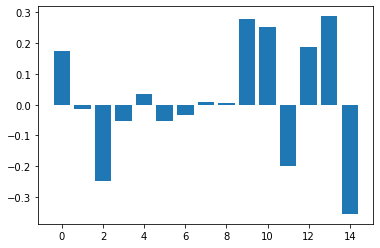

(15,)


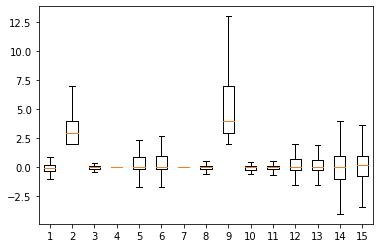

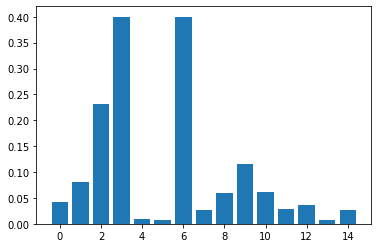

mean:-0.027 | std:0.447 | ptp:6.9
mean:3.927 | std:3.429 | ptp:45.0
mean:-0.004 | std:0.510 | ptp:9.9
mean:-0.011 | std:0.408 | ptp:7.6
mean:0.202 | std:0.684 | ptp:21.0
mean:0.217 | std:0.716 | ptp:20.2
mean:-0.009 | std:0.798 | ptp:9.7
mean:0.002 | std:0.238 | ptp:3.0
mean:5.478 | std:4.467 | ptp:49.0
mean:-0.003 | std:0.381 | ptp:7.3
mean:-0.005 | std:0.309 | ptp:7.2
mean:0.197 | std:0.832 | ptp:21.0
mean:0.193 | std:0.849 | ptp:24.5
mean:-0.026 | std:1.327 | ptp:14.8
mean:0.108 | std:1.464 | ptp:18.3


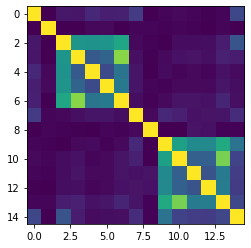

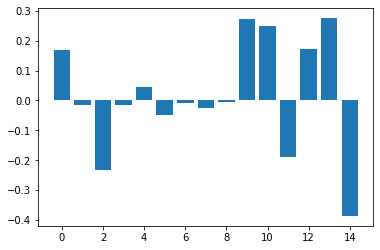

(15,)


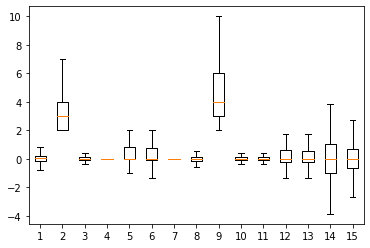

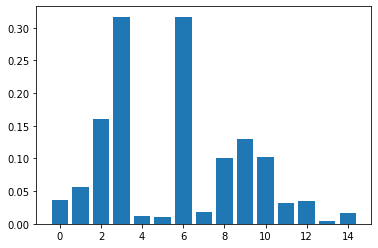

mean:0.021 | std:0.358 | ptp:4.1
mean:3.560 | std:2.474 | ptp:42.0
mean:-0.000 | std:0.384 | ptp:5.8
mean:-0.014 | std:0.309 | ptp:5.2
mean:0.202 | std:0.640 | ptp:14.0
mean:0.191 | std:0.637 | ptp:20.5
mean:-0.026 | std:0.674 | ptp:8.9
mean:0.010 | std:0.224 | ptp:3.2
mean:5.461 | std:4.673 | ptp:57.0
mean:-0.002 | std:0.302 | ptp:4.9
mean:-0.003 | std:0.259 | ptp:3.0
mean:0.174 | std:0.783 | ptp:25.5
mean:0.168 | std:0.794 | ptp:31.5
mean:-0.021 | std:1.198 | ptp:13.0
mean:0.001 | std:1.067 | ptp:12.7


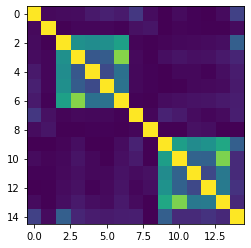

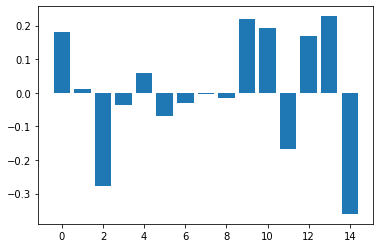

(15,)


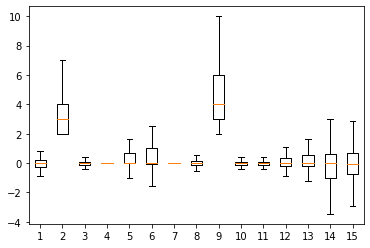

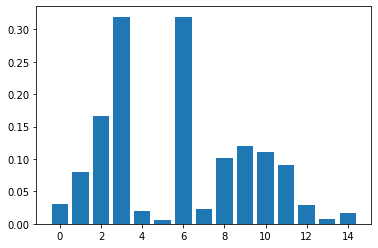

mean:-0.039 | std:0.364 | ptp:6.5
mean:3.925 | std:3.231 | ptp:39.0
mean:0.002 | std:0.407 | ptp:13.9
mean:0.001 | std:0.327 | ptp:6.3
mean:0.182 | std:0.664 | ptp:22.5
mean:0.207 | std:0.669 | ptp:15.7
mean:0.010 | std:0.697 | ptp:10.2
mean:0.013 | std:0.228 | ptp:2.7
mean:5.313 | std:4.464 | ptp:50.0
mean:0.002 | std:0.295 | ptp:4.8
mean:-0.014 | std:0.265 | ptp:3.1
mean:0.151 | std:0.717 | ptp:22.5
mean:0.164 | std:0.692 | ptp:21.0
mean:-0.046 | std:1.090 | ptp:11.3
mean:-0.037 | std:1.149 | ptp:22.4


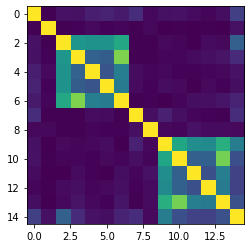

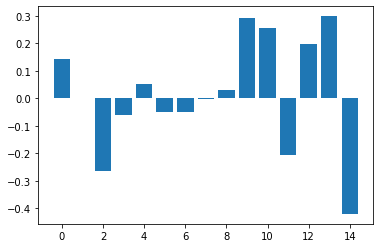

(15,)


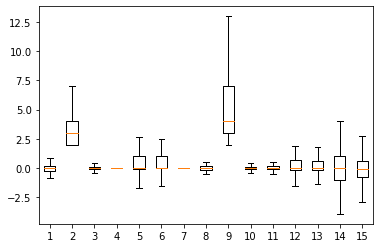

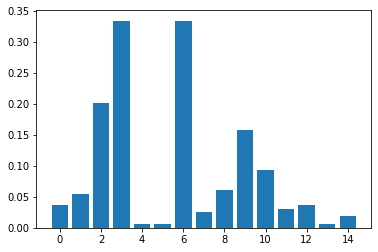

mean:-0.037 | std:0.380 | ptp:5.4
mean:3.545 | std:2.681 | ptp:34.0
mean:-0.000 | std:0.461 | ptp:13.1
mean:0.010 | std:0.339 | ptp:5.8
mean:0.208 | std:0.674 | ptp:17.3
mean:0.232 | std:0.695 | ptp:21.7
mean:0.011 | std:0.705 | ptp:9.2
mean:0.003 | std:0.228 | ptp:3.6
mean:5.609 | std:4.550 | ptp:54.0
mean:0.001 | std:0.341 | ptp:5.3
mean:0.006 | std:0.291 | ptp:5.4
mean:0.178 | std:0.785 | ptp:26.2
mean:0.170 | std:0.790 | ptp:28.5
mean:0.029 | std:1.274 | ptp:11.9
mean:-0.076 | std:1.141 | ptp:19.7


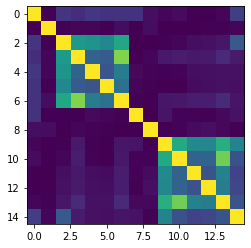

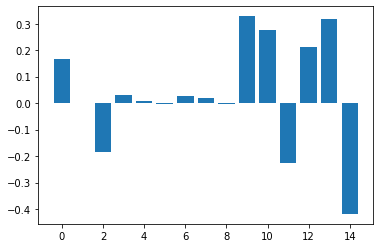

(15,)


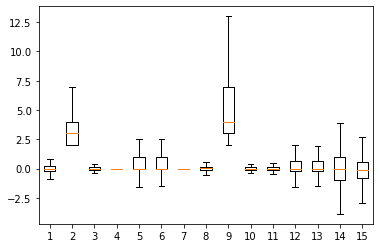

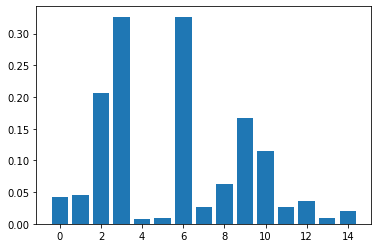

mean:-0.016 | std:0.401 | ptp:5.3
mean:3.547 | std:3.188 | ptp:141.0
mean:0.001 | std:0.468 | ptp:7.4
mean:0.004 | std:0.331 | ptp:5.2
mean:0.239 | std:0.702 | ptp:17.3
mean:0.234 | std:0.763 | ptp:52.7
mean:0.013 | std:0.719 | ptp:11.2
mean:0.008 | std:0.236 | ptp:3.4
mean:5.644 | std:5.062 | ptp:105.0
mean:0.001 | std:0.353 | ptp:7.0
mean:0.003 | std:0.284 | ptp:5.5
mean:0.174 | std:0.830 | ptp:25.2
mean:0.200 | std:0.848 | ptp:39.5
mean:0.013 | std:1.361 | ptp:16.6
mean:-0.112 | std:1.140 | ptp:15.1


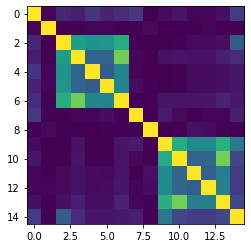

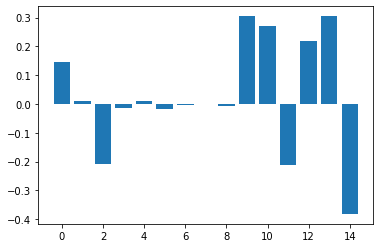

(15,)


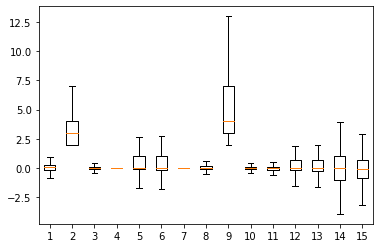

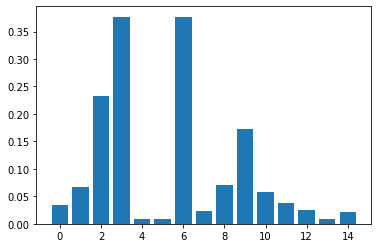

mean:0.058 | std:0.407 | ptp:6.0
mean:3.750 | std:3.059 | ptp:60.0
mean:-0.000 | std:0.487 | ptp:8.4
mean:-0.006 | std:0.343 | ptp:6.3
mean:0.229 | std:0.720 | ptp:19.0
mean:0.225 | std:0.733 | ptp:21.5
mean:-0.008 | std:0.795 | ptp:9.0
mean:0.022 | std:0.223 | ptp:2.9
mean:5.888 | std:4.932 | ptp:71.0
mean:-0.000 | std:0.353 | ptp:6.5
mean:-0.007 | std:0.281 | ptp:4.4
mean:0.197 | std:0.861 | ptp:28.5
mean:0.176 | std:0.855 | ptp:33.5
mean:-0.038 | std:1.405 | ptp:15.2
mean:-0.084 | std:1.238 | ptp:16.1


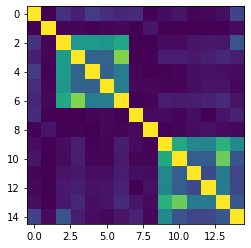

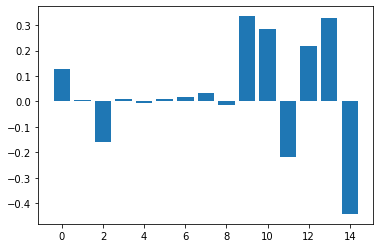

(15,)


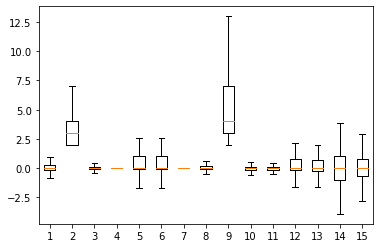

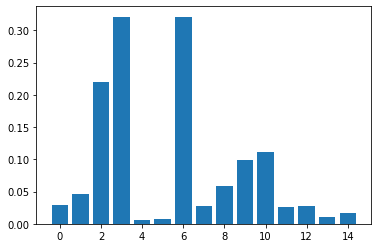

mean:0.046 | std:0.387 | ptp:4.4
mean:3.506 | std:2.337 | ptp:30.0
mean:-0.003 | std:0.462 | ptp:7.8
mean:-0.005 | std:0.326 | ptp:7.0
mean:0.241 | std:0.710 | ptp:16.0
mean:0.233 | std:0.702 | ptp:16.0
mean:-0.010 | std:0.720 | ptp:9.3
mean:0.037 | std:0.230 | ptp:3.1
mean:5.575 | std:4.795 | ptp:77.0
mean:-0.002 | std:0.356 | ptp:7.9
mean:-0.002 | std:0.285 | ptp:6.9
mean:0.209 | std:0.861 | ptp:38.0
mean:0.188 | std:0.869 | ptp:33.5
mean:-0.017 | std:1.370 | ptp:14.7
mean:0.024 | std:1.118 | ptp:17.1


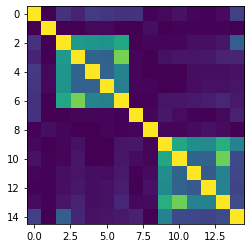

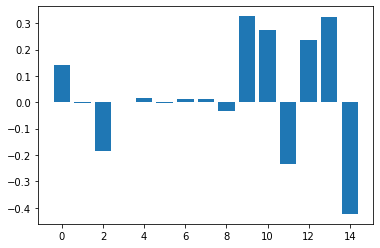

(15,)


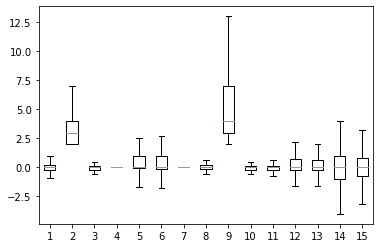

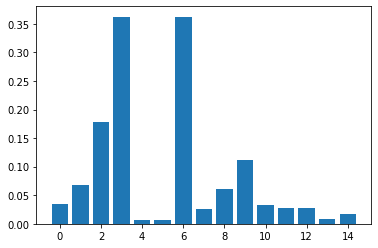

mean:0.011 | std:0.421 | ptp:5.0
mean:3.747 | std:2.757 | ptp:48.0
mean:-0.005 | std:0.516 | ptp:9.2
mean:-0.000 | std:0.364 | ptp:8.8
mean:0.241 | std:0.693 | ptp:16.0
mean:0.229 | std:0.717 | ptp:18.5
mean:-0.000 | std:0.763 | ptp:9.8
mean:0.023 | std:0.253 | ptp:3.2
mean:5.615 | std:4.745 | ptp:79.0
mean:-0.003 | std:0.380 | ptp:6.7
mean:-0.007 | std:0.305 | ptp:4.0
mean:0.204 | std:0.839 | ptp:20.0
mean:0.171 | std:0.849 | ptp:23.5
mean:-0.047 | std:1.371 | ptp:13.1
mean:0.048 | std:1.255 | ptp:18.3


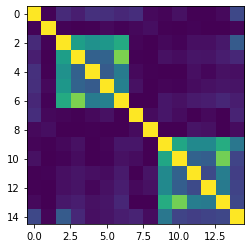

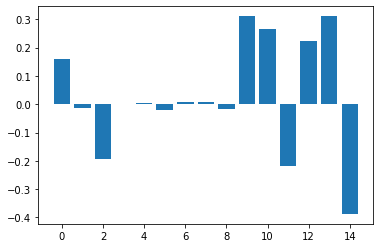

(15,)


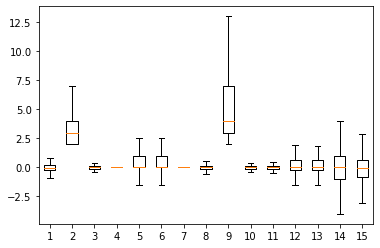

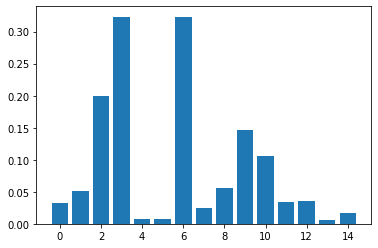

mean:-0.021 | std:0.371 | ptp:5.4
mean:3.587 | std:2.927 | ptp:52.0
mean:0.001 | std:0.450 | ptp:7.9
mean:0.003 | std:0.339 | ptp:6.0
mean:0.223 | std:0.682 | ptp:15.8
mean:0.227 | std:0.675 | ptp:14.3
mean:-0.006 | std:0.713 | ptp:9.5
mean:0.008 | std:0.238 | ptp:3.8
mean:5.434 | std:4.239 | ptp:51.0
mean:0.000 | std:0.320 | ptp:5.2
mean:-0.007 | std:0.274 | ptp:4.6
mean:0.186 | std:0.809 | ptp:23.5
mean:0.187 | std:0.808 | ptp:20.5
mean:-0.011 | std:1.288 | ptp:11.1
mean:-0.082 | std:1.163 | ptp:12.4


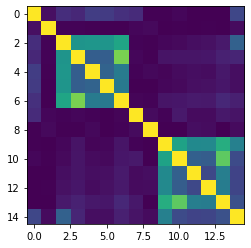

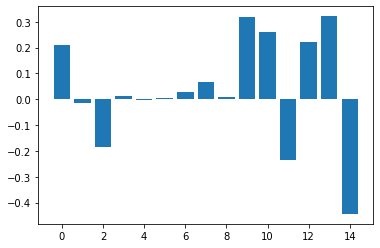

(15,)


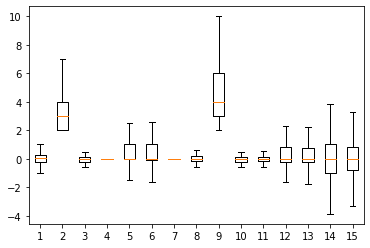

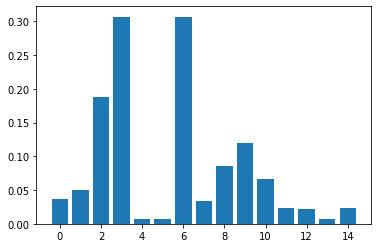

mean:0.029 | std:0.457 | ptp:7.8
mean:3.574 | std:2.237 | ptp:27.0
mean:-0.005 | std:0.574 | ptp:12.7
mean:-0.008 | std:0.420 | ptp:9.6
mean:0.250 | std:0.690 | ptp:13.0
mean:0.232 | std:0.688 | ptp:12.5
mean:0.001 | std:0.689 | ptp:8.5
mean:0.012 | std:0.272 | ptp:8.1
mean:5.175 | std:4.502 | ptp:54.0
mean:-0.004 | std:0.405 | ptp:9.3
mean:-0.005 | std:0.335 | ptp:18.1
mean:0.214 | std:0.816 | ptp:18.5
mean:0.196 | std:0.822 | ptp:27.5
mean:-0.026 | std:1.298 | ptp:18.6
mean:-0.011 | std:1.354 | ptp:22.4


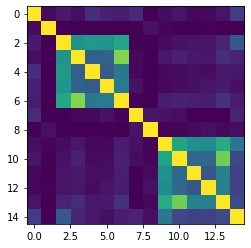

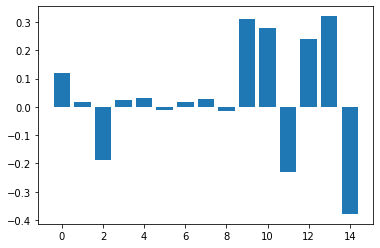

(15,)


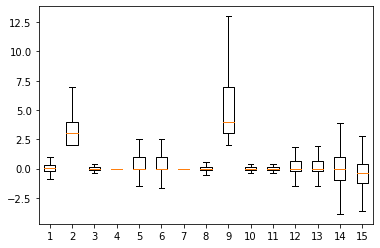

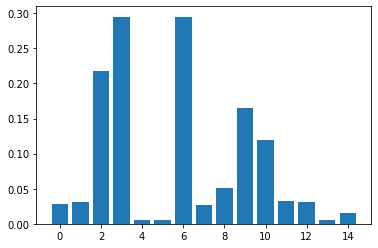

mean:0.044 | std:0.392 | ptp:5.2
mean:3.284 | std:1.923 | ptp:31.0
mean:-0.000 | std:0.471 | ptp:11.1
mean:-0.001 | std:0.326 | ptp:6.4
mean:0.248 | std:0.678 | ptp:16.5
mean:0.237 | std:0.681 | ptp:19.0
mean:-0.005 | std:0.670 | ptp:9.8
mean:-0.002 | std:0.246 | ptp:3.3
mean:5.385 | std:4.332 | ptp:59.0
mean:0.000 | std:0.342 | ptp:4.8
mean:-0.001 | std:0.279 | ptp:4.4
mean:0.177 | std:0.778 | ptp:18.0
mean:0.192 | std:0.788 | ptp:21.5
mean:-0.003 | std:1.267 | ptp:12.9
mean:-0.417 | std:1.236 | ptp:18.2


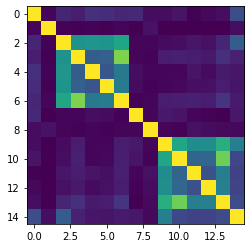

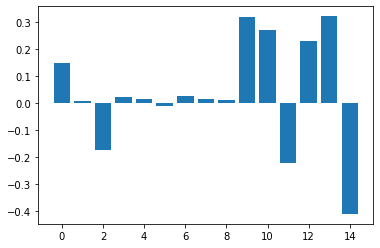

(15,)


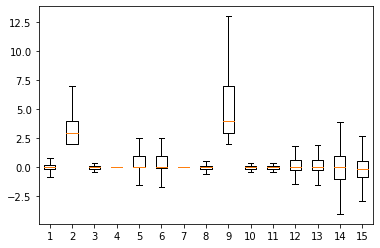

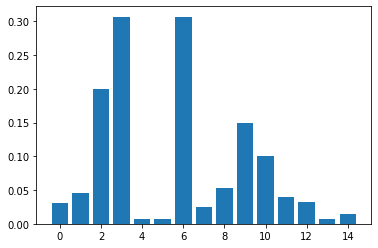

mean:0.030 | std:0.353 | ptp:5.5
mean:3.399 | std:2.280 | ptp:24.0
mean:0.003 | std:0.438 | ptp:6.3
mean:-0.004 | std:0.305 | ptp:5.5
mean:0.240 | std:0.690 | ptp:20.5
mean:0.250 | std:0.698 | ptp:19.5
mean:-0.006 | std:0.680 | ptp:9.2
mean:0.002 | std:0.231 | ptp:2.4
mean:5.511 | std:4.343 | ptp:69.0
mean:0.002 | std:0.320 | ptp:5.0
mean:-0.001 | std:0.262 | ptp:4.4
mean:0.169 | std:0.800 | ptp:25.0
mean:0.188 | std:0.797 | ptp:29.5
mean:0.003 | std:1.311 | ptp:12.1
mean:-0.108 | std:1.088 | ptp:13.6


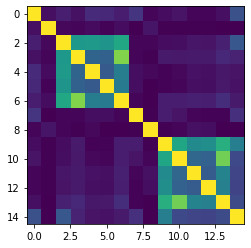

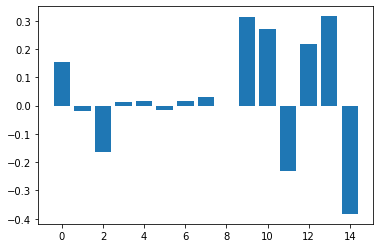

(15,)


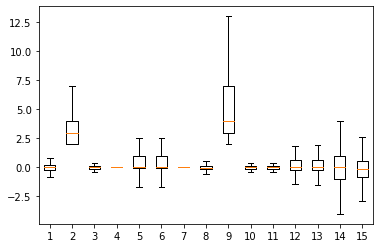

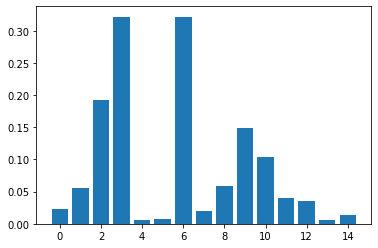

mean:0.004 | std:0.331 | ptp:3.3
mean:3.626 | std:2.582 | ptp:37.0
mean:0.003 | std:0.414 | ptp:5.2
mean:-0.001 | std:0.301 | ptp:5.3
mean:0.227 | std:0.681 | ptp:15.5
mean:0.232 | std:0.693 | ptp:16.0
mean:0.002 | std:0.712 | ptp:8.8
mean:-0.017 | std:0.223 | ptp:2.9
mean:5.730 | std:4.684 | ptp:51.0
mean:0.004 | std:0.319 | ptp:4.5
mean:-0.001 | std:0.263 | ptp:3.5
mean:0.161 | std:0.825 | ptp:34.5
mean:0.198 | std:0.832 | ptp:29.2
mean:0.000 | std:1.330 | ptp:15.3
mean:-0.145 | std:1.054 | ptp:10.5


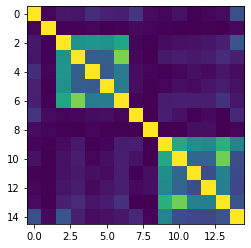

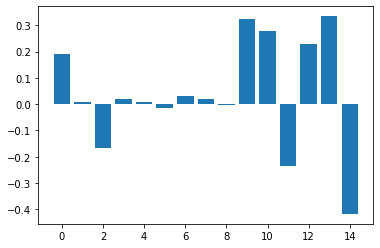

(15,)


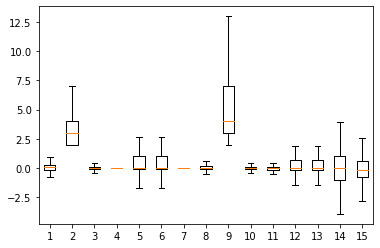

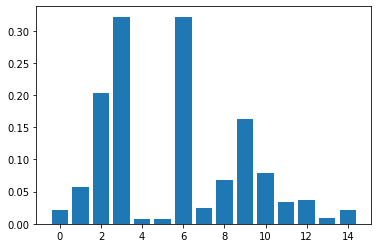

mean:0.046 | std:0.350 | ptp:4.5
mean:3.555 | std:2.290 | ptp:28.0
mean:0.001 | std:0.445 | ptp:6.2
mean:-0.000 | std:0.315 | ptp:5.8
mean:0.238 | std:0.697 | ptp:19.5
mean:0.222 | std:0.707 | ptp:19.5
mean:-0.001 | std:0.708 | ptp:9.3
mean:0.025 | std:0.226 | ptp:2.5
mean:5.854 | std:5.037 | ptp:69.0
mean:0.000 | std:0.341 | ptp:5.8
mean:-0.005 | std:0.275 | ptp:4.5
mean:0.174 | std:0.808 | ptp:22.0
mean:0.189 | std:0.841 | ptp:30.5
mean:-0.021 | std:1.347 | ptp:14.8
mean:-0.115 | std:1.106 | ptp:13.0


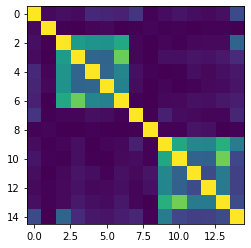

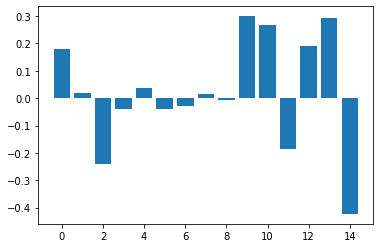

(15,)


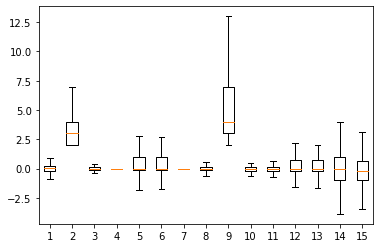

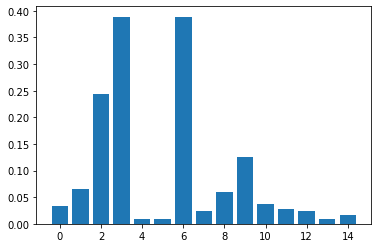

mean:0.040 | std:0.397 | ptp:4.5
mean:3.654 | std:2.542 | ptp:30.0
mean:0.001 | std:0.542 | ptp:10.5
mean:0.004 | std:0.402 | ptp:11.3
mean:0.235 | std:0.725 | ptp:18.0
mean:0.240 | std:0.721 | ptp:18.5
mean:0.012 | std:0.799 | ptp:10.8
mean:-0.014 | std:0.250 | ptp:3.0
mean:5.538 | std:4.798 | ptp:63.0
mean:-0.000 | std:0.391 | ptp:6.0
mean:-0.004 | std:0.318 | ptp:4.9
mean:0.204 | std:0.858 | ptp:25.3
mean:0.199 | std:0.858 | ptp:27.8
mean:-0.017 | std:1.376 | ptp:16.7
mean:-0.163 | std:1.294 | ptp:19.2


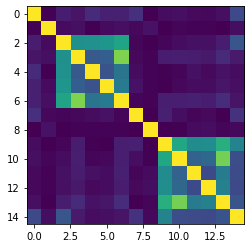

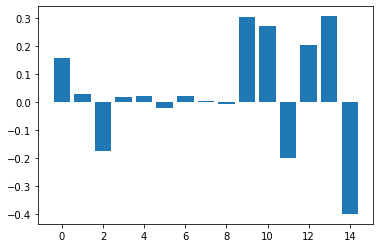

(15,)


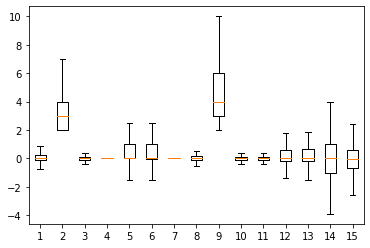

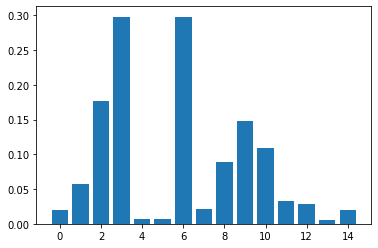

mean:0.058 | std:0.315 | ptp:3.7
mean:3.545 | std:2.464 | ptp:37.0
mean:-0.002 | std:0.397 | ptp:6.7
mean:-0.007 | std:0.298 | ptp:5.4
mean:0.233 | std:0.692 | ptp:17.5
mean:0.203 | std:0.660 | ptp:15.5
mean:-0.011 | std:0.673 | ptp:8.8
mean:0.001 | std:0.217 | ptp:3.0
mean:5.295 | std:4.473 | ptp:51.0
mean:-0.002 | std:0.322 | ptp:6.0
mean:-0.007 | std:0.267 | ptp:3.8
mean:0.173 | std:0.799 | ptp:41.5
mean:0.176 | std:0.782 | ptp:21.7
mean:-0.033 | std:1.241 | ptp:13.1
mean:-0.064 | std:0.998 | ptp:11.4


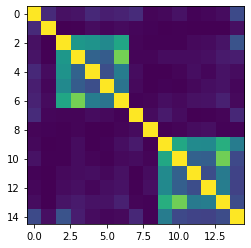

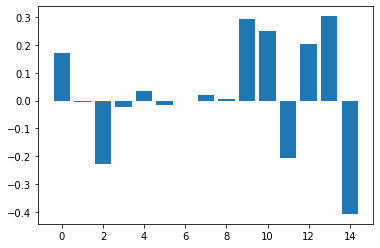

(15,)


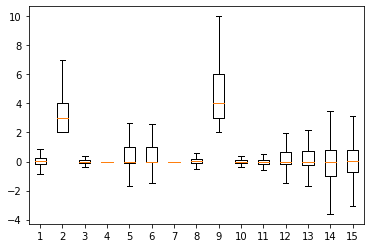

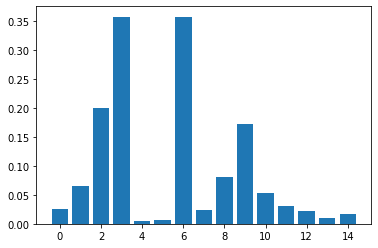

mean:0.018 | std:0.359 | ptp:4.0
mean:3.814 | std:3.809 | ptp:55.0
mean:-0.003 | std:0.449 | ptp:6.5
mean:0.008 | std:0.333 | ptp:5.7
mean:0.220 | std:0.684 | ptp:18.5
mean:0.214 | std:0.699 | ptp:28.0
mean:0.025 | std:0.738 | ptp:8.6
mean:0.012 | std:0.230 | ptp:2.7
mean:5.126 | std:4.367 | ptp:85.0
mean:-0.002 | std:0.357 | ptp:9.1
mean:-0.019 | std:0.295 | ptp:5.5
mean:0.193 | std:0.806 | ptp:25.0
mean:0.200 | std:0.815 | ptp:25.5
mean:-0.070 | std:1.244 | ptp:15.5
mean:-0.002 | std:1.213 | ptp:18.2


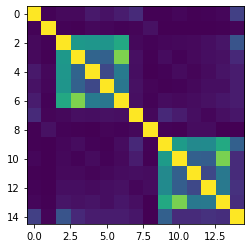

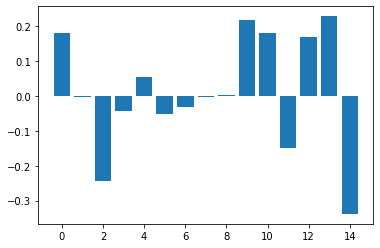

(15,)


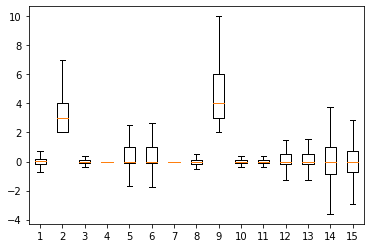

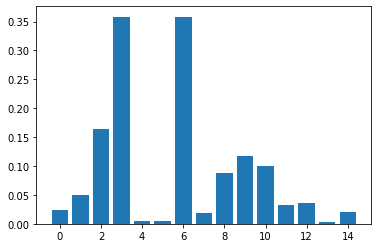

mean:0.004 | std:0.286 | ptp:3.8
mean:3.450 | std:2.262 | ptp:39.0
mean:-0.001 | std:0.368 | ptp:5.3
mean:0.001 | std:0.293 | ptp:6.1
mean:0.211 | std:0.638 | ptp:10.3
mean:0.202 | std:0.643 | ptp:13.6
mean:0.012 | std:0.720 | ptp:9.8
mean:-0.012 | std:0.218 | ptp:2.4
mean:5.106 | std:4.192 | ptp:67.0
mean:0.002 | std:0.291 | ptp:5.2
mean:0.004 | std:0.257 | ptp:3.6
mean:0.158 | std:0.759 | ptp:40.0
mean:0.169 | std:0.751 | ptp:30.0
mean:0.004 | std:1.085 | ptp:11.4
mean:-0.018 | std:1.177 | ptp:13.0


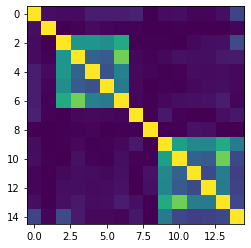

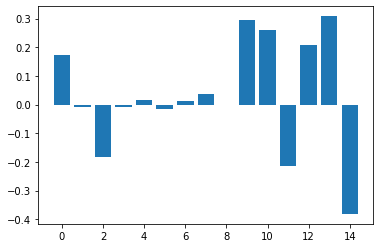

(15,)


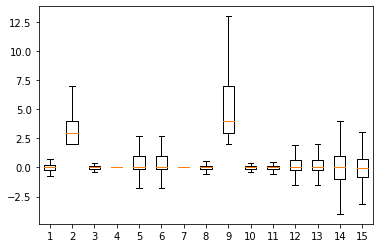

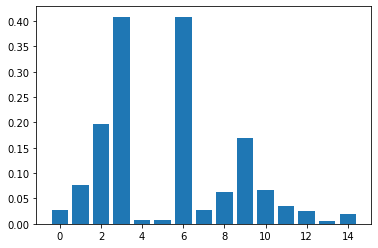

mean:-0.002 | std:0.321 | ptp:4.1
mean:3.790 | std:2.816 | ptp:69.0
mean:-0.004 | std:0.414 | ptp:6.8
mean:0.001 | std:0.327 | ptp:4.9
mean:0.233 | std:0.708 | ptp:15.0
mean:0.210 | std:0.732 | ptp:41.0
mean:-0.000 | std:0.804 | ptp:8.8
mean:0.009 | std:0.238 | ptp:8.7
mean:5.710 | std:4.756 | ptp:56.0
mean:-0.003 | std:0.351 | ptp:6.2
mean:-0.008 | std:0.296 | ptp:10.1
mean:0.199 | std:0.830 | ptp:27.5
mean:0.175 | std:0.836 | ptp:39.0
mean:-0.027 | std:1.271 | ptp:13.0
mean:-0.048 | std:1.249 | ptp:13.2


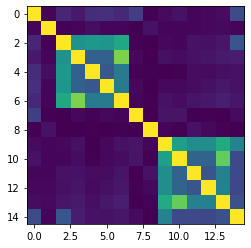

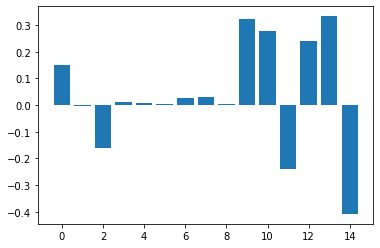

(15,)


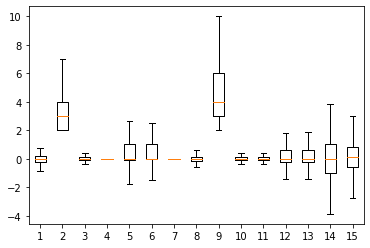

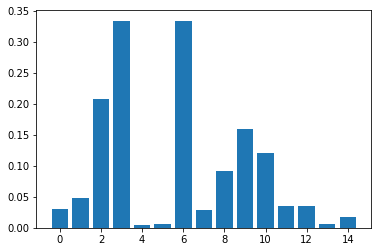

mean:-0.043 | std:0.351 | ptp:3.8
mean:3.471 | std:2.388 | ptp:34.0
mean:0.001 | std:0.434 | ptp:6.4
mean:-0.001 | std:0.312 | ptp:6.7
mean:0.222 | std:0.673 | ptp:17.0
mean:0.235 | std:0.671 | ptp:15.5
mean:0.001 | std:0.701 | ptp:8.1
mean:0.005 | std:0.252 | ptp:3.0
mean:5.229 | std:4.444 | ptp:73.0
mean:0.000 | std:0.337 | ptp:6.0
mean:-0.000 | std:0.280 | ptp:4.0
mean:0.171 | std:0.775 | ptp:25.2
mean:0.167 | std:0.771 | ptp:20.5
mean:-0.004 | std:1.228 | ptp:13.2
mean:0.122 | std:1.126 | ptp:11.9


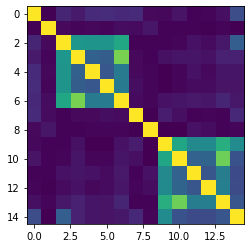

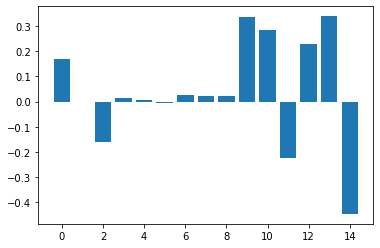

(15,)


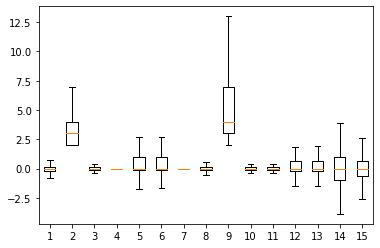

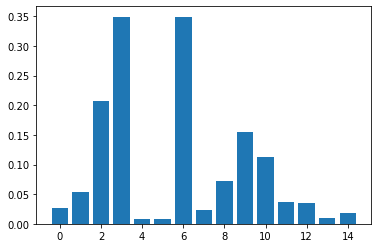

mean:-0.039 | std:0.325 | ptp:3.9
mean:3.525 | std:2.485 | ptp:39.0
mean:0.002 | std:0.436 | ptp:7.1
mean:0.006 | std:0.309 | ptp:5.5
mean:0.220 | std:0.701 | ptp:23.0
mean:0.238 | std:0.708 | ptp:23.0
mean:0.012 | std:0.738 | ptp:9.9
mean:-0.001 | std:0.225 | ptp:2.4
mean:5.798 | std:5.212 | ptp:97.0
mean:0.003 | std:0.331 | ptp:6.7
mean:-0.000 | std:0.272 | ptp:3.9
mean:0.180 | std:0.845 | ptp:26.7
mean:0.183 | std:0.853 | ptp:29.0
mean:-0.004 | std:1.340 | ptp:13.8
mean:-0.012 | std:1.028 | ptp:14.9


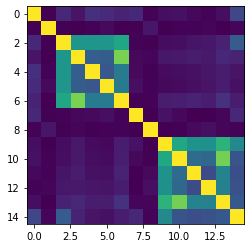

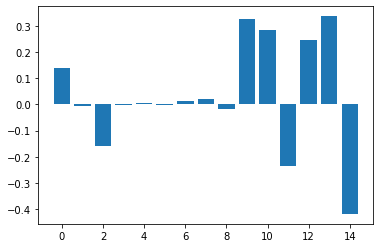

(15,)


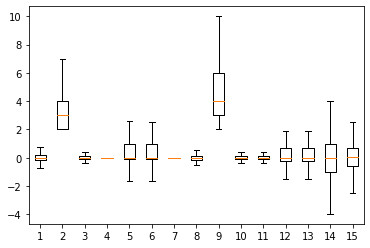

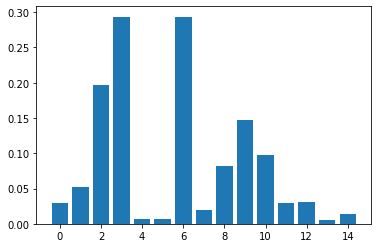

mean:0.011 | std:0.330 | ptp:5.0
mean:3.456 | std:2.521 | ptp:32.0
mean:-0.002 | std:0.422 | ptp:5.8
mean:-0.006 | std:0.282 | ptp:6.0
mean:0.233 | std:0.699 | ptp:18.0
mean:0.220 | std:0.688 | ptp:20.5
mean:-0.013 | std:0.684 | ptp:10.5
mean:-0.002 | std:0.212 | ptp:3.2
mean:5.151 | std:3.910 | ptp:44.0
mean:-0.002 | std:0.319 | ptp:5.4
mean:-0.000 | std:0.258 | ptp:5.1
mean:0.177 | std:0.769 | ptp:20.5
mean:0.180 | std:0.780 | ptp:24.5
mean:-0.004 | std:1.264 | ptp:17.0
mean:0.017 | std:0.983 | ptp:12.1


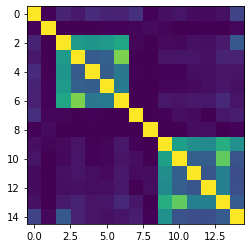

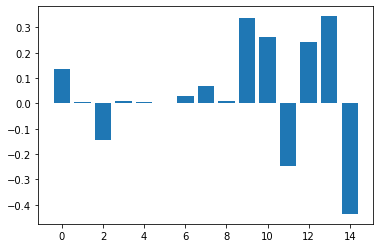

(15,)


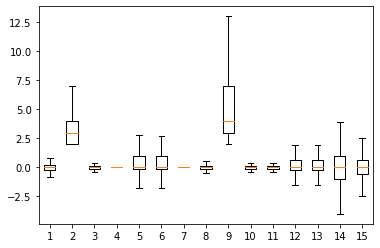

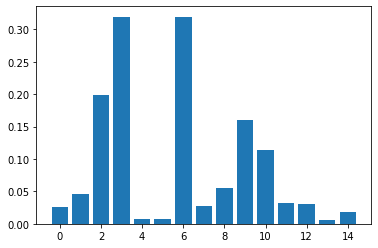

mean:0.008 | std:0.339 | ptp:3.4
mean:3.433 | std:2.165 | ptp:27.0
mean:0.001 | std:0.422 | ptp:5.1
mean:-0.001 | std:0.297 | ptp:6.2
mean:0.231 | std:0.702 | ptp:16.5
mean:0.222 | std:0.690 | ptp:16.5
mean:-0.003 | std:0.703 | ptp:9.4
mean:0.028 | std:0.229 | ptp:6.3
mean:5.469 | std:4.382 | ptp:55.0
mean:0.000 | std:0.333 | ptp:5.7
mean:-0.005 | std:0.285 | ptp:15.8
mean:0.180 | std:0.801 | ptp:25.3
mean:0.184 | std:0.817 | ptp:31.0
mean:-0.013 | std:1.294 | ptp:23.0
mean:0.017 | std:0.987 | ptp:11.7


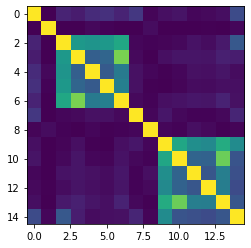

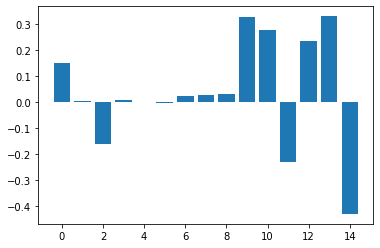

(15,)


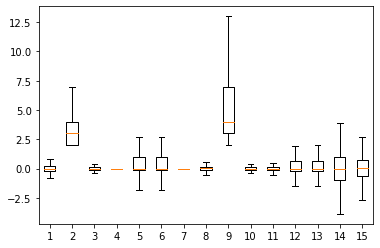

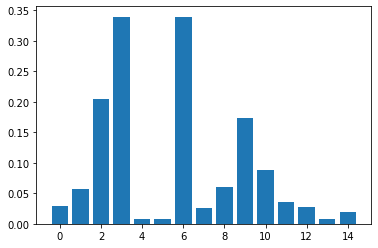

mean:0.001 | std:0.331 | ptp:3.8
mean:3.567 | std:2.301 | ptp:25.0
mean:0.003 | std:0.439 | ptp:6.4
mean:-0.002 | std:0.302 | ptp:4.8
mean:0.235 | std:0.704 | ptp:15.5
mean:0.233 | std:0.703 | ptp:15.5
mean:-0.002 | std:0.742 | ptp:9.6
mean:0.003 | std:0.236 | ptp:2.9
mean:5.578 | std:4.630 | ptp:66.0
mean:0.002 | std:0.349 | ptp:5.1
mean:-0.003 | std:0.284 | ptp:3.6
mean:0.179 | std:0.827 | ptp:24.0
mean:0.185 | std:0.852 | ptp:37.0
mean:-0.014 | std:1.339 | ptp:14.8
mean:0.040 | std:1.076 | ptp:14.7


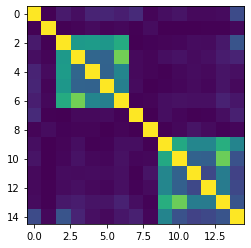

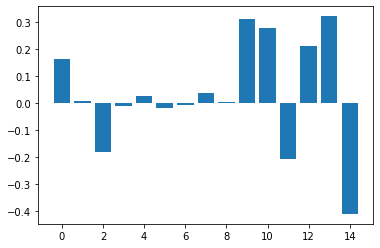

(15,)


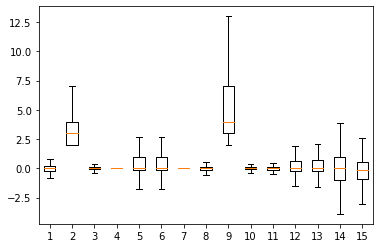

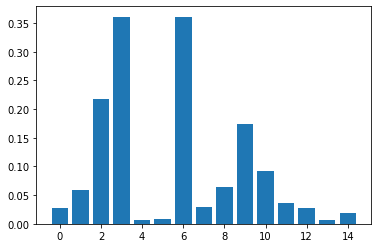

mean:-0.007 | std:0.335 | ptp:3.7
mean:3.567 | std:2.541 | ptp:41.0
mean:0.000 | std:0.447 | ptp:6.3
mean:0.003 | std:0.322 | ptp:5.3
mean:0.220 | std:0.688 | ptp:14.5
mean:0.227 | std:0.701 | ptp:13.0
mean:0.012 | std:0.754 | ptp:8.7
mean:-0.002 | std:0.242 | ptp:3.1
mean:5.670 | std:5.068 | ptp:65.0
mean:0.001 | std:0.358 | ptp:6.9
mean:-0.009 | std:0.289 | ptp:5.6
mean:0.193 | std:0.841 | ptp:29.0
mean:0.190 | std:0.860 | ptp:30.5
mean:-0.035 | std:1.309 | ptp:16.7
mean:-0.222 | std:1.132 | ptp:16.3


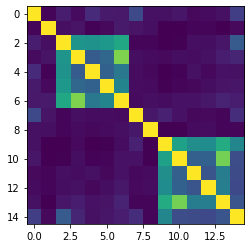

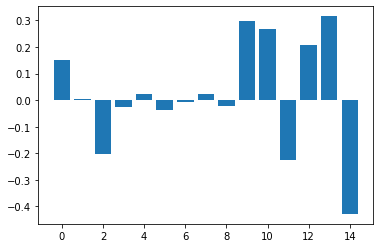

(15,)


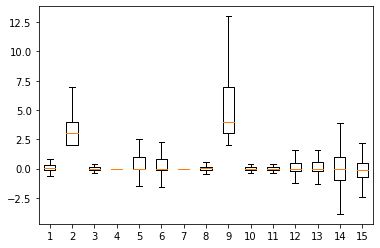

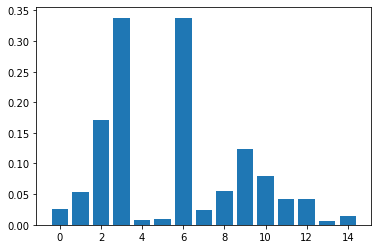

mean:0.088 | std:0.297 | ptp:3.9
mean:3.576 | std:2.600 | ptp:35.0
mean:-0.003 | std:0.368 | ptp:8.1
mean:-0.013 | std:0.266 | ptp:6.8
mean:0.231 | std:0.708 | ptp:29.0
mean:0.183 | std:0.669 | ptp:29.0
mean:-0.032 | std:0.712 | ptp:11.5
mean:0.011 | std:0.210 | ptp:2.3
mean:5.495 | std:4.450 | ptp:52.0
mean:-0.001 | std:0.288 | ptp:4.3
mean:-0.003 | std:0.243 | ptp:3.7
mean:0.166 | std:0.771 | ptp:32.5
mean:0.159 | std:0.791 | ptp:32.5
mean:-0.016 | std:1.237 | ptp:13.4
mean:-0.117 | std:0.896 | ptp:12.3


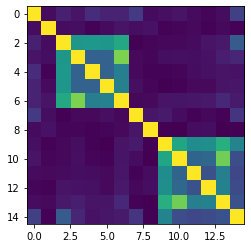

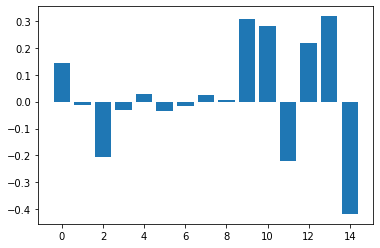

(15,)


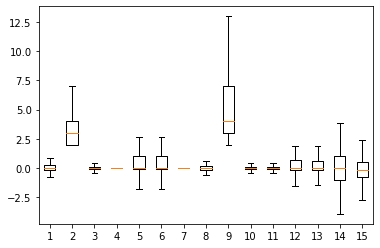

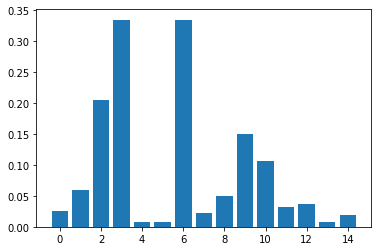

mean:0.043 | std:0.326 | ptp:3.8
mean:3.634 | std:2.613 | ptp:36.0
mean:-0.002 | std:0.423 | ptp:5.8
mean:-0.005 | std:0.288 | ptp:4.6
mean:0.241 | std:0.726 | ptp:17.5
mean:0.223 | std:0.709 | ptp:19.0
mean:-0.011 | std:0.728 | ptp:9.1
mean:0.006 | std:0.232 | ptp:2.4
mean:5.377 | std:4.257 | ptp:50.0
mean:-0.001 | std:0.322 | ptp:5.6
mean:0.002 | std:0.265 | ptp:4.4
mean:0.179 | std:0.795 | ptp:24.5
mean:0.168 | std:0.787 | ptp:21.5
mean:-0.013 | std:1.276 | ptp:15.0
mean:-0.165 | std:1.029 | ptp:11.4


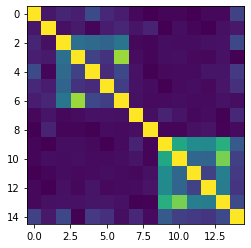

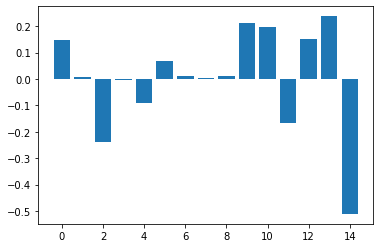

(15,)


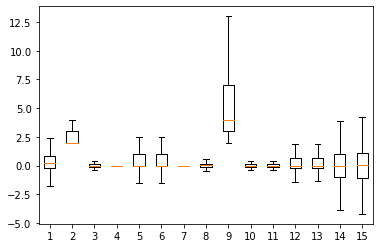

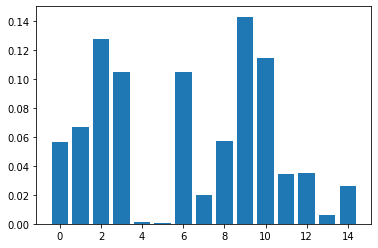

mean:0.409 | std:1.264 | ptp:27.3
mean:2.676 | std:1.759 | ptp:26.0
mean:-0.000 | std:0.533 | ptp:11.9
mean:0.007 | std:0.332 | ptp:8.9
mean:0.270 | std:0.577 | ptp:13.0
mean:0.252 | std:0.547 | ptp:7.5
mean:0.006 | std:0.340 | ptp:5.3
mean:0.015 | std:0.209 | ptp:2.2
mean:5.550 | std:4.651 | ptp:52.0
mean:0.001 | std:0.321 | ptp:4.7
mean:0.003 | std:0.271 | ptp:3.5
mean:0.180 | std:0.764 | ptp:16.5
mean:0.178 | std:0.768 | ptp:19.5
mean:0.010 | std:1.263 | ptp:17.0
mean:0.042 | std:1.784 | ptp:22.1


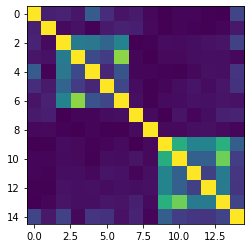

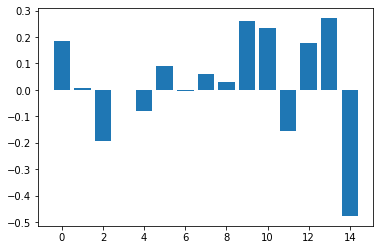

(15,)


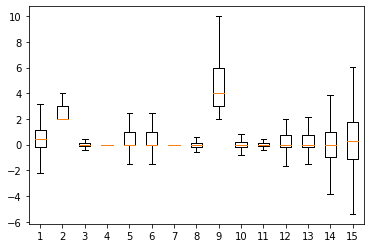

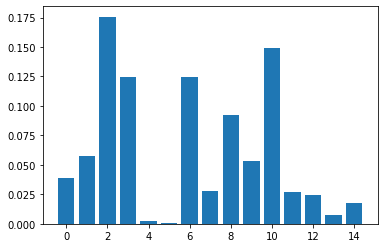

mean:0.551 | std:1.200 | ptp:15.6
mean:2.613 | std:1.492 | ptp:18.0
mean:0.004 | std:0.635 | ptp:11.4
mean:0.011 | std:0.321 | ptp:6.8
mean:0.272 | std:0.570 | ptp:9.0
mean:0.269 | std:0.556 | ptp:5.0
mean:0.013 | std:0.373 | ptp:5.3
mean:-0.003 | std:0.245 | ptp:3.4
mean:5.248 | std:4.517 | ptp:49.0
mean:0.003 | std:0.406 | ptp:7.4
mean:0.005 | std:0.318 | ptp:4.9
mean:0.198 | std:0.865 | ptp:29.5
mean:0.225 | std:0.853 | ptp:21.0
mean:0.016 | std:1.330 | ptp:13.6
mean:0.364 | std:2.262 | ptp:23.2


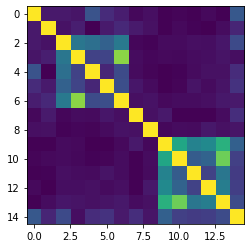

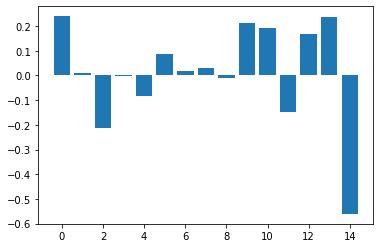

(15,)


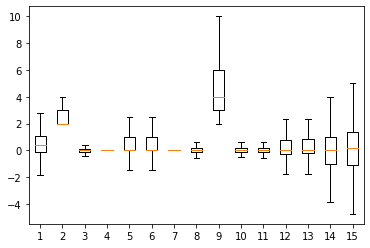

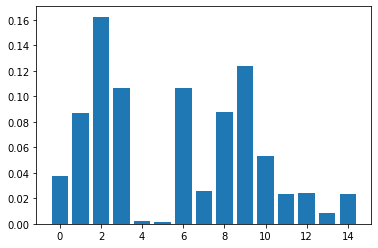

mean:0.546 | std:1.022 | ptp:11.3
mean:2.896 | std:2.003 | ptp:22.0
mean:-0.002 | std:0.642 | ptp:12.4
mean:-0.000 | std:0.300 | ptp:7.5
mean:0.293 | std:0.593 | ptp:13.5
mean:0.243 | std:0.552 | ptp:5.7
mean:-0.002 | std:0.362 | ptp:6.7
mean:0.008 | std:0.241 | ptp:3.9
mean:5.234 | std:4.391 | ptp:55.0
mean:0.004 | std:0.390 | ptp:4.6
mean:0.004 | std:0.318 | ptp:6.7
mean:0.210 | std:0.905 | ptp:27.5
mean:0.234 | std:0.841 | ptp:16.5
mean:0.006 | std:1.330 | ptp:12.8
mean:0.194 | std:2.020 | ptp:24.2


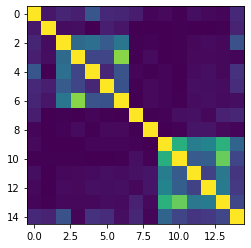

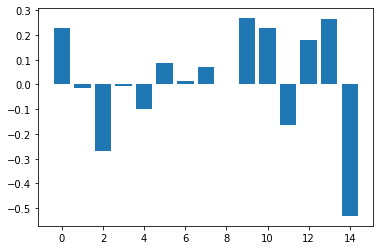

(15,)


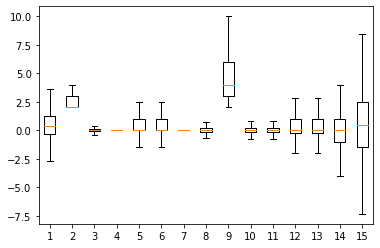

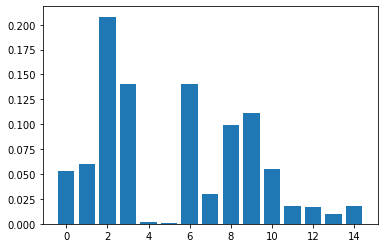

mean:0.590 | std:1.584 | ptp:16.3
mean:2.718 | std:1.564 | ptp:21.0
mean:-0.004 | std:0.947 | ptp:28.1
mean:-0.014 | std:0.518 | ptp:12.5
mean:0.331 | std:0.600 | ptp:13.5
mean:0.266 | std:0.565 | ptp:5.0
mean:-0.009 | std:0.399 | ptp:5.1
mean:0.016 | std:0.303 | ptp:5.3
mean:5.418 | std:4.964 | ptp:69.0
mean:-0.005 | std:0.550 | ptp:11.6
mean:-0.002 | std:0.422 | ptp:6.5
mean:0.276 | std:0.981 | ptp:41.0
mean:0.246 | std:0.911 | ptp:28.0
mean:-0.023 | std:1.481 | ptp:13.8
mean:0.577 | std:3.164 | ptp:50.0


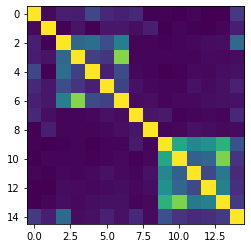

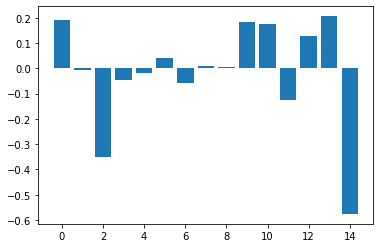

(15,)


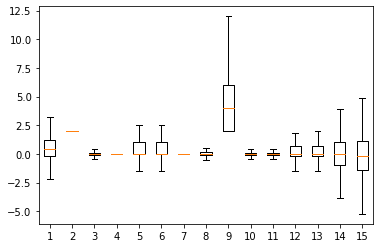

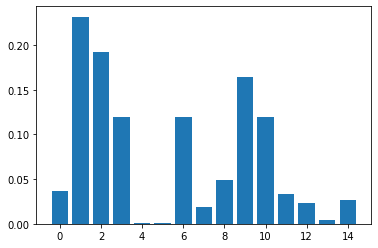

mean:0.569 | std:1.210 | ptp:11.5
mean:2.600 | std:2.237 | ptp:24.0
mean:-0.005 | std:0.792 | ptp:15.6
mean:0.017 | std:0.361 | ptp:11.4
mean:0.313 | std:0.631 | ptp:12.5
mean:0.237 | std:0.548 | ptp:9.5
mean:0.020 | std:0.363 | ptp:4.7
mean:0.007 | std:0.204 | ptp:2.4
mean:4.984 | std:4.090 | ptp:54.0
mean:-0.002 | std:0.336 | ptp:3.8
mean:-0.004 | std:0.276 | ptp:3.0
mean:0.199 | std:0.861 | ptp:27.2
mean:0.179 | std:0.791 | ptp:22.0
mean:-0.017 | std:1.239 | ptp:12.3
mean:-0.113 | std:2.193 | ptp:30.5


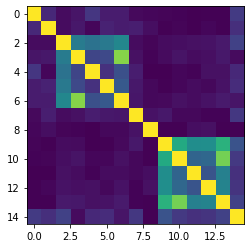

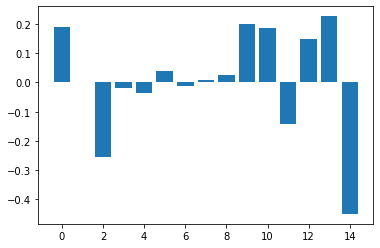

(15,)


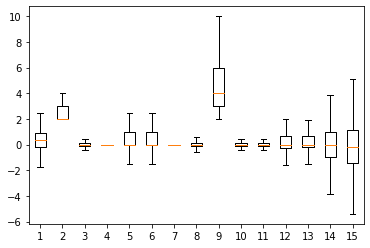

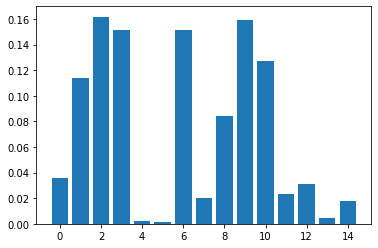

mean:0.389 | std:0.921 | ptp:10.4
mean:2.989 | std:2.096 | ptp:27.0
mean:-0.001 | std:0.547 | ptp:14.4
mean:-0.000 | std:0.348 | ptp:6.7
mean:0.262 | std:0.579 | ptp:12.0
mean:0.228 | std:0.554 | ptp:9.5
mean:-0.003 | std:0.428 | ptp:5.8
mean:-0.002 | std:0.225 | ptp:2.6
mean:5.132 | std:4.037 | ptp:44.0
mean:0.003 | std:0.344 | ptp:4.8
mean:0.005 | std:0.281 | ptp:3.0
mean:0.169 | std:0.778 | ptp:23.5
mean:0.191 | std:0.788 | ptp:19.8
mean:0.014 | std:1.242 | ptp:13.1
mean:-0.161 | std:2.115 | ptp:35.3


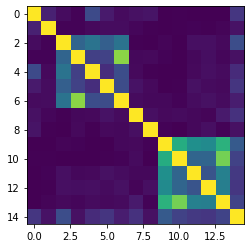

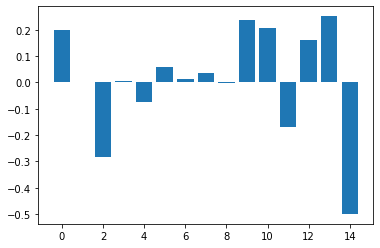

(15,)


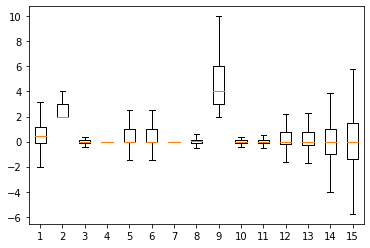

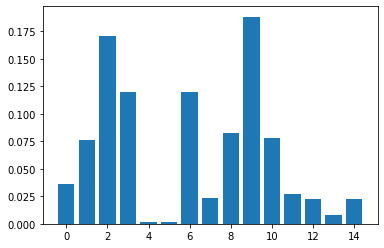

mean:0.634 | std:1.125 | ptp:11.2
mean:2.841 | std:2.047 | ptp:21.0
mean:-0.007 | std:0.701 | ptp:14.8
mean:-0.008 | std:0.340 | ptp:7.3
mean:0.282 | std:0.574 | ptp:9.5
mean:0.241 | std:0.556 | ptp:8.0
mean:-0.003 | std:0.380 | ptp:5.4
mean:0.021 | std:0.234 | ptp:3.9
mean:5.092 | std:4.143 | ptp:58.0
mean:-0.006 | std:0.380 | ptp:7.1
mean:-0.001 | std:0.306 | ptp:5.0
mean:0.202 | std:0.834 | ptp:20.7
mean:0.199 | std:0.841 | ptp:20.0
mean:-0.016 | std:1.315 | ptp:13.6
mean:0.026 | std:2.411 | ptp:31.6


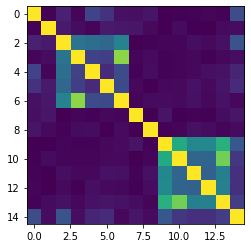

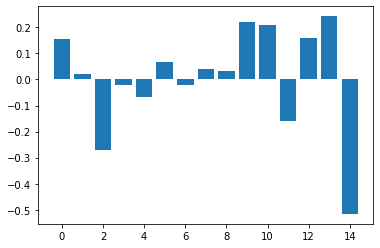

(15,)


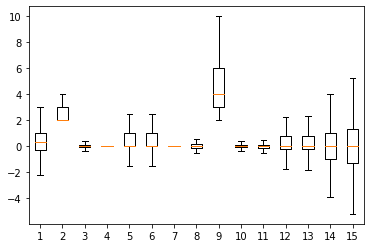

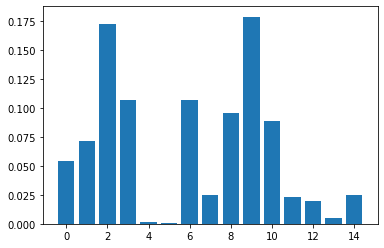

mean:0.379 | std:1.291 | ptp:15.3
mean:2.613 | std:1.182 | ptp:12.0
mean:0.005 | std:0.650 | ptp:18.9
mean:0.002 | std:0.351 | ptp:13.0
mean:0.269 | std:0.560 | ptp:6.0
mean:0.278 | std:0.558 | ptp:5.5
mean:0.003 | std:0.347 | ptp:4.5
mean:0.010 | std:0.214 | ptp:2.4
mean:5.311 | std:4.548 | ptp:59.0
mean:0.003 | std:0.363 | ptp:5.3
mean:-0.006 | std:0.284 | ptp:4.0
mean:0.201 | std:0.865 | ptp:31.0
mean:0.214 | std:0.865 | ptp:46.0
mean:-0.018 | std:1.295 | ptp:14.4
mean:0.037 | std:2.180 | ptp:44.2


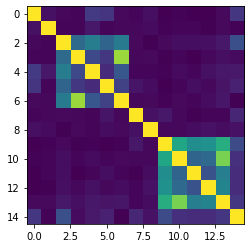

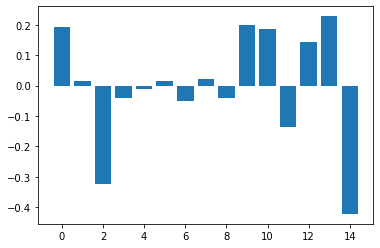

(15,)


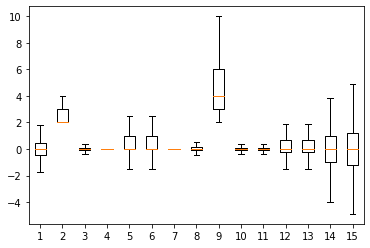

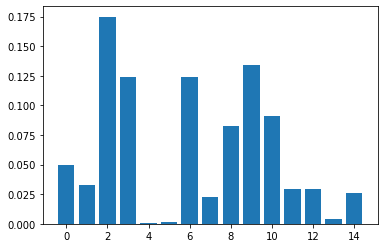

mean:0.043 | std:0.837 | ptp:7.7
mean:2.470 | std:0.934 | ptp:14.0
mean:0.000 | std:0.575 | ptp:11.5
mean:0.016 | std:0.302 | ptp:5.8
mean:0.216 | std:0.531 | ptp:6.5
mean:0.233 | std:0.544 | ptp:5.0
mean:0.021 | std:0.370 | ptp:4.0
mean:0.026 | std:0.200 | ptp:1.8
mean:5.023 | std:3.879 | ptp:52.0
mean:0.002 | std:0.309 | ptp:4.3
mean:0.003 | std:0.250 | ptp:3.2
mean:0.186 | std:0.778 | ptp:23.5
mean:0.183 | std:0.757 | ptp:21.7
mean:-0.001 | std:1.195 | ptp:11.8
mean:0.036 | std:2.055 | ptp:21.4


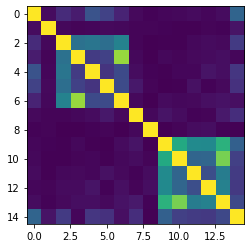

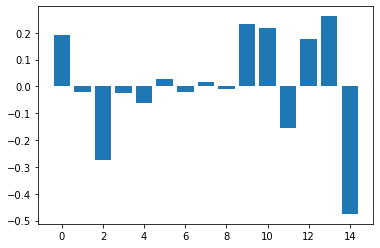

(15,)


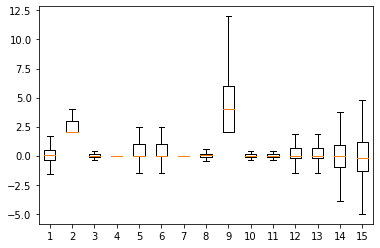

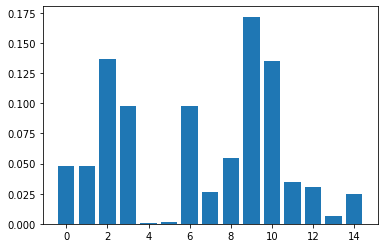

mean:0.065 | std:0.778 | ptp:8.2
mean:2.569 | std:1.075 | ptp:14.0
mean:-0.002 | std:0.529 | ptp:11.3
mean:-0.004 | std:0.306 | ptp:7.5
mean:0.244 | std:0.546 | ptp:5.5
mean:0.233 | std:0.557 | ptp:9.0
mean:-0.002 | std:0.337 | ptp:4.4
mean:0.022 | std:0.218 | ptp:2.8
mean:5.123 | std:4.117 | ptp:63.0
mean:0.003 | std:0.371 | ptp:6.2
mean:-0.004 | std:0.294 | ptp:4.5
mean:0.195 | std:0.825 | ptp:21.8
mean:0.191 | std:0.796 | ptp:19.0
mean:-0.015 | std:1.225 | ptp:12.5
mean:-0.065 | std:2.054 | ptp:27.9


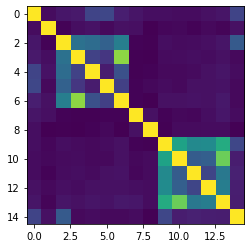

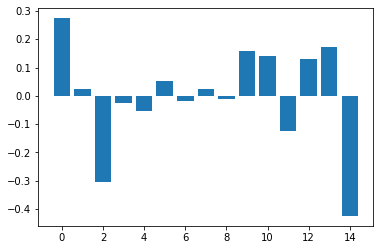

(15,)


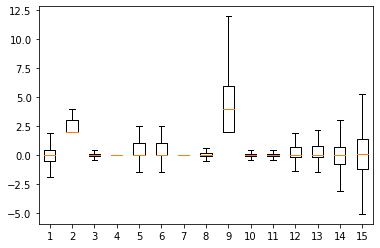

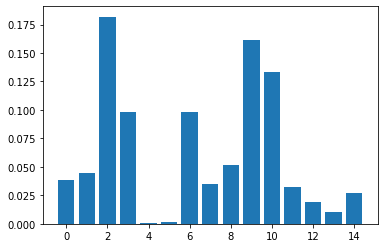

mean:-0.028 | std:0.865 | ptp:11.0
mean:2.579 | std:1.168 | ptp:13.0
mean:0.008 | std:0.629 | ptp:12.9
mean:0.022 | std:0.319 | ptp:9.0
mean:0.255 | std:0.560 | ptp:8.0
mean:0.262 | std:0.579 | ptp:7.5
mean:0.023 | std:0.333 | ptp:5.3
mean:0.021 | std:0.252 | ptp:4.7
mean:4.930 | std:4.253 | ptp:54.0
mean:0.006 | std:0.355 | ptp:6.6
mean:-0.006 | std:0.296 | ptp:5.0
mean:0.197 | std:0.773 | ptp:20.0
mean:0.197 | std:0.753 | ptp:21.1
mean:-0.008 | std:1.087 | ptp:10.7
mean:0.107 | std:2.208 | ptp:27.8


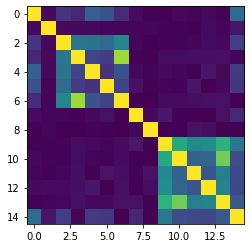

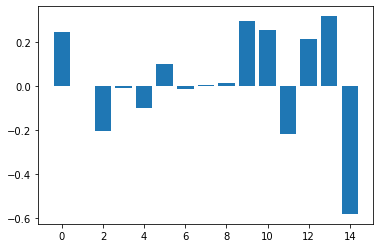

(15,)


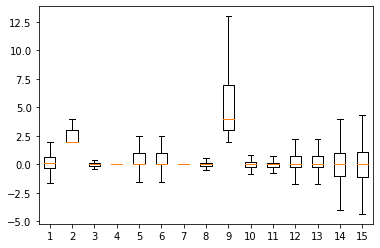

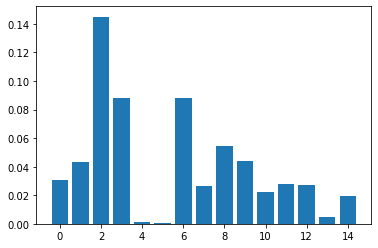

mean:0.182 | std:0.779 | ptp:9.0
mean:2.531 | std:0.982 | ptp:14.0
mean:0.000 | std:0.541 | ptp:12.6
mean:0.009 | std:0.304 | ptp:6.9
mean:0.261 | std:0.569 | ptp:7.5
mean:0.255 | std:0.566 | ptp:8.0
mean:0.014 | std:0.317 | ptp:4.8
mean:0.025 | std:0.229 | ptp:2.9
mean:5.416 | std:4.388 | ptp:65.0
mean:-0.000 | std:0.388 | ptp:5.9
mean:-0.005 | std:0.308 | ptp:4.6
mean:0.215 | std:0.870 | ptp:21.0
mean:0.191 | std:0.856 | ptp:19.5
mean:-0.006 | std:1.373 | ptp:12.9
mean:0.007 | std:1.764 | ptp:23.5


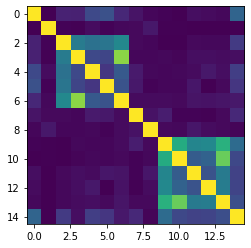

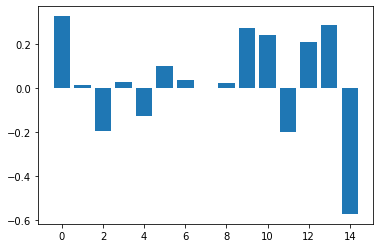

(15,)


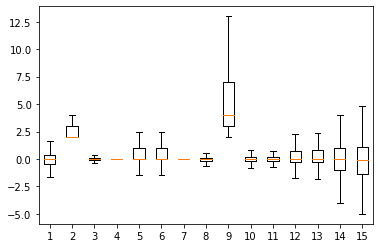

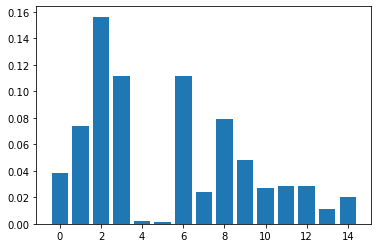

mean:-0.048 | std:0.739 | ptp:7.0
mean:2.736 | std:1.245 | ptp:14.0
mean:0.009 | std:0.578 | ptp:13.6
mean:0.009 | std:0.366 | ptp:13.2
mean:0.250 | std:0.562 | ptp:6.0
mean:0.275 | std:0.579 | ptp:7.5
mean:0.010 | std:0.370 | ptp:5.7
mean:-0.012 | std:0.238 | ptp:2.6
mean:6.089 | std:5.691 | ptp:96.0
mean:0.005 | std:0.399 | ptp:5.0
mean:0.007 | std:0.318 | ptp:4.6
mean:0.201 | std:0.919 | ptp:25.5
mean:0.217 | std:0.916 | ptp:40.5
mean:0.035 | std:1.485 | ptp:15.6
mean:-0.112 | std:1.997 | ptp:28.7


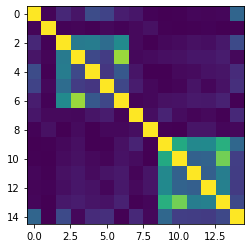

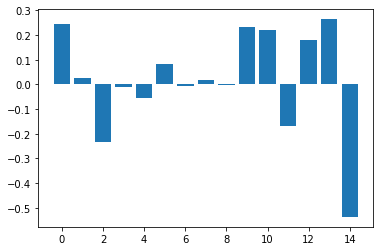

(15,)


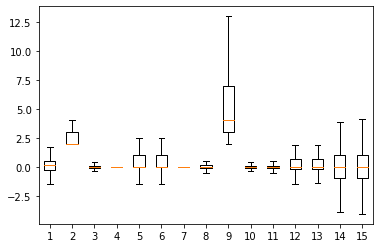

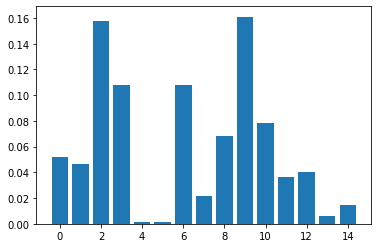

mean:0.115 | std:0.752 | ptp:9.6
mean:2.569 | std:1.286 | ptp:13.0
mean:-0.000 | std:0.523 | ptp:13.9
mean:0.015 | std:0.322 | ptp:10.1
mean:0.253 | std:0.560 | ptp:9.5
mean:0.254 | std:0.557 | ptp:8.2
mean:0.017 | std:0.355 | ptp:5.8
mean:0.019 | std:0.209 | ptp:2.1
mean:5.856 | std:5.009 | ptp:89.0
mean:-0.001 | std:0.334 | ptp:5.3
mean:-0.004 | std:0.272 | ptp:3.1
mean:0.195 | std:0.868 | ptp:33.5
mean:0.174 | std:0.856 | ptp:32.0
mean:-0.037 | std:1.339 | ptp:13.1
mean:0.035 | std:1.605 | ptp:24.8


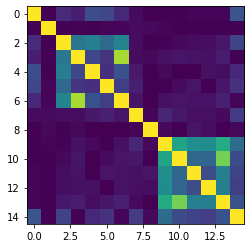

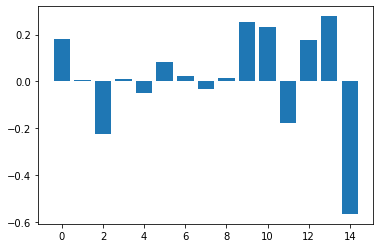

(15,)


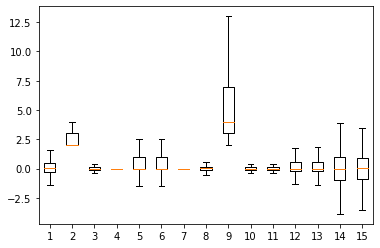

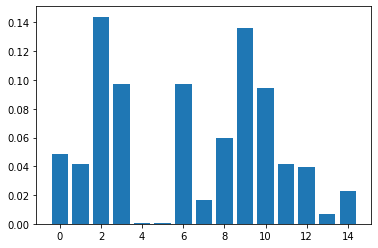

mean:0.068 | std:0.714 | ptp:8.6
mean:2.511 | std:1.036 | ptp:16.0
mean:0.001 | std:0.456 | ptp:10.1
mean:0.015 | std:0.292 | ptp:7.8
mean:0.241 | std:0.563 | ptp:13.5
mean:0.230 | std:0.546 | ptp:10.0
mean:0.018 | std:0.325 | ptp:4.7
mean:0.011 | std:0.208 | ptp:2.3
mean:5.671 | std:4.766 | ptp:55.0
mean:0.007 | std:0.307 | ptp:3.9
mean:0.003 | std:0.252 | ptp:2.8
mean:0.163 | std:0.787 | ptp:19.0
mean:0.172 | std:0.792 | ptp:25.0
mean:0.023 | std:1.248 | ptp:13.5
mean:-0.024 | std:1.420 | ptp:16.7


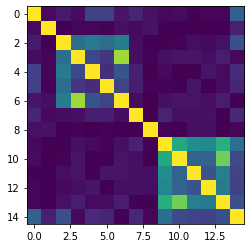

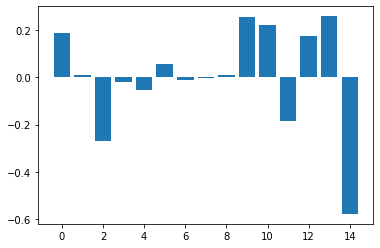

(15,)


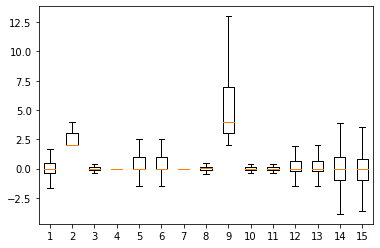

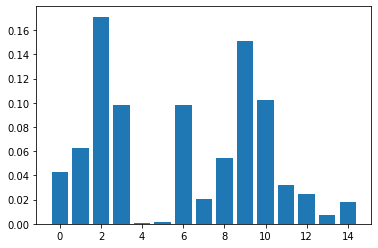

mean:0.024 | std:0.766 | ptp:7.9
mean:2.735 | std:1.613 | ptp:20.0
mean:-0.000 | std:0.515 | ptp:10.3
mean:0.011 | std:0.279 | ptp:9.4
mean:0.260 | std:0.570 | ptp:8.0
mean:0.239 | std:0.558 | ptp:10.0
mean:0.012 | std:0.333 | ptp:5.5
mean:0.006 | std:0.202 | ptp:2.0
mean:5.562 | std:4.621 | ptp:67.0
mean:-0.000 | std:0.320 | ptp:5.4
mean:-0.002 | std:0.264 | ptp:4.3
mean:0.179 | std:0.802 | ptp:23.0
mean:0.173 | std:0.837 | ptp:32.0
mean:-0.009 | std:1.325 | ptp:14.9
mean:-0.060 | std:1.460 | ptp:18.6


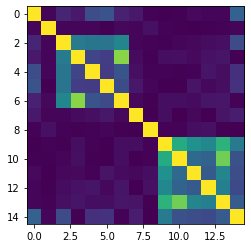

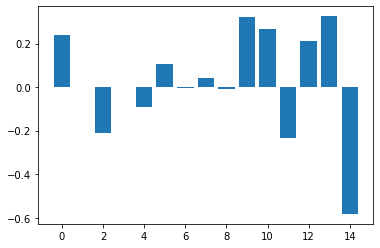

(15,)


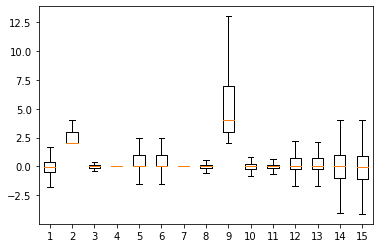

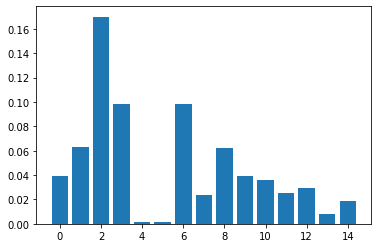

mean:-0.028 | std:0.775 | ptp:7.5
mean:2.722 | std:1.487 | ptp:20.0
mean:-0.000 | std:0.601 | ptp:12.4
mean:0.013 | std:0.315 | ptp:10.2
mean:0.289 | std:0.603 | ptp:12.5
mean:0.272 | std:0.586 | ptp:9.0
mean:0.012 | std:0.339 | ptp:5.8
mean:0.005 | std:0.227 | ptp:2.6
mean:5.704 | std:4.857 | ptp:55.0
mean:0.001 | std:0.372 | ptp:5.0
mean:-0.003 | std:0.296 | ptp:3.0
mean:0.194 | std:0.837 | ptp:22.5
mean:0.197 | std:0.905 | ptp:34.8
mean:-0.014 | std:1.412 | ptp:13.7
mean:-0.083 | std:1.652 | ptp:24.5


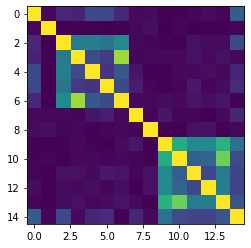

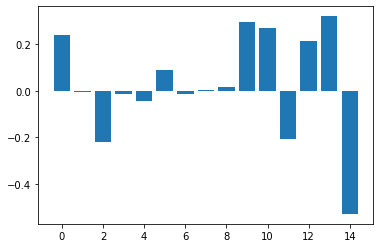

(15,)


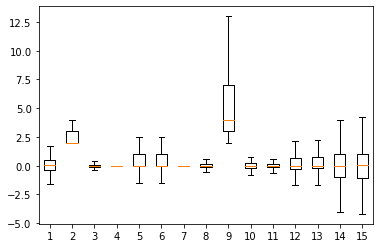

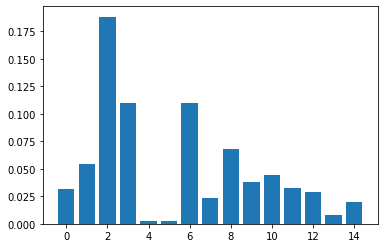

mean:0.056 | std:0.713 | ptp:7.9
mean:2.614 | std:1.289 | ptp:19.0
mean:0.003 | std:0.575 | ptp:11.5
mean:0.019 | std:0.352 | ptp:8.8
mean:0.254 | std:0.592 | ptp:13.5
mean:0.270 | std:0.591 | ptp:12.0
mean:0.018 | std:0.353 | ptp:6.1
mean:0.006 | std:0.239 | ptp:3.3
mean:5.802 | std:5.289 | ptp:85.0
mean:0.003 | std:0.375 | ptp:5.5
mean:0.002 | std:0.299 | ptp:4.4
mean:0.198 | std:0.874 | ptp:23.5
mean:0.213 | std:0.886 | ptp:25.5
mean:-0.007 | std:1.409 | ptp:13.7
mean:0.003 | std:1.695 | ptp:20.2


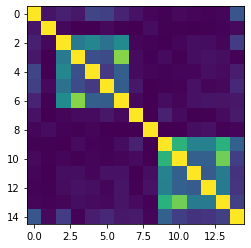

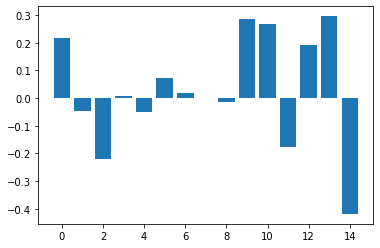

(15,)


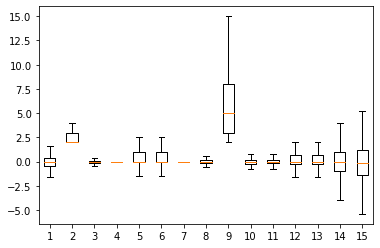

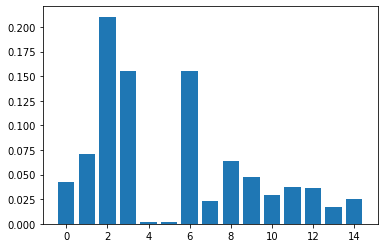

mean:-0.022 | std:0.720 | ptp:7.9
mean:2.751 | std:1.530 | ptp:21.0
mean:0.003 | std:0.583 | ptp:12.0
mean:0.006 | std:0.377 | ptp:7.6
mean:0.241 | std:0.581 | ptp:9.7
mean:0.242 | std:0.589 | ptp:11.0
mean:0.004 | std:0.432 | ptp:6.0
mean:0.010 | std:0.237 | ptp:4.1
mean:6.390 | std:5.677 | ptp:59.0
mean:0.004 | std:0.397 | ptp:9.0
mean:0.004 | std:0.321 | ptp:6.3
mean:0.194 | std:0.935 | ptp:28.5
mean:0.196 | std:0.941 | ptp:26.0
mean:0.011 | std:1.581 | ptp:16.1
mean:-0.081 | std:2.227 | ptp:28.1


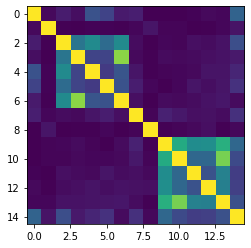

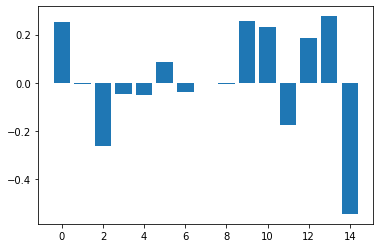

(15,)


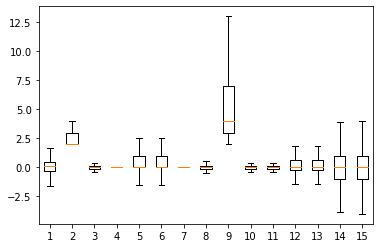

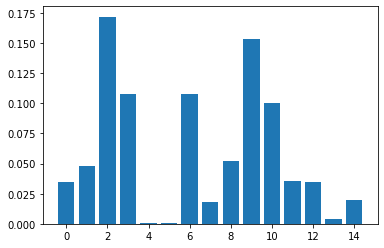

mean:0.084 | std:0.720 | ptp:7.1
mean:2.551 | std:1.038 | ptp:14.0
mean:-0.000 | std:0.545 | ptp:11.0
mean:0.002 | std:0.311 | ptp:9.4
mean:0.281 | std:0.573 | ptp:5.5
mean:0.231 | std:0.548 | ptp:6.0
mean:0.006 | std:0.350 | ptp:5.6
mean:-0.005 | std:0.206 | ptp:2.4
mean:5.480 | std:4.568 | ptp:83.0
mean:0.004 | std:0.322 | ptp:4.4
mean:0.004 | std:0.260 | ptp:3.2
mean:0.159 | std:0.786 | ptp:20.5
mean:0.174 | std:0.769 | ptp:18.0
mean:0.026 | std:1.240 | ptp:12.7
mean:-0.006 | std:1.599 | ptp:21.9


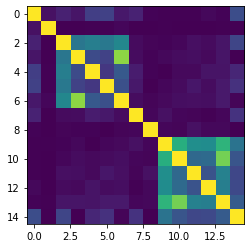

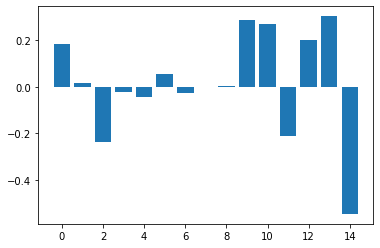

(15,)


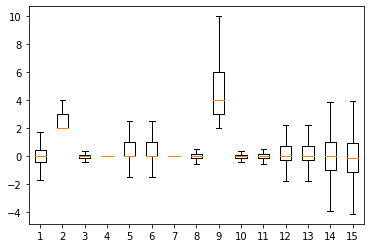

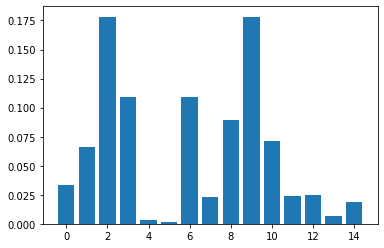

mean:0.044 | std:0.762 | ptp:8.4
mean:2.681 | std:1.688 | ptp:21.0
mean:-0.000 | std:0.544 | ptp:10.8
mean:0.008 | std:0.306 | ptp:7.7
mean:0.250 | std:0.588 | ptp:8.5
mean:0.242 | std:0.565 | ptp:10.5
mean:0.014 | std:0.358 | ptp:5.6
mean:-0.005 | std:0.224 | ptp:2.3
mean:5.302 | std:4.319 | ptp:51.0
mean:-0.001 | std:0.361 | ptp:4.9
mean:0.001 | std:0.287 | ptp:4.2
mean:0.197 | std:0.811 | ptp:17.7
mean:0.192 | std:0.831 | ptp:23.3
mean:0.004 | std:1.328 | ptp:14.3
mean:-0.067 | std:1.626 | ptp:17.9


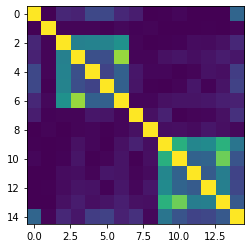

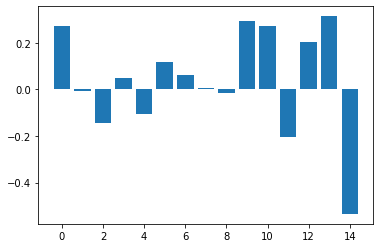

(15,)


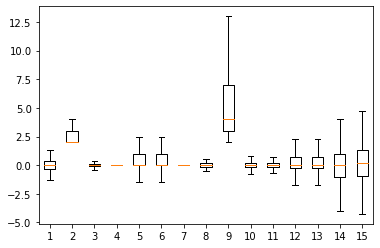

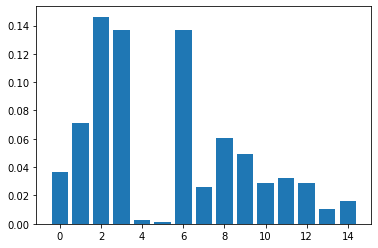

mean:0.039 | std:0.592 | ptp:8.8
mean:2.672 | std:1.345 | ptp:16.0
mean:-0.006 | std:0.485 | ptp:10.2
mean:-0.001 | std:0.329 | ptp:6.8
mean:0.245 | std:0.579 | ptp:9.0
mean:0.231 | std:0.571 | ptp:9.0
mean:-0.003 | std:0.409 | ptp:6.8
mean:0.022 | std:0.234 | ptp:2.6
mean:5.681 | std:4.821 | ptp:61.0
mean:-0.002 | std:0.405 | ptp:7.3
mean:-0.002 | std:0.320 | ptp:5.0
mean:0.209 | std:0.917 | ptp:25.0
mean:0.194 | std:0.874 | ptp:19.5
mean:-0.020 | std:1.482 | ptp:15.1
mean:0.222 | std:1.761 | ptp:19.0


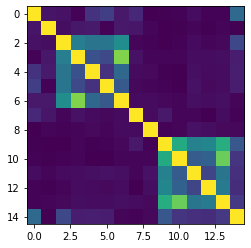

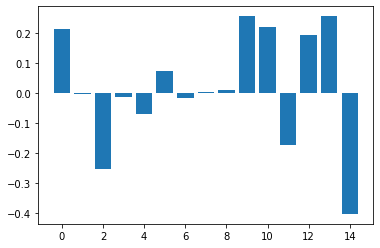

(15,)


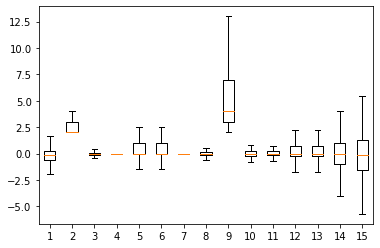

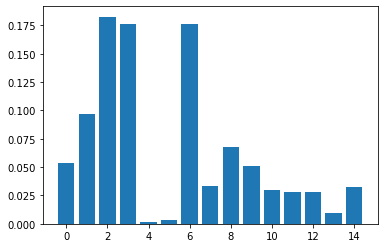

mean:-0.187 | std:0.876 | ptp:10.2
mean:3.006 | std:2.130 | ptp:26.0
mean:0.008 | std:0.668 | ptp:15.0
mean:0.029 | std:0.480 | ptp:11.5
mean:0.245 | std:0.570 | ptp:9.0
mean:0.290 | std:0.623 | ptp:13.5
mean:0.025 | std:0.471 | ptp:6.0
mean:-0.011 | std:0.251 | ptp:2.9
mean:5.936 | std:5.602 | ptp:78.0
mean:0.003 | std:0.405 | ptp:6.7
mean:0.008 | std:0.327 | ptp:4.2
mean:0.196 | std:0.937 | ptp:41.5
mean:0.213 | std:0.893 | ptp:23.0
mean:0.027 | std:1.462 | ptp:14.8
mean:-0.106 | std:2.433 | ptp:31.5


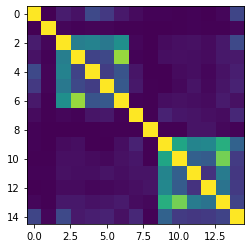

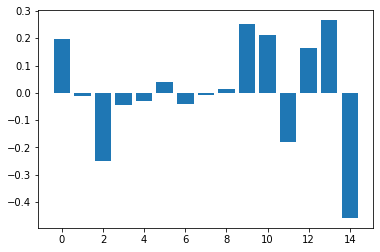

(15,)


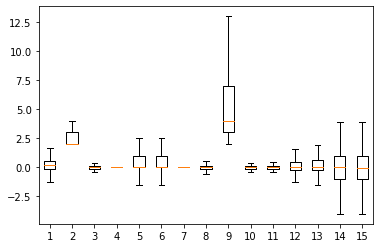

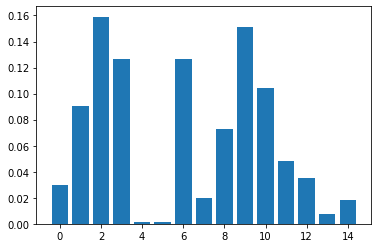

mean:0.197 | std:0.629 | ptp:8.4
mean:2.970 | std:1.872 | ptp:28.0
mean:0.000 | std:0.506 | ptp:10.5
mean:-0.009 | std:0.312 | ptp:9.5
mean:0.251 | std:0.566 | ptp:8.0
mean:0.250 | std:0.555 | ptp:7.5
mean:-0.007 | std:0.399 | ptp:5.6
mean:-0.018 | std:0.223 | ptp:2.3
mean:6.034 | std:5.190 | ptp:64.0
mean:0.002 | std:0.320 | ptp:4.1
mean:0.002 | std:0.271 | ptp:3.3
mean:0.160 | std:0.837 | ptp:33.2
mean:0.200 | std:0.853 | ptp:22.5
mean:0.018 | std:1.318 | ptp:12.4
mean:-0.043 | std:1.583 | ptp:21.1


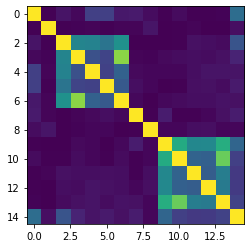

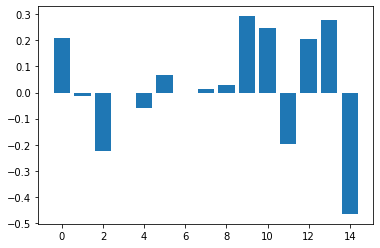

(15,)


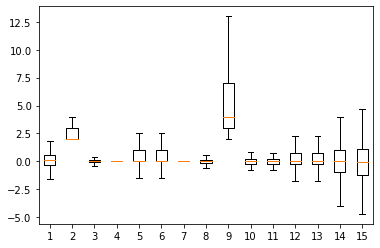

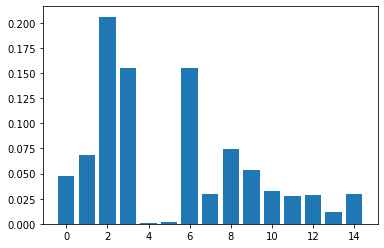

mean:0.079 | std:0.806 | ptp:10.0
mean:2.733 | std:1.251 | ptp:14.0
mean:0.006 | std:0.677 | ptp:14.9
mean:0.018 | std:0.434 | ptp:10.5
mean:0.267 | std:0.582 | ptp:7.0
mean:0.280 | std:0.587 | ptp:7.5
mean:0.019 | std:0.426 | ptp:5.3
mean:0.004 | std:0.250 | ptp:3.7
mean:5.886 | std:5.248 | ptp:59.0
mean:-0.001 | std:0.416 | ptp:5.8
mean:-0.004 | std:0.326 | ptp:5.0
mean:0.188 | std:0.896 | ptp:34.5
mean:0.194 | std:0.892 | ptp:26.8
mean:-0.015 | std:1.469 | ptp:16.1
mean:-0.008 | std:1.994 | ptp:24.1


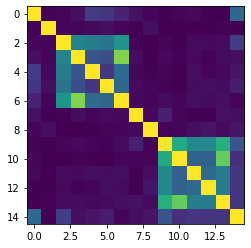

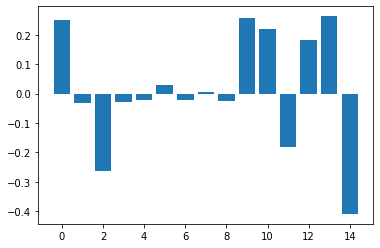

(15,)


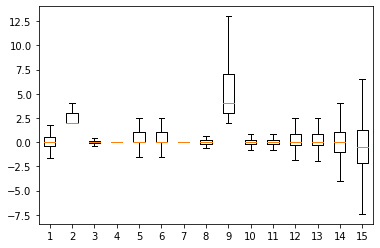

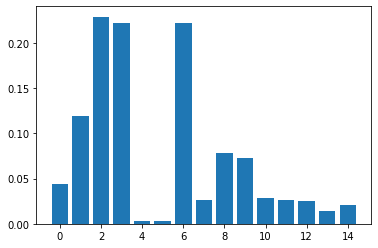

mean:0.086 | std:0.806 | ptp:9.7
mean:3.138 | std:2.082 | ptp:21.0
mean:-0.001 | std:0.738 | ptp:13.7
mean:-0.002 | std:0.510 | ptp:10.1
mean:0.245 | std:0.604 | ptp:16.0
mean:0.255 | std:0.606 | ptp:17.5
mean:0.003 | std:0.532 | ptp:7.3
mean:0.013 | std:0.277 | ptp:3.2
mean:5.978 | std:5.333 | ptp:79.0
mean:-0.001 | std:0.464 | ptp:6.8
mean:-0.003 | std:0.358 | ptp:5.0
mean:0.219 | std:0.952 | ptp:26.5
mean:0.213 | std:0.946 | ptp:30.5
mean:-0.023 | std:1.553 | ptp:15.7
mean:-0.412 | std:2.839 | ptp:28.0


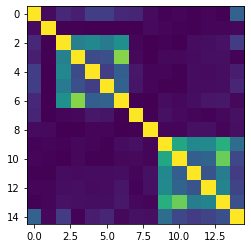

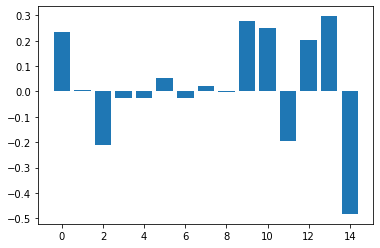

(15,)


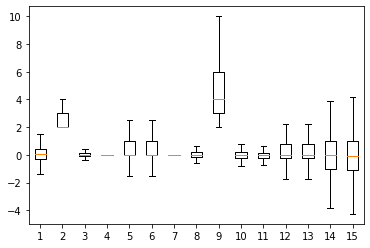

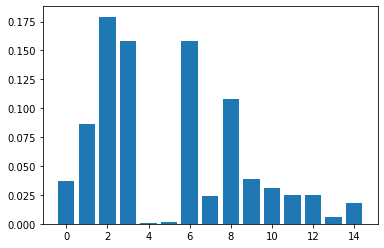

mean:0.083 | std:0.653 | ptp:6.6
mean:2.915 | std:1.407 | ptp:16.0
mean:0.001 | std:0.516 | ptp:10.2
mean:-0.004 | std:0.328 | ptp:7.3
mean:0.256 | std:0.571 | ptp:11.0
mean:0.249 | std:0.573 | ptp:8.0
mean:-0.002 | std:0.436 | ptp:6.6
mean:0.027 | std:0.243 | ptp:2.5
mean:5.497 | std:4.713 | ptp:51.0
mean:0.001 | std:0.373 | ptp:5.2
mean:-0.009 | std:0.299 | ptp:4.1
mean:0.203 | std:0.894 | ptp:23.0
mean:0.188 | std:0.869 | ptp:30.0
mean:-0.031 | std:1.336 | ptp:13.2
mean:-0.041 | std:1.658 | ptp:20.3


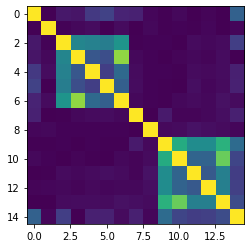

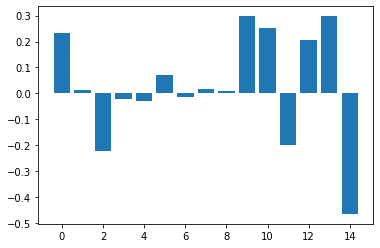

(15,)


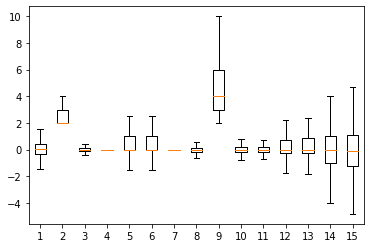

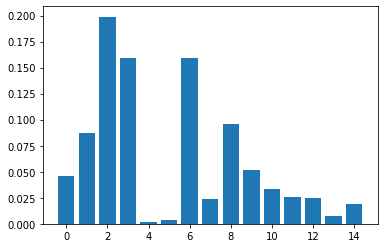

mean:0.050 | std:0.698 | ptp:8.9
mean:2.894 | std:1.708 | ptp:26.0
mean:0.004 | std:0.586 | ptp:10.6
mean:0.009 | std:0.363 | ptp:8.7
mean:0.230 | std:0.570 | ptp:10.0
mean:0.278 | std:0.598 | ptp:10.0
mean:0.013 | std:0.442 | ptp:6.2
mean:-0.038 | std:0.242 | ptp:3.4
mean:5.370 | std:4.462 | ptp:72.0
mean:0.005 | std:0.409 | ptp:5.2
mean:0.007 | std:0.330 | ptp:5.3
mean:0.183 | std:0.861 | ptp:22.5
mean:0.227 | std:0.885 | ptp:23.0
mean:0.021 | std:1.402 | ptp:13.2
mean:-0.046 | std:1.900 | ptp:21.2


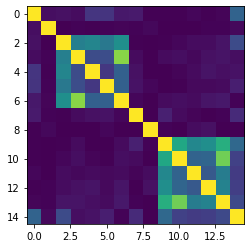

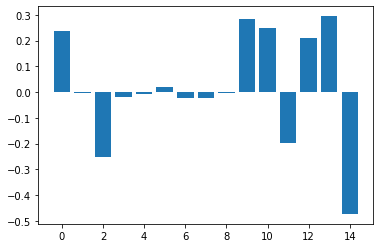

(15,)


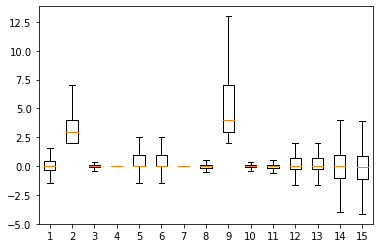

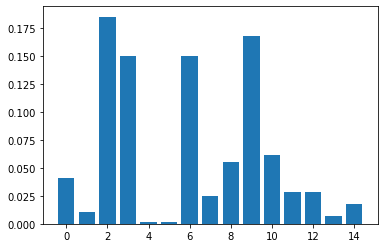

mean:0.043 | std:0.677 | ptp:7.6
mean:2.946 | std:1.316 | ptp:22.0
mean:-0.000 | std:0.548 | ptp:13.6
mean:-0.002 | std:0.319 | ptp:6.2
mean:0.254 | std:0.572 | ptp:9.2
mean:0.258 | std:0.579 | ptp:9.8
mean:-0.001 | std:0.427 | ptp:6.6
mean:0.000 | std:0.216 | ptp:2.4
mean:5.583 | std:5.145 | ptp:201.0
mean:0.004 | std:0.344 | ptp:4.9
mean:-0.002 | std:0.284 | ptp:4.6
mean:0.182 | std:0.889 | ptp:32.5
mean:0.198 | std:0.822 | ptp:24.0
mean:0.004 | std:1.354 | ptp:12.1
mean:-0.076 | std:1.596 | ptp:23.0


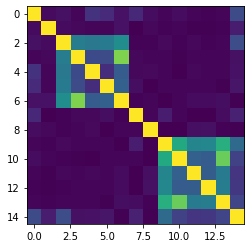

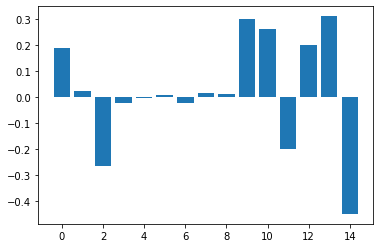

(15,)


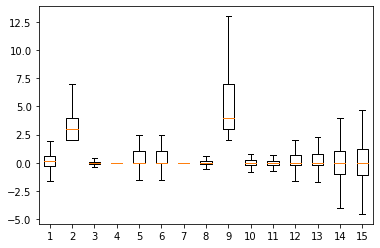

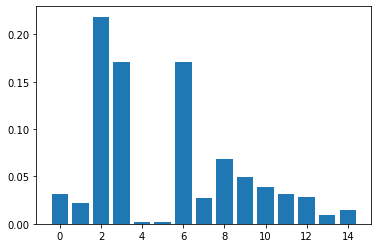

mean:0.177 | std:0.765 | ptp:9.7
mean:3.042 | std:1.673 | ptp:24.0
mean:-0.001 | std:0.610 | ptp:12.5
mean:0.010 | std:0.370 | ptp:9.0
mean:0.266 | std:0.592 | ptp:9.5
mean:0.266 | std:0.592 | ptp:9.0
mean:0.004 | std:0.455 | ptp:5.6
mean:0.011 | std:0.252 | ptp:4.1
mean:5.749 | std:4.649 | ptp:73.0
mean:0.002 | std:0.403 | ptp:5.8
mean:-0.005 | std:0.317 | ptp:4.7
mean:0.193 | std:0.905 | ptp:30.5
mean:0.199 | std:0.901 | ptp:32.0
mean:-0.018 | std:1.428 | ptp:14.9
mean:0.059 | std:1.815 | ptp:24.9


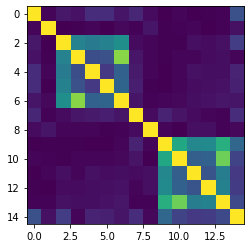

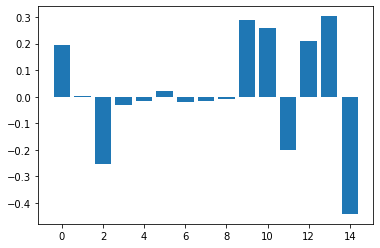

(15,)


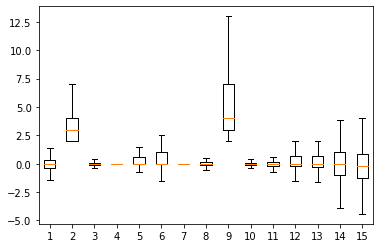

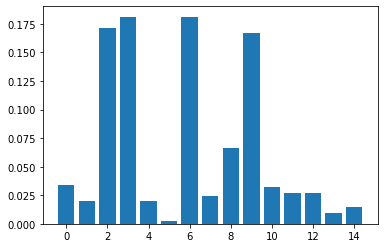

mean:0.015 | std:0.612 | ptp:5.3
mean:3.158 | std:1.889 | ptp:22.0
mean:0.001 | std:0.499 | ptp:9.8
mean:-0.007 | std:0.347 | ptp:6.6
mean:0.207 | std:0.557 | ptp:14.5
mean:0.239 | std:0.575 | ptp:10.0
mean:-0.008 | std:0.470 | ptp:6.3
mean:-0.014 | std:0.227 | ptp:2.5
mean:5.664 | std:4.718 | ptp:50.0
mean:0.001 | std:0.347 | ptp:6.5
mean:-0.009 | std:0.289 | ptp:4.0
mean:0.180 | std:0.874 | ptp:28.0
mean:0.182 | std:0.844 | ptp:24.0
mean:-0.044 | std:1.371 | ptp:13.2
mean:-0.168 | std:1.637 | ptp:18.1


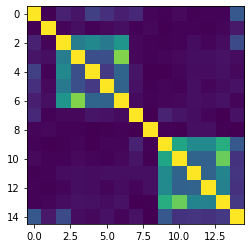

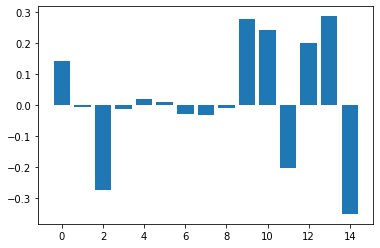

(15,)


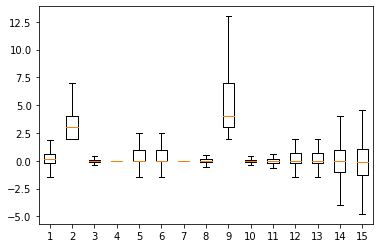

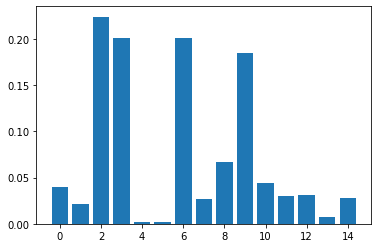

mean:0.223 | std:0.776 | ptp:9.4
mean:3.168 | std:1.758 | ptp:24.0
mean:-0.001 | std:0.593 | ptp:9.8
mean:-0.016 | std:0.393 | ptp:9.4
mean:0.218 | std:0.558 | ptp:9.5
mean:0.226 | std:0.575 | ptp:9.5
mean:-0.011 | std:0.494 | ptp:6.2
mean:-0.005 | std:0.238 | ptp:2.9
mean:5.697 | std:4.919 | ptp:45.0
mean:0.000 | std:0.369 | ptp:6.1
mean:-0.005 | std:0.302 | ptp:4.8
mean:0.176 | std:0.862 | ptp:26.0
mean:0.192 | std:0.882 | ptp:33.0
mean:-0.025 | std:1.381 | ptp:13.1
mean:-0.055 | std:1.976 | ptp:22.2


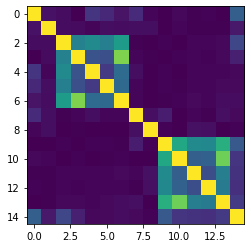

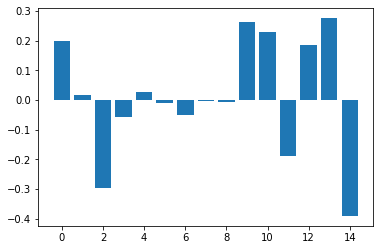

(15,)


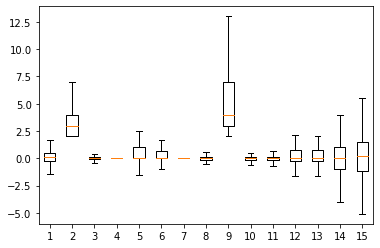

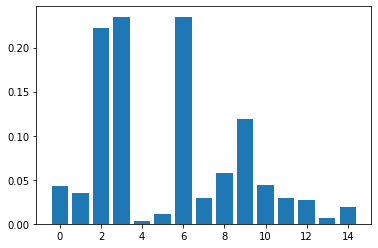

mean:0.097 | std:0.705 | ptp:8.5
mean:3.169 | std:1.940 | ptp:24.0
mean:-0.006 | std:0.605 | ptp:10.8
mean:-0.003 | std:0.483 | ptp:8.2
mean:0.249 | std:0.603 | ptp:12.5
mean:0.197 | std:0.559 | ptp:11.5
mean:0.000 | std:0.537 | ptp:6.4
mean:0.004 | std:0.241 | ptp:3.0
mean:5.468 | std:4.502 | ptp:49.0
mean:-0.003 | std:0.389 | ptp:7.3
mean:-0.005 | std:0.313 | ptp:7.1
mean:0.205 | std:0.856 | ptp:24.0
mean:0.196 | std:0.870 | ptp:33.5
mean:-0.027 | std:1.343 | ptp:14.8
mean:0.174 | std:2.138 | ptp:22.6


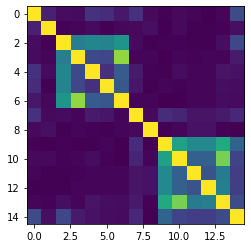

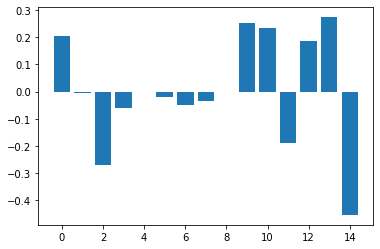

(15,)


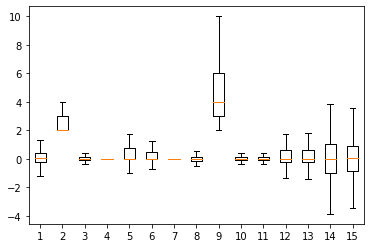

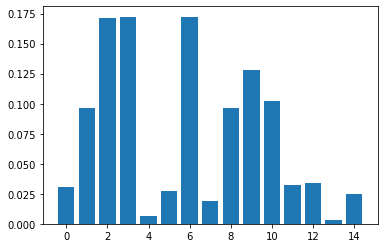

mean:0.065 | std:0.535 | ptp:6.0
mean:2.916 | std:1.588 | ptp:18.0
mean:-0.001 | std:0.432 | ptp:8.4
mean:0.003 | std:0.348 | ptp:8.7
mean:0.210 | std:0.541 | ptp:10.0
mean:0.185 | std:0.528 | ptp:7.0
mean:0.007 | std:0.446 | ptp:6.6
mean:0.010 | std:0.222 | ptp:3.2
mean:5.380 | std:4.498 | ptp:56.0
mean:-0.002 | std:0.303 | ptp:4.9
mean:-0.002 | std:0.260 | ptp:3.1
mean:0.173 | std:0.798 | ptp:25.5
mean:0.172 | std:0.798 | ptp:31.5
mean:-0.022 | std:1.190 | ptp:11.9
mean:0.039 | std:1.437 | ptp:16.9


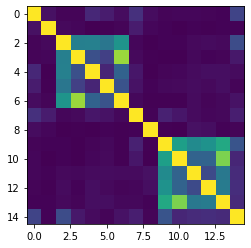

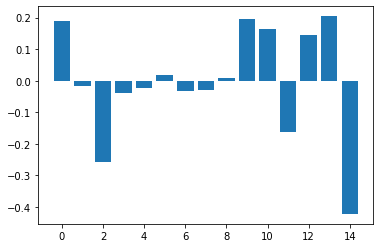

(15,)


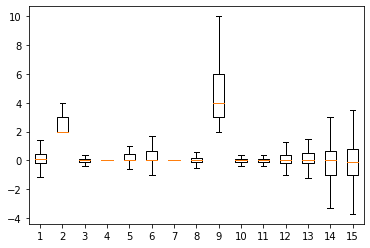

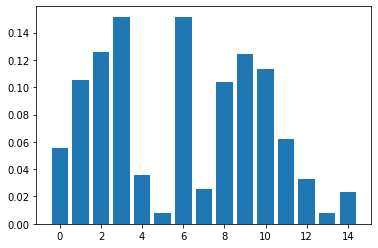

mean:0.134 | std:0.633 | ptp:7.4
mean:2.951 | std:1.608 | ptp:26.0
mean:0.002 | std:0.425 | ptp:8.1
mean:0.020 | std:0.364 | ptp:6.8
mean:0.189 | std:0.532 | ptp:9.5
mean:0.203 | std:0.541 | ptp:9.5
mean:0.023 | std:0.444 | ptp:6.5
mean:0.019 | std:0.231 | ptp:2.7
mean:5.350 | std:4.492 | ptp:50.0
mean:0.001 | std:0.301 | ptp:4.8
mean:-0.017 | std:0.266 | ptp:3.1
mean:0.155 | std:0.723 | ptp:22.5
mean:0.162 | std:0.697 | ptp:21.0
mean:-0.054 | std:1.103 | ptp:10.7
mean:-0.135 | std:1.484 | ptp:15.9


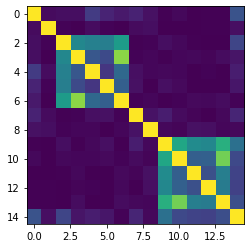

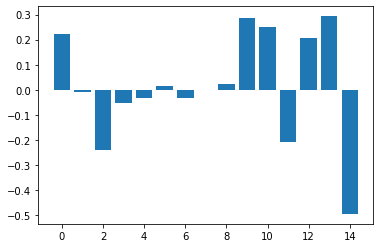

(15,)


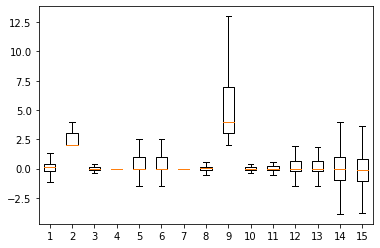

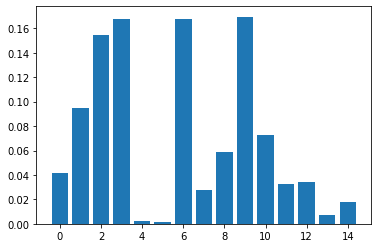

mean:0.131 | std:0.571 | ptp:6.1
mean:2.987 | std:1.996 | ptp:21.0
mean:0.000 | std:0.473 | ptp:11.7
mean:0.017 | std:0.332 | ptp:7.9
mean:0.234 | std:0.570 | ptp:13.5
mean:0.226 | std:0.567 | ptp:13.5
mean:0.018 | std:0.467 | ptp:6.5
mean:0.004 | std:0.231 | ptp:3.6
mean:5.586 | std:4.537 | ptp:51.0
mean:-0.001 | std:0.354 | ptp:5.3
mean:0.007 | std:0.301 | ptp:4.7
mean:0.184 | std:0.803 | ptp:26.2
mean:0.185 | std:0.820 | ptp:28.5
mean:0.031 | std:1.303 | ptp:11.9
mean:-0.104 | std:1.484 | ptp:20.8


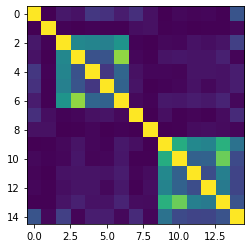

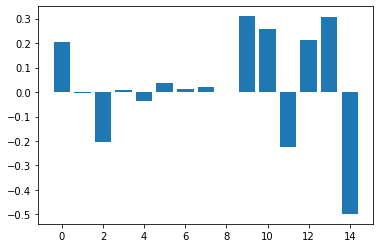

(15,)


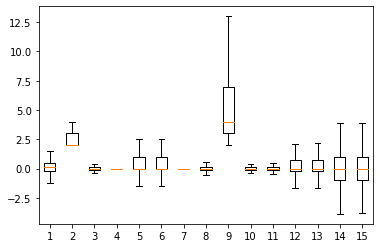

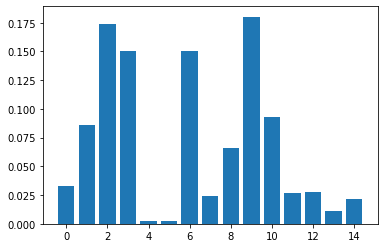

mean:0.146 | std:0.609 | ptp:7.6
mean:2.819 | std:1.218 | ptp:17.0
mean:0.002 | std:0.528 | ptp:12.1
mean:-0.005 | std:0.340 | ptp:8.6
mean:0.224 | std:0.570 | ptp:9.0
mean:0.249 | std:0.583 | ptp:9.0
mean:-0.001 | std:0.446 | ptp:6.5
mean:0.002 | std:0.236 | ptp:3.3
mean:5.718 | std:5.124 | ptp:81.0
mean:-0.002 | std:0.370 | ptp:6.9
mean:0.004 | std:0.293 | ptp:5.5
mean:0.180 | std:0.865 | ptp:25.2
mean:0.208 | std:0.896 | ptp:39.5
mean:0.014 | std:1.412 | ptp:16.6
mean:0.017 | std:1.563 | ptp:21.3


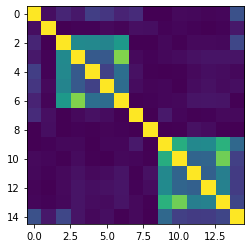

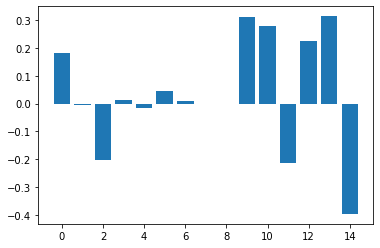

(15,)


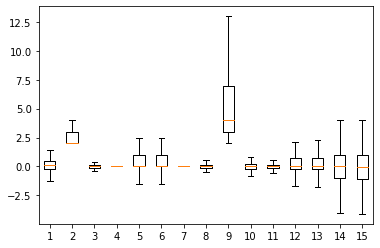

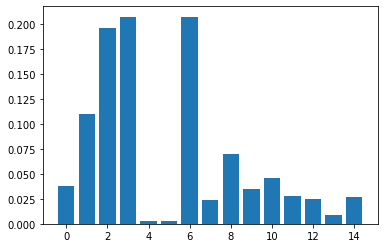

mean:0.123 | std:0.598 | ptp:7.5
mean:3.100 | std:2.055 | ptp:31.0
mean:0.000 | std:0.524 | ptp:10.7
mean:0.013 | std:0.346 | ptp:6.4
mean:0.245 | std:0.605 | ptp:19.0
mean:0.241 | std:0.602 | ptp:11.2
mean:0.014 | std:0.525 | ptp:8.1
mean:0.017 | std:0.225 | ptp:2.8
mean:5.852 | std:4.848 | ptp:71.0
mean:0.001 | std:0.367 | ptp:6.5
mean:-0.005 | std:0.287 | ptp:4.4
mean:0.201 | std:0.887 | ptp:28.0
mean:0.186 | std:0.877 | ptp:29.5
mean:-0.025 | std:1.446 | ptp:15.2
mean:-0.026 | std:1.709 | ptp:20.0


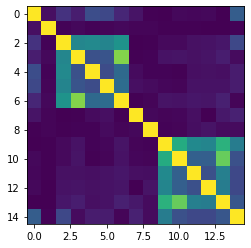

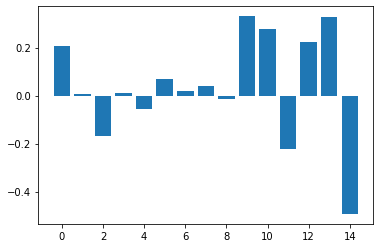

(15,)


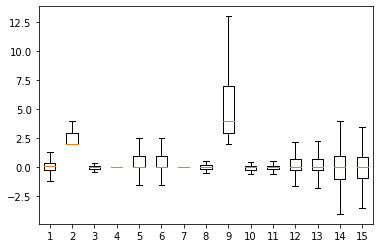

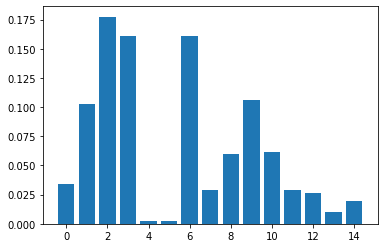

mean:0.107 | std:0.563 | ptp:5.8
mean:3.065 | std:2.025 | ptp:21.0
mean:-0.004 | std:0.519 | ptp:11.2
mean:-0.006 | std:0.311 | ptp:7.5
mean:0.272 | std:0.625 | ptp:20.0
mean:0.260 | std:0.614 | ptp:17.5
mean:-0.009 | std:0.470 | ptp:8.2
mean:0.035 | std:0.233 | ptp:3.1
mean:5.616 | std:4.823 | ptp:77.0
mean:-0.001 | std:0.370 | ptp:7.9
mean:-0.004 | std:0.291 | ptp:6.5
mean:0.215 | std:0.852 | ptp:23.5
mean:0.200 | std:0.892 | ptp:33.5
mean:-0.024 | std:1.410 | ptp:14.7
mean:-0.024 | std:1.406 | ptp:20.4


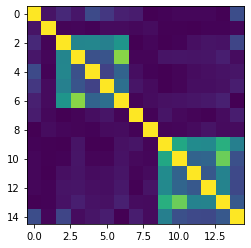

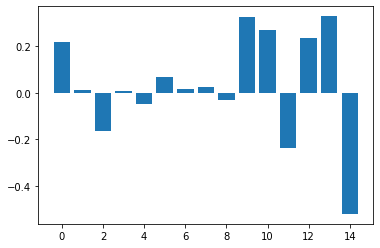

(15,)


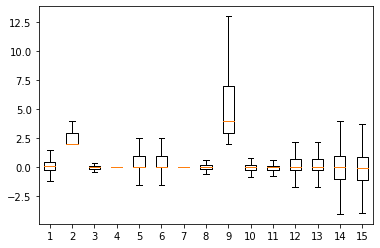

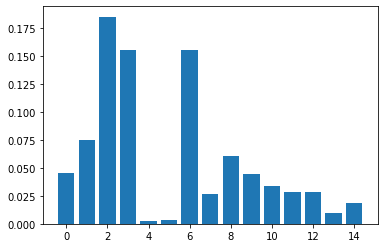

mean:0.161 | std:0.623 | ptp:8.2
mean:2.811 | std:1.553 | ptp:21.0
mean:-0.006 | std:0.528 | ptp:10.6
mean:-0.008 | std:0.333 | ptp:7.3
mean:0.291 | std:0.611 | ptp:12.3
mean:0.260 | std:0.609 | ptp:11.2
mean:-0.015 | std:0.454 | ptp:7.5
mean:0.022 | std:0.255 | ptp:3.2
mean:5.608 | std:4.791 | ptp:79.0
mean:-0.003 | std:0.391 | ptp:6.5
mean:-0.007 | std:0.309 | ptp:4.0
mean:0.207 | std:0.860 | ptp:21.0
mean:0.183 | std:0.868 | ptp:23.5
mean:-0.044 | std:1.402 | ptp:13.1
mean:-0.094 | std:1.511 | ptp:21.8


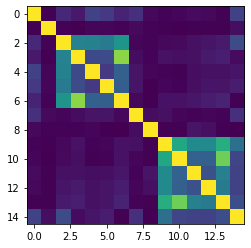

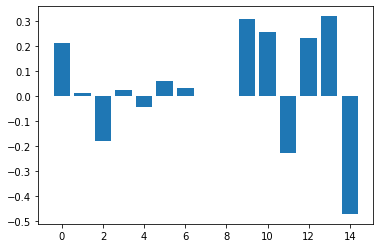

(15,)


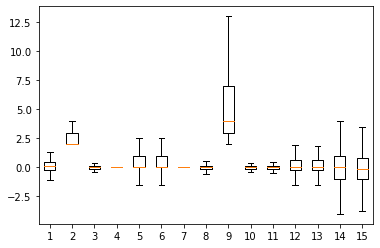

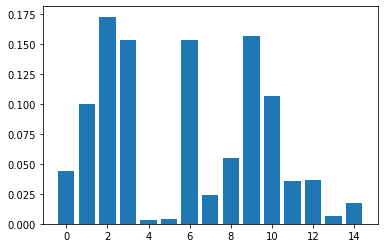

mean:0.129 | std:0.566 | ptp:7.9
mean:2.987 | std:2.057 | ptp:21.0
mean:0.001 | std:0.493 | ptp:10.1
mean:0.006 | std:0.303 | ptp:7.1
mean:0.270 | std:0.607 | ptp:14.0
mean:0.268 | std:0.621 | ptp:17.0
mean:0.009 | std:0.444 | ptp:6.6
mean:0.006 | std:0.240 | ptp:3.8
mean:5.444 | std:4.260 | ptp:51.0
mean:0.003 | std:0.332 | ptp:5.5
mean:-0.005 | std:0.279 | ptp:4.6
mean:0.191 | std:0.828 | ptp:23.5
mean:0.195 | std:0.826 | ptp:20.5
mean:-0.007 | std:1.323 | ptp:11.1
mean:-0.114 | std:1.418 | ptp:18.7


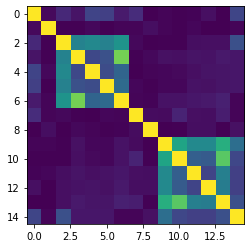

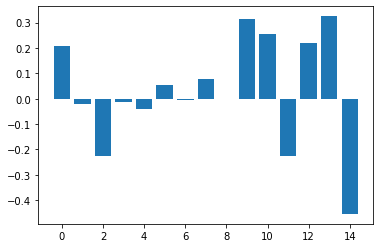

(15,)


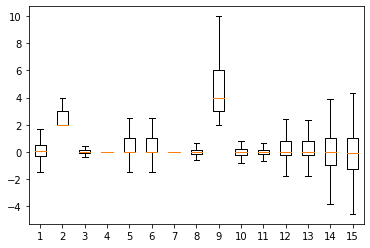

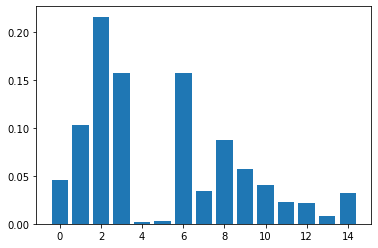

mean:0.085 | std:0.749 | ptp:8.7
mean:2.982 | std:1.604 | ptp:20.0
mean:-0.008 | std:0.676 | ptp:18.4
mean:-0.022 | std:0.427 | ptp:12.0
mean:0.270 | std:0.596 | ptp:12.0
mean:0.265 | std:0.614 | ptp:12.5
mean:-0.018 | std:0.461 | ptp:7.7
mean:0.014 | std:0.277 | ptp:8.1
mean:5.235 | std:4.549 | ptp:54.0
mean:-0.003 | std:0.426 | ptp:9.3
mean:-0.005 | std:0.352 | ptp:18.1
mean:0.225 | std:0.836 | ptp:18.5
mean:0.211 | std:0.852 | ptp:24.5
mean:-0.023 | std:1.358 | ptp:18.6
mean:-0.112 | std:1.963 | ptp:27.3


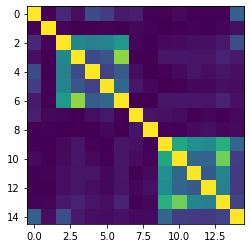

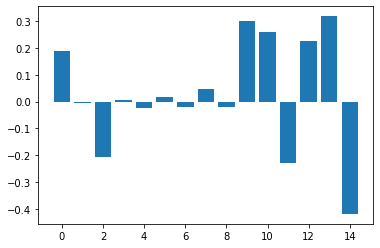

(15,)


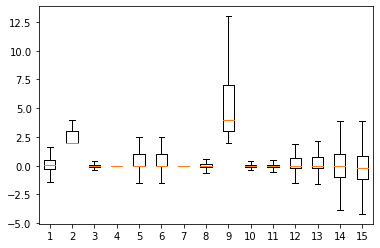

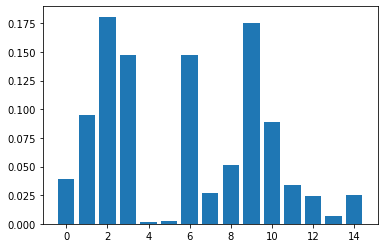

mean:0.107 | std:0.675 | ptp:7.9
mean:2.955 | std:1.663 | ptp:22.0
mean:-0.001 | std:0.548 | ptp:12.2
mean:-0.005 | std:0.351 | ptp:9.9
mean:0.287 | std:0.601 | ptp:14.0
mean:0.249 | std:0.591 | ptp:12.0
mean:-0.007 | std:0.449 | ptp:6.3
mean:-0.003 | std:0.250 | ptp:3.3
mean:5.418 | std:4.399 | ptp:58.0
mean:-0.001 | std:0.355 | ptp:4.8
mean:-0.003 | std:0.285 | ptp:4.4
mean:0.185 | std:0.792 | ptp:18.0
mean:0.199 | std:0.816 | ptp:21.5
mean:-0.011 | std:1.299 | ptp:12.9
mean:-0.131 | std:1.659 | ptp:21.5


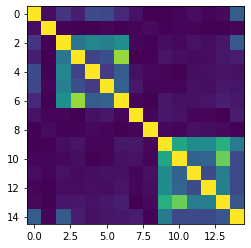

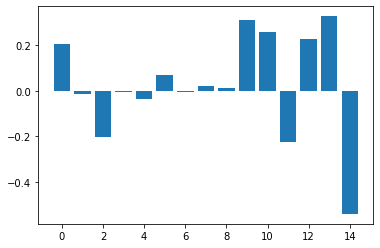

(15,)


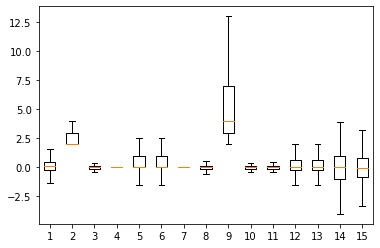

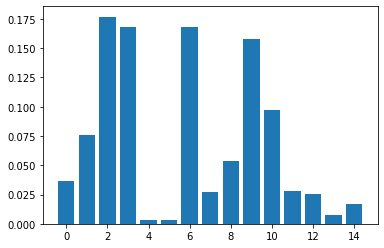

mean:0.116 | std:0.631 | ptp:6.4
mean:2.801 | std:1.406 | ptp:19.0
mean:0.003 | std:0.522 | ptp:11.4
mean:-0.013 | std:0.380 | ptp:7.6
mean:0.262 | std:0.589 | ptp:13.0
mean:0.266 | std:0.603 | ptp:10.0
mean:-0.007 | std:0.438 | ptp:6.0
mean:-0.002 | std:0.229 | ptp:2.4
mean:5.530 | std:4.403 | ptp:69.0
mean:0.003 | std:0.329 | ptp:5.0
mean:0.003 | std:0.265 | ptp:4.4
mean:0.173 | std:0.834 | ptp:25.5
mean:0.196 | std:0.827 | ptp:25.5
mean:0.021 | std:1.348 | ptp:12.1
mean:-0.029 | std:1.295 | ptp:20.6


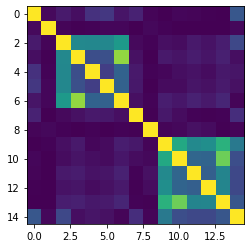

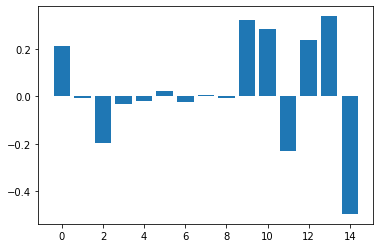

(15,)


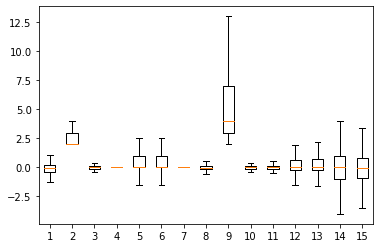

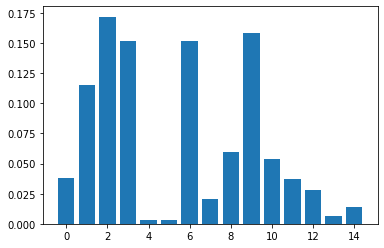

mean:-0.079 | std:0.530 | ptp:6.2
mean:3.041 | std:1.990 | ptp:36.0
mean:0.003 | std:0.481 | ptp:8.0
mean:0.006 | std:0.330 | ptp:7.1
mean:0.228 | std:0.588 | ptp:13.5
mean:0.235 | std:0.606 | ptp:22.5
mean:0.006 | std:0.448 | ptp:6.8
mean:-0.021 | std:0.224 | ptp:2.5
mean:5.763 | std:4.678 | ptp:51.0
mean:0.003 | std:0.332 | ptp:4.5
mean:-0.002 | std:0.269 | ptp:3.5
mean:0.170 | std:0.865 | ptp:34.5
mean:0.203 | std:0.856 | ptp:24.7
mean:0.001 | std:1.379 | ptp:14.7
mean:-0.010 | std:1.328 | ptp:16.4


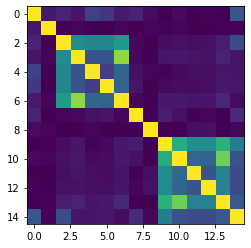

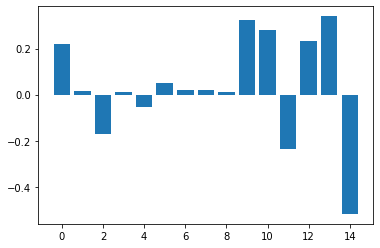

(15,)


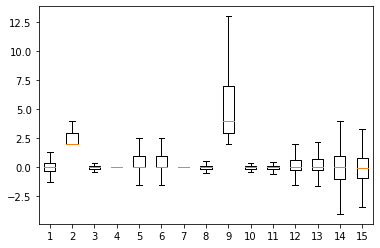

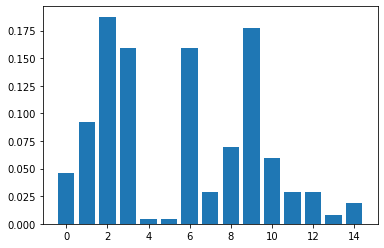

mean:0.063 | std:0.609 | ptp:9.7
mean:2.853 | std:1.477 | ptp:18.0
mean:0.001 | std:0.514 | ptp:11.2
mean:0.009 | std:0.325 | ptp:7.4
mean:0.265 | std:0.615 | ptp:10.0
mean:0.247 | std:0.598 | ptp:9.0
mean:0.007 | std:0.450 | ptp:6.0
mean:0.023 | std:0.228 | ptp:2.5
mean:5.903 | std:5.067 | ptp:69.0
mean:0.002 | std:0.356 | ptp:5.8
mean:-0.004 | std:0.281 | ptp:4.5
mean:0.179 | std:0.836 | ptp:20.8
mean:0.197 | std:0.850 | ptp:30.5
mean:-0.020 | std:1.389 | ptp:14.8
mean:-0.055 | std:1.346 | ptp:17.0


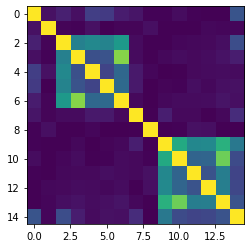

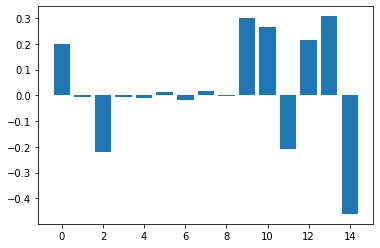

(15,)


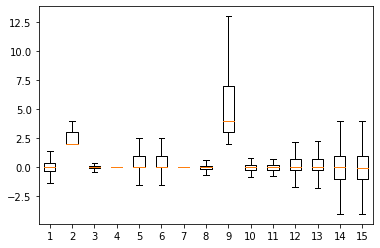

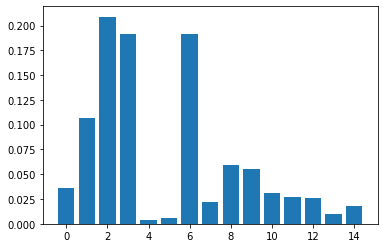

mean:0.048 | std:0.621 | ptp:6.9
mean:3.032 | std:2.063 | ptp:22.0
mean:0.001 | std:0.568 | ptp:11.2
mean:0.005 | std:0.397 | ptp:7.6
mean:0.257 | std:0.611 | ptp:12.5
mean:0.255 | std:0.648 | ptp:16.0
mean:0.002 | std:0.492 | ptp:7.1
mean:-0.016 | std:0.254 | ptp:3.0
mean:5.522 | std:4.793 | ptp:63.0
mean:0.000 | std:0.410 | ptp:6.0
mean:-0.003 | std:0.326 | ptp:4.0
mean:0.207 | std:0.874 | ptp:25.3
mean:0.202 | std:0.868 | ptp:26.8
mean:-0.013 | std:1.416 | ptp:16.7
mean:-0.023 | std:1.576 | ptp:17.6


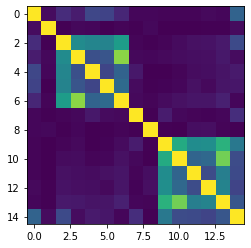

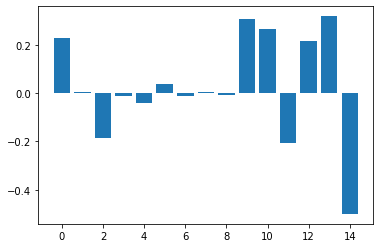

(15,)


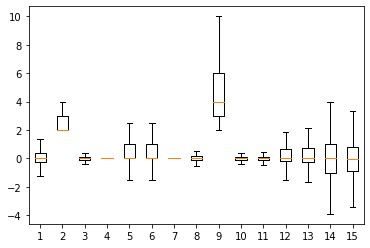

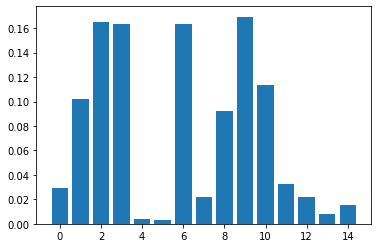

mean:0.055 | std:0.563 | ptp:7.5
mean:2.983 | std:1.869 | ptp:23.0
mean:-0.003 | std:0.489 | ptp:9.8
mean:-0.008 | std:0.315 | ptp:7.0
mean:0.266 | std:0.600 | ptp:12.0
mean:0.232 | std:0.595 | ptp:12.5
mean:-0.008 | std:0.461 | ptp:6.9
mean:-0.004 | std:0.222 | ptp:3.0
mean:5.368 | std:4.503 | ptp:54.0
mean:0.001 | std:0.349 | ptp:7.5
mean:-0.006 | std:0.277 | ptp:3.4
mean:0.183 | std:0.830 | ptp:31.0
mean:0.197 | std:0.802 | ptp:19.7
mean:-0.026 | std:1.309 | ptp:13.1
mean:-0.040 | std:1.336 | ptp:15.2


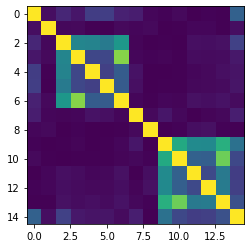

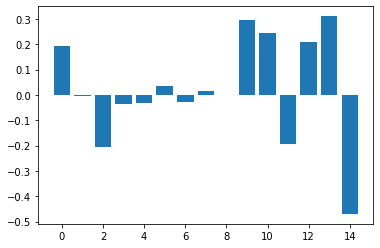

(15,)


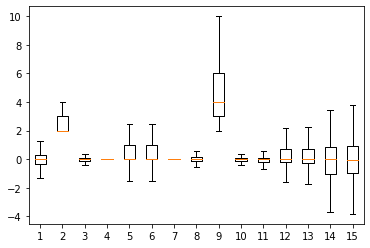

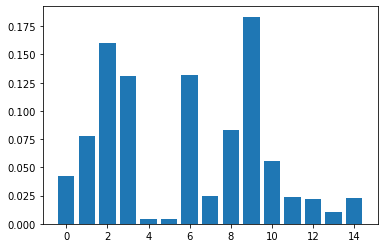

mean:0.003 | std:0.585 | ptp:7.5
mean:2.764 | std:1.534 | ptp:19.0
mean:-0.004 | std:0.497 | ptp:14.0
mean:-0.000 | std:0.332 | ptp:9.3
mean:0.239 | std:0.602 | ptp:12.5
mean:0.234 | std:0.592 | ptp:12.0
mean:-0.000 | std:0.411 | ptp:6.8
mean:0.008 | std:0.231 | ptp:2.7
mean:5.130 | std:4.348 | ptp:80.0
mean:-0.003 | std:0.369 | ptp:9.1
mean:-0.021 | std:0.304 | ptp:5.5
mean:0.204 | std:0.816 | ptp:22.0
mean:0.207 | std:0.826 | ptp:24.5
mean:-0.075 | std:1.280 | ptp:15.5
mean:-0.035 | std:1.576 | ptp:24.6


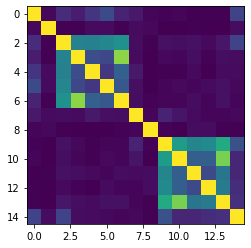

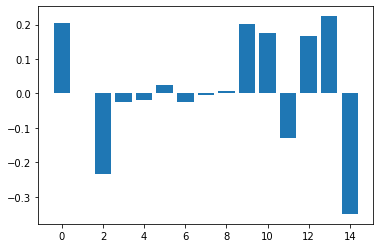

(15,)


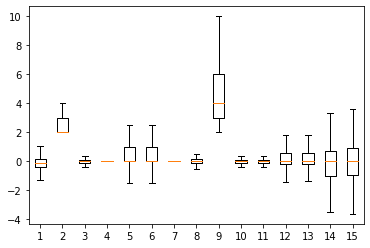

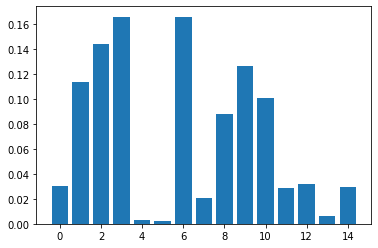

mean:-0.130 | std:0.518 | ptp:6.3
mean:2.960 | std:1.743 | ptp:18.0
mean:-0.002 | std:0.417 | ptp:8.3
mean:0.002 | std:0.284 | ptp:4.8
mean:0.211 | std:0.566 | ptp:11.0
mean:0.231 | std:0.574 | ptp:12.5
mean:0.001 | std:0.446 | ptp:6.5
mean:-0.008 | std:0.219 | ptp:2.4
mean:5.110 | std:4.139 | ptp:67.0
mean:-0.001 | std:0.303 | ptp:5.2
mean:-0.004 | std:0.261 | ptp:3.6
mean:0.173 | std:0.800 | ptp:40.0
mean:0.173 | std:0.776 | ptp:29.0
mean:-0.029 | std:1.111 | ptp:11.4
mean:-0.062 | std:1.574 | ptp:18.6


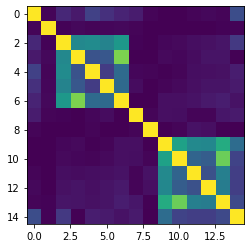

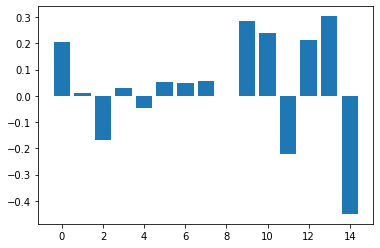

(15,)


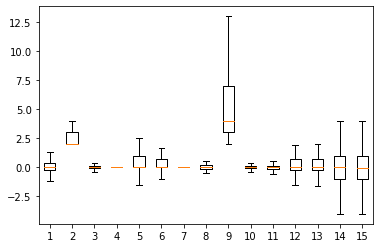

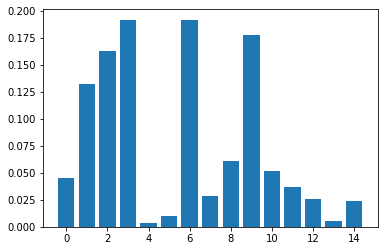

mean:0.068 | std:0.595 | ptp:7.2
mean:3.063 | std:1.671 | ptp:20.0
mean:-0.005 | std:0.461 | ptp:11.4
mean:-0.010 | std:0.319 | ptp:8.1
mean:0.236 | std:0.583 | ptp:12.0
mean:0.191 | std:0.566 | ptp:11.0
mean:-0.010 | std:0.506 | ptp:6.8
mean:0.007 | std:0.242 | ptp:8.7
mean:5.669 | std:4.653 | ptp:56.0
mean:-0.004 | std:0.364 | ptp:6.2
mean:-0.009 | std:0.300 | ptp:10.1
mean:0.207 | std:0.846 | ptp:26.0
mean:0.178 | std:0.856 | ptp:32.0
mean:-0.035 | std:1.301 | ptp:13.0
mean:-0.012 | std:1.638 | ptp:20.4


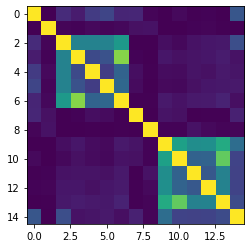

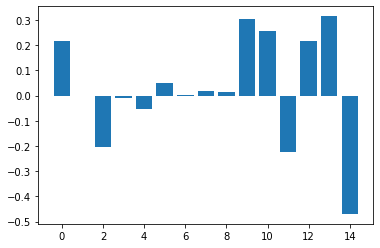

(15,)


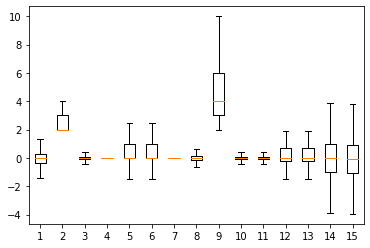

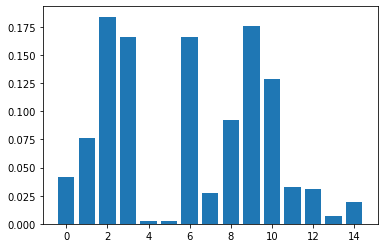

mean:-0.053 | std:0.624 | ptp:8.2
mean:2.824 | std:1.566 | ptp:20.0
mean:0.001 | std:0.539 | ptp:10.8
mean:-0.005 | std:0.381 | ptp:8.9
mean:0.256 | std:0.581 | ptp:8.5
mean:0.259 | std:0.590 | ptp:10.5
mean:-0.003 | std:0.464 | ptp:7.3
mean:-0.003 | std:0.254 | ptp:3.0
mean:5.232 | std:4.459 | ptp:73.0
mean:0.000 | std:0.353 | ptp:5.8
mean:-0.001 | std:0.289 | ptp:4.0
mean:0.175 | std:0.796 | ptp:21.2
mean:0.180 | std:0.801 | ptp:20.5
mean:-0.003 | std:1.268 | ptp:13.2
mean:-0.090 | std:1.552 | ptp:22.2


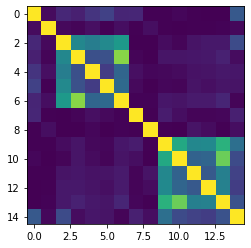

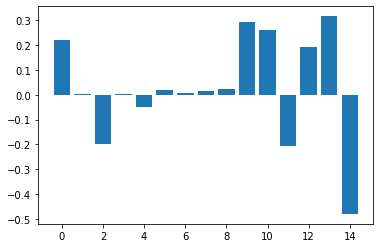

(15,)


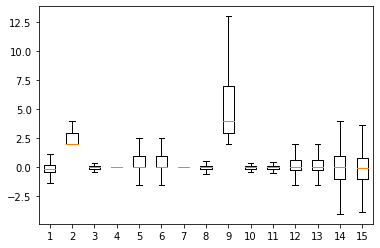

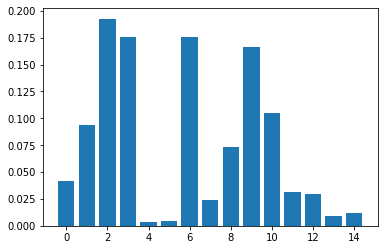

mean:-0.121 | std:0.568 | ptp:6.9
mean:2.933 | std:1.733 | ptp:20.0
mean:0.002 | std:0.499 | ptp:10.8
mean:-0.004 | std:0.343 | ptp:8.3
mean:0.237 | std:0.589 | ptp:14.5
mean:0.247 | std:0.605 | ptp:11.5
mean:-0.002 | std:0.475 | ptp:6.6
mean:-0.003 | std:0.228 | ptp:2.4
mean:5.826 | std:5.223 | ptp:70.0
mean:0.002 | std:0.343 | ptp:6.7
mean:-0.002 | std:0.276 | ptp:3.9
mean:0.193 | std:0.880 | ptp:31.0
mean:0.184 | std:0.881 | ptp:29.0
mean:-0.016 | std:1.386 | ptp:13.8
mean:-0.113 | std:1.452 | ptp:20.5


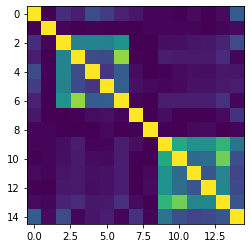

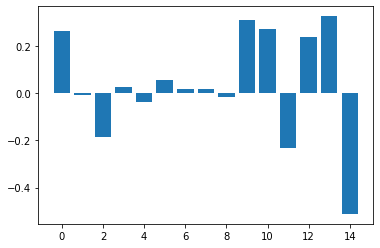

(15,)


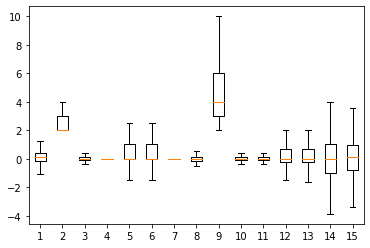

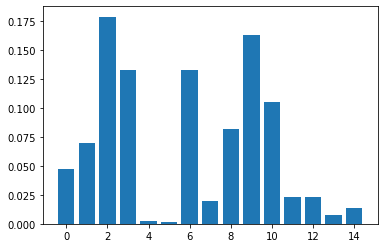

mean:0.120 | std:0.546 | ptp:5.8
mean:2.772 | std:1.426 | ptp:18.0
mean:-0.002 | std:0.506 | ptp:10.1
mean:-0.010 | std:0.321 | ptp:7.1
mean:0.279 | std:0.591 | ptp:12.5
mean:0.260 | std:0.583 | ptp:7.5
mean:-0.004 | std:0.409 | ptp:6.5
mean:-0.001 | std:0.216 | ptp:3.2
mean:5.170 | std:3.871 | ptp:35.0
mean:-0.001 | std:0.337 | ptp:5.4
mean:-0.001 | std:0.266 | ptp:5.1
mean:0.187 | std:0.799 | ptp:23.0
mean:0.179 | std:0.788 | ptp:18.0
mean:-0.004 | std:1.324 | ptp:17.0
mean:0.108 | std:1.364 | ptp:17.7


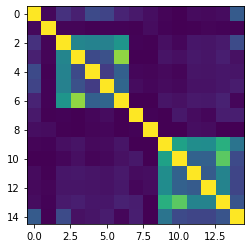

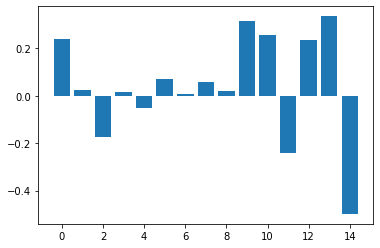

(15,)


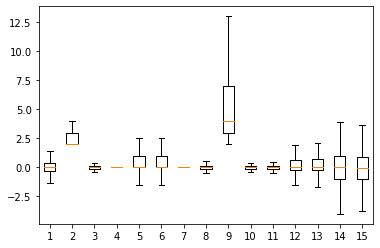

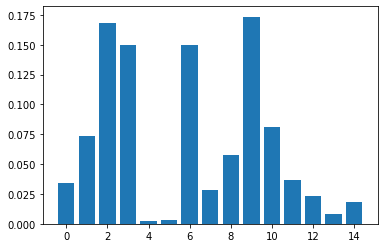

mean:0.072 | std:0.603 | ptp:7.9
mean:2.844 | std:1.711 | ptp:34.0
mean:0.001 | std:0.522 | ptp:10.6
mean:-0.005 | std:0.351 | ptp:7.8
mean:0.286 | std:0.602 | ptp:15.0
mean:0.273 | std:0.610 | ptp:14.8
mean:-0.008 | std:0.447 | ptp:8.7
mean:0.024 | std:0.232 | ptp:6.3
mean:5.548 | std:4.483 | ptp:55.0
mean:-0.001 | std:0.347 | ptp:5.7
mean:-0.006 | std:0.294 | ptp:15.8
mean:0.190 | std:0.830 | ptp:25.3
mean:0.190 | std:0.834 | ptp:31.0
mean:-0.018 | std:1.354 | ptp:23.0
mean:-0.039 | std:1.477 | ptp:19.3


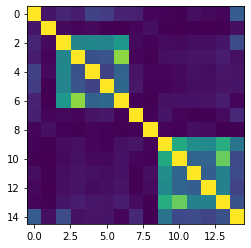

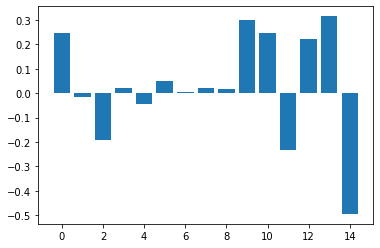

(15,)


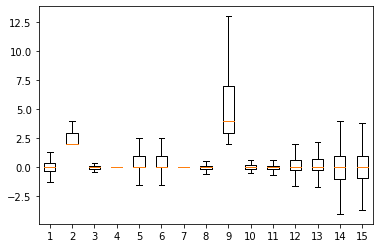

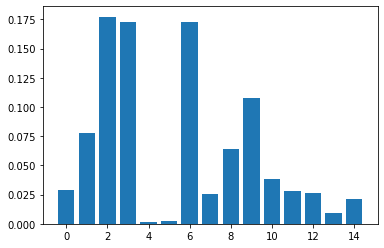

mean:0.046 | std:0.562 | ptp:6.2
mean:2.812 | std:1.302 | ptp:18.0
mean:0.004 | std:0.528 | ptp:9.2
mean:-0.006 | std:0.358 | ptp:7.3
mean:0.259 | std:0.581 | ptp:9.0
mean:0.259 | std:0.594 | ptp:8.5
mean:-0.006 | std:0.469 | ptp:7.5
mean:0.002 | std:0.236 | ptp:2.9
mean:5.694 | std:4.738 | ptp:63.0
mean:0.001 | std:0.363 | ptp:5.1
mean:-0.003 | std:0.291 | ptp:3.6
mean:0.180 | std:0.838 | ptp:24.0
mean:0.189 | std:0.866 | ptp:37.0
mean:-0.016 | std:1.398 | ptp:14.8
mean:0.088 | std:1.512 | ptp:18.2


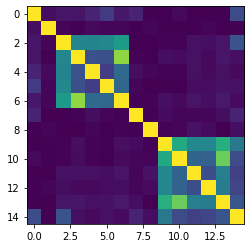

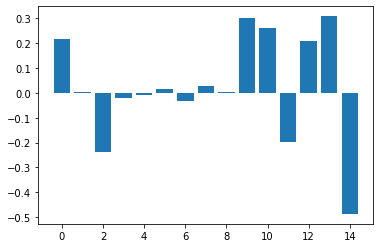

(15,)


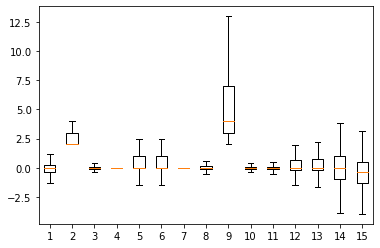

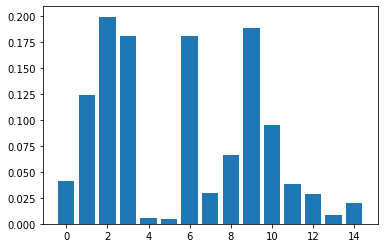

mean:-0.093 | std:0.594 | ptp:10.5
mean:2.975 | std:1.602 | ptp:18.0
mean:0.000 | std:0.544 | ptp:11.5
mean:0.002 | std:0.377 | ptp:6.8
mean:0.257 | std:0.619 | ptp:14.5
mean:0.259 | std:0.614 | ptp:13.0
mean:0.004 | std:0.484 | ptp:7.6
mean:-0.000 | std:0.242 | ptp:3.1
mean:5.727 | std:5.125 | ptp:65.0
mean:0.000 | std:0.373 | ptp:6.9
mean:-0.007 | std:0.297 | ptp:5.6
mean:0.194 | std:0.849 | ptp:26.8
mean:0.197 | std:0.878 | ptp:30.0
mean:-0.029 | std:1.347 | ptp:16.7
mean:-0.413 | std:1.449 | ptp:16.3


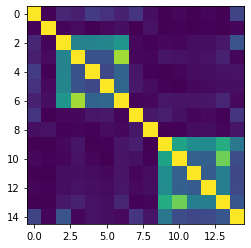

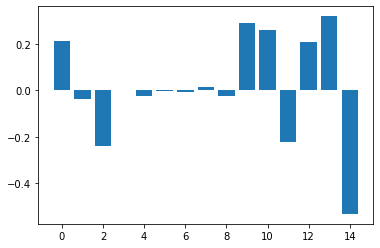

(15,)


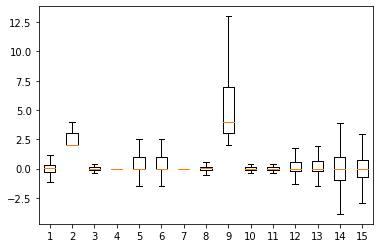

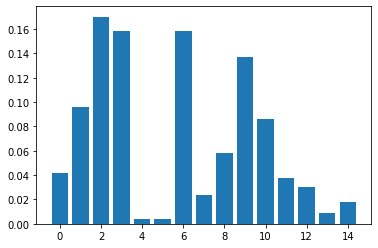

mean:0.042 | std:0.530 | ptp:5.7
mean:2.888 | std:1.515 | ptp:18.0
mean:-0.003 | std:0.459 | ptp:7.6
mean:-0.002 | std:0.294 | ptp:5.6
mean:0.272 | std:0.607 | ptp:15.0
mean:0.236 | std:0.592 | ptp:16.5
mean:-0.007 | std:0.446 | ptp:8.0
mean:0.013 | std:0.214 | ptp:2.3
mean:5.601 | std:4.592 | ptp:52.0
mean:0.001 | std:0.303 | ptp:4.3
mean:-0.001 | std:0.249 | ptp:3.5
mean:0.171 | std:0.810 | ptp:32.5
mean:0.171 | std:0.821 | ptp:32.5
mean:0.000 | std:1.296 | ptp:13.2
mean:-0.011 | std:1.189 | ptp:15.7


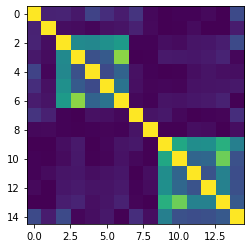

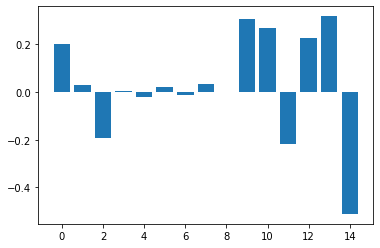

(15,)


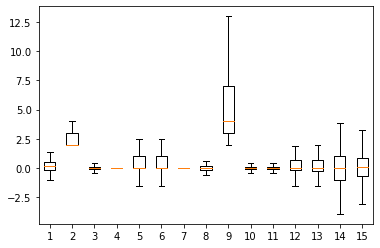

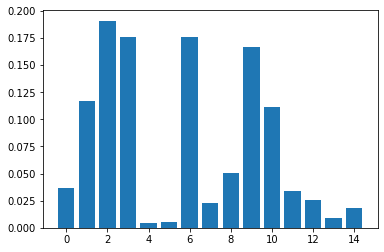

mean:0.188 | std:0.532 | ptp:7.6
mean:2.981 | std:1.736 | ptp:23.0
mean:-0.002 | std:0.477 | ptp:7.1
mean:-0.004 | std:0.315 | ptp:6.0
mean:0.273 | std:0.637 | ptp:13.0
mean:0.246 | std:0.623 | ptp:14.5
mean:-0.015 | std:0.490 | ptp:7.6
mean:0.004 | std:0.234 | ptp:2.4
mean:5.423 | std:4.307 | ptp:49.0
mean:0.000 | std:0.340 | ptp:5.6
mean:0.004 | std:0.276 | ptp:4.4
mean:0.185 | std:0.811 | ptp:23.8
mean:0.178 | std:0.813 | ptp:21.5
mean:-0.003 | std:1.339 | ptp:15.0
mean:0.108 | std:1.247 | ptp:15.6


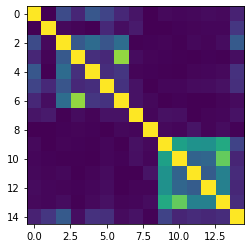

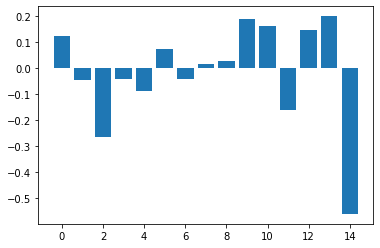

(15,)


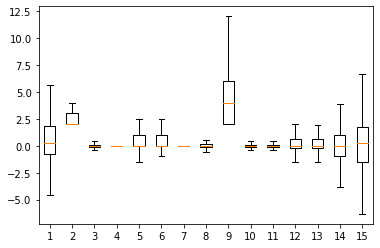

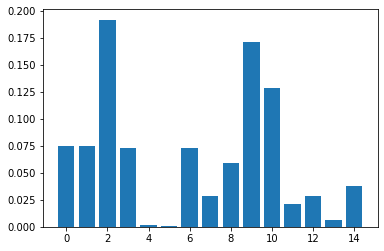

mean:0.848 | std:3.069 | ptp:46.4
mean:2.592 | std:1.172 | ptp:10.0
mean:0.002 | std:0.925 | ptp:21.5
mean:0.004 | std:0.435 | ptp:13.4
mean:0.268 | std:0.532 | ptp:6.0
mean:0.244 | std:0.510 | ptp:4.0
mean:0.000 | std:0.274 | ptp:3.5
mean:-0.021 | std:0.246 | ptp:2.9
mean:5.154 | std:4.320 | ptp:53.0
mean:0.002 | std:0.347 | ptp:6.0
mean:0.005 | std:0.286 | ptp:3.7
mean:0.166 | std:0.758 | ptp:17.0
mean:0.174 | std:0.773 | ptp:18.0
mean:0.010 | std:1.247 | ptp:13.0
mean:0.144 | std:2.954 | ptp:38.3


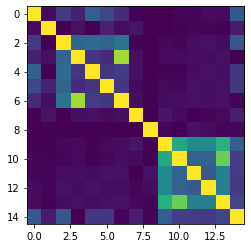

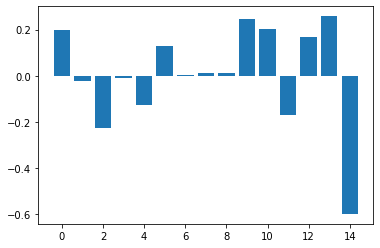

(15,)


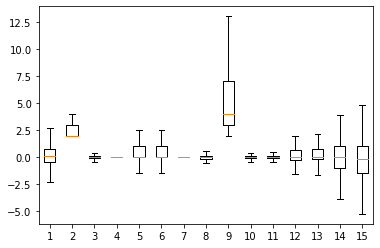

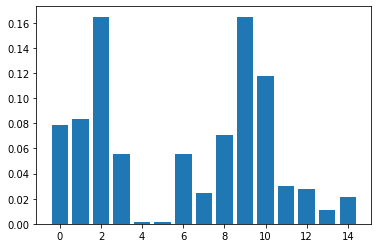

mean:0.316 | std:1.464 | ptp:17.6
mean:2.656 | std:1.294 | ptp:11.0
mean:0.003 | std:0.700 | ptp:14.4
mean:0.004 | std:0.310 | ptp:9.4
mean:0.302 | std:0.558 | ptp:6.0
mean:0.297 | std:0.544 | ptp:5.5
mean:0.002 | std:0.254 | ptp:4.2
mean:-0.001 | std:0.228 | ptp:2.2
mean:5.759 | std:5.262 | ptp:97.0
mean:0.004 | std:0.344 | ptp:6.7
mean:0.001 | std:0.279 | ptp:3.7
mean:0.182 | std:0.848 | ptp:19.5
mean:0.195 | std:0.870 | ptp:22.3
mean:0.006 | std:1.372 | ptp:13.8
mean:-0.216 | std:2.045 | ptp:32.2


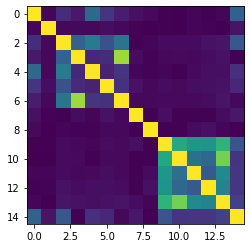

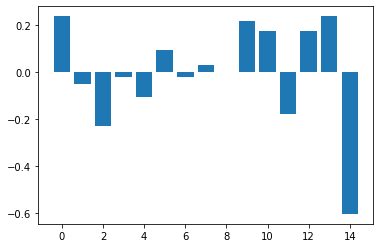

(15,)


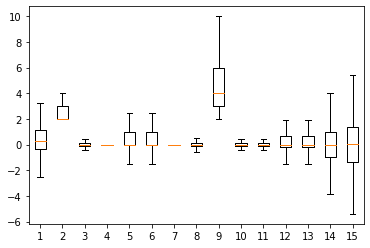

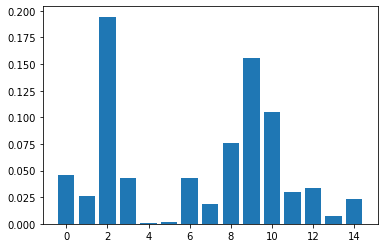

mean:0.490 | std:1.330 | ptp:16.6
mean:2.392 | std:1.037 | ptp:26.0
mean:-0.003 | std:0.745 | ptp:14.2
mean:-0.007 | std:0.301 | ptp:8.8
mean:0.304 | std:0.551 | ptp:6.2
mean:0.276 | std:0.568 | ptp:16.5
mean:-0.002 | std:0.219 | ptp:5.1
mean:-0.012 | std:0.218 | ptp:3.2
mean:5.110 | std:3.802 | ptp:44.0
mean:0.001 | std:0.332 | ptp:5.4
mean:0.002 | std:0.266 | ptp:5.0
mean:0.183 | std:0.770 | ptp:23.0
mean:0.194 | std:0.788 | ptp:17.7
mean:0.012 | std:1.299 | ptp:17.0
mean:0.062 | std:2.215 | ptp:28.4


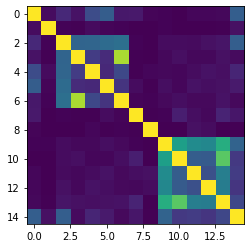

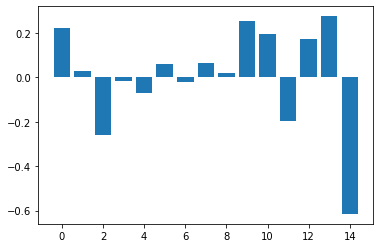

(15,)


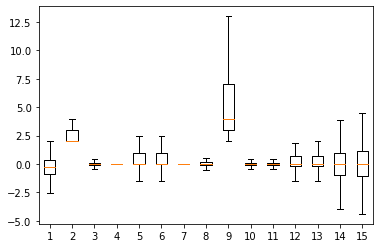

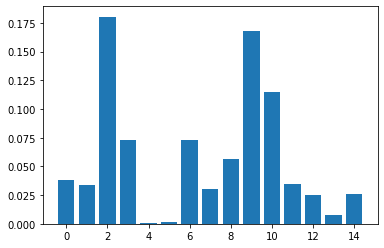

mean:-0.274 | std:1.020 | ptp:11.1
mean:2.546 | std:0.920 | ptp:12.0
mean:0.001 | std:0.721 | ptp:14.7
mean:0.021 | std:0.380 | ptp:13.8
mean:0.314 | std:0.569 | ptp:8.5
mean:0.314 | std:0.562 | ptp:6.0
mean:0.015 | std:0.278 | ptp:4.2
mean:0.020 | std:0.233 | ptp:5.7
mean:5.504 | std:4.392 | ptp:55.0
mean:0.000 | std:0.342 | ptp:5.7
mean:-0.003 | std:0.300 | ptp:15.8
mean:0.193 | std:0.821 | ptp:25.3
mean:0.191 | std:0.846 | ptp:31.0
mean:-0.011 | std:1.334 | ptp:23.0
mean:0.053 | std:1.903 | ptp:29.7


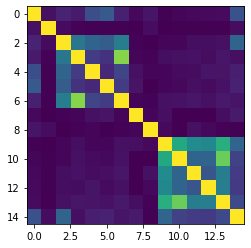

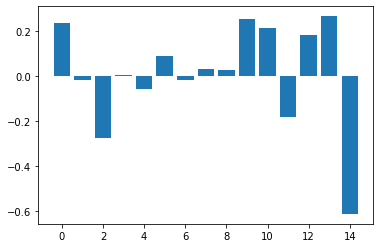

(15,)


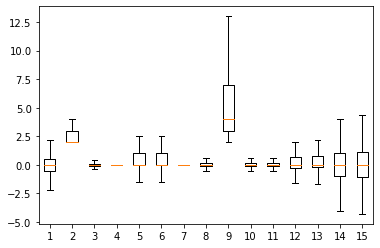

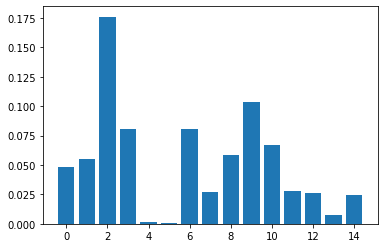

mean:-0.029 | std:1.041 | ptp:16.6
mean:2.633 | std:1.023 | ptp:14.0
mean:0.004 | std:0.728 | ptp:28.7
mean:0.008 | std:0.357 | ptp:20.3
mean:0.323 | std:0.571 | ptp:6.5
mean:0.354 | std:0.575 | ptp:6.0
mean:0.012 | std:0.296 | ptp:4.2
mean:-0.000 | std:0.240 | ptp:2.9
mean:5.544 | std:4.611 | ptp:66.0
mean:0.004 | std:0.360 | ptp:5.1
mean:0.000 | std:0.291 | ptp:3.4
mean:0.175 | std:0.844 | ptp:23.0
mean:0.196 | std:0.879 | ptp:35.5
mean:-0.005 | std:1.380 | ptp:14.8
mean:0.058 | std:1.839 | ptp:42.0


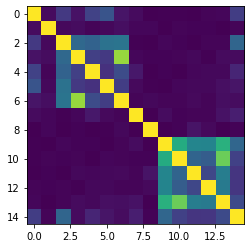

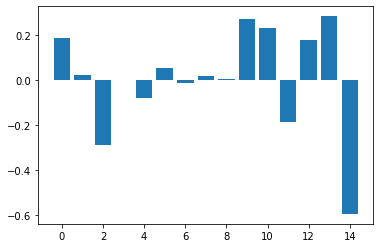

(15,)


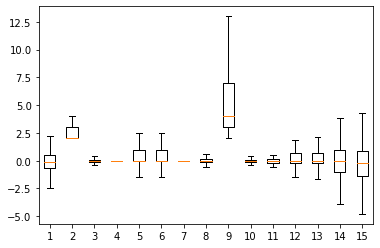

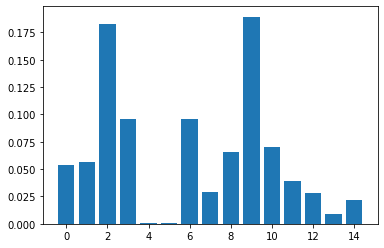

mean:-0.033 | std:1.227 | ptp:18.7
mean:2.688 | std:1.056 | ptp:8.0
mean:0.000 | std:0.750 | ptp:15.9
mean:0.012 | std:0.412 | ptp:11.9
mean:0.305 | std:0.566 | ptp:6.5
mean:0.346 | std:0.570 | ptp:5.3
mean:0.016 | std:0.324 | ptp:4.9
mean:0.005 | std:0.242 | ptp:3.1
mean:5.678 | std:5.055 | ptp:65.0
mean:0.001 | std:0.374 | ptp:6.9
mean:-0.008 | std:0.300 | ptp:5.6
mean:0.204 | std:0.870 | ptp:29.0
mean:0.189 | std:0.890 | ptp:27.5
mean:-0.028 | std:1.355 | ptp:16.7
mean:-0.276 | std:1.882 | ptp:31.7


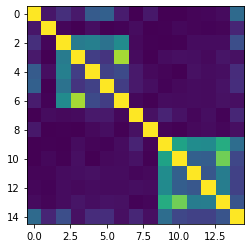

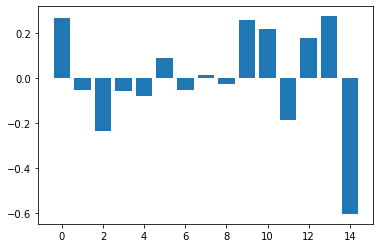

(15,)


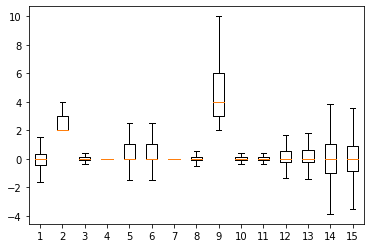

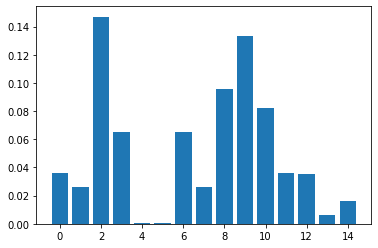

mean:-0.055 | std:0.700 | ptp:8.1
mean:2.460 | std:0.868 | ptp:10.0
mean:-0.003 | std:0.503 | ptp:12.5
mean:0.007 | std:0.268 | ptp:10.8
mean:0.295 | std:0.555 | ptp:6.2
mean:0.290 | std:0.552 | ptp:7.0
mean:0.010 | std:0.272 | ptp:5.5
mean:0.011 | std:0.214 | ptp:2.3
mean:5.425 | std:4.405 | ptp:52.0
mean:-0.001 | std:0.300 | ptp:4.3
mean:-0.006 | std:0.245 | ptp:3.5
mean:0.174 | std:0.808 | ptp:32.5
mean:0.164 | std:0.821 | ptp:32.5
mean:-0.029 | std:1.251 | ptp:13.4
mean:-0.007 | std:1.400 | ptp:23.6


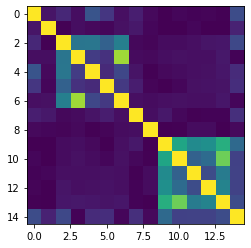

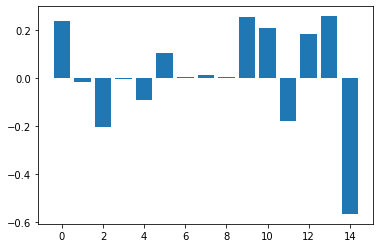

(15,)


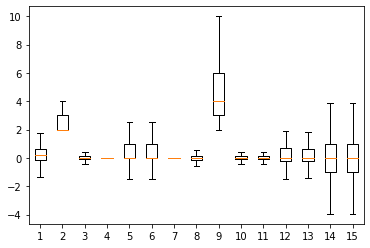

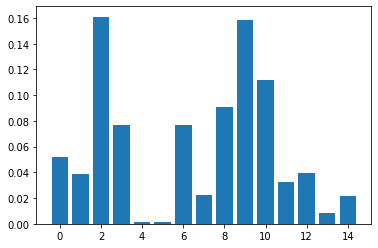

mean:0.272 | std:0.788 | ptp:11.0
mean:2.521 | std:1.018 | ptp:10.0
mean:-0.002 | std:0.550 | ptp:11.9
mean:0.008 | std:0.299 | ptp:6.1
mean:0.313 | std:0.573 | ptp:7.5
mean:0.291 | std:0.564 | ptp:6.5
mean:0.013 | std:0.288 | ptp:4.2
mean:-0.001 | std:0.234 | ptp:2.4
mean:5.334 | std:4.217 | ptp:42.0
mean:-0.004 | std:0.334 | ptp:5.6
mean:0.002 | std:0.268 | ptp:3.7
mean:0.191 | std:0.817 | ptp:23.8
mean:0.167 | std:0.787 | ptp:17.0
mean:-0.017 | std:1.309 | ptp:15.0
mean:-0.006 | std:1.620 | ptp:20.6


In [59]:
for file in test_f:
    describe(file)

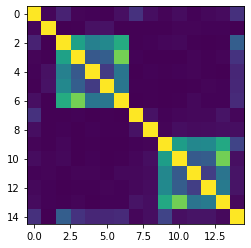

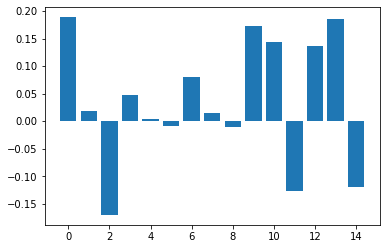

(15,)


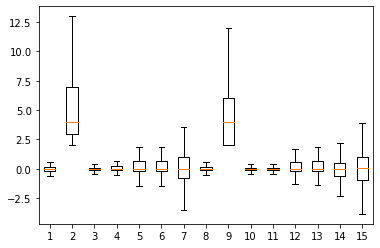

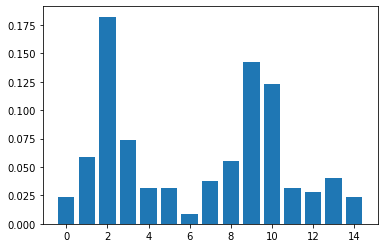

mean:-0.016 | std:0.257 | ptp:3.7
mean:5.497 | std:5.256 | ptp:130.0
mean:0.005 | std:0.383 | ptp:9.0
mean:0.016 | std:0.328 | ptp:5.6
mean:0.182 | std:0.841 | ptp:43.2
mean:0.213 | std:0.797 | ptp:17.5
mean:0.059 | std:1.200 | ptp:15.6
mean:0.023 | std:0.246 | ptp:4.7
mean:4.951 | std:4.270 | ptp:54.0
mean:0.004 | std:0.330 | ptp:6.6
mean:-0.005 | std:0.282 | ptp:5.0
mean:0.184 | std:0.748 | ptp:22.5
mean:0.184 | std:0.724 | ptp:21.8
mean:-0.007 | std:1.034 | ptp:10.8
mean:0.018 | std:1.595 | ptp:22.2


In [60]:
describe(test_f[10])